Step 1 - Initialize libraries and import data

In [3]:
# importando as bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats as st

In [4]:
# carregando a base de dados
df_games = pd.read_csv("/datasets/games.csv")

In [5]:
# visualizando os dados
df_games.info()
print()
df_games.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2885,Madden NFL 09,PSP,2008.0,Sports,0.65,0.00,0.00,0.06,68.0,6.5,E
6378,I Spy: Spooky Mansion,Wii,2010.0,Puzzle,0.25,0.00,0.00,0.02,NaN,tbd,E
7249,Ben 10 Alien Force: Vilgax Attacks,X360,2009.0,Action,0.11,0.09,0.00,0.02,61.0,8.3,E10+
10036,Army Men: Sarge's War,XB,2004.0,Shooter,0.09,0.02,0.00,0.00,44.0,tbd,T
6745,"What Did I Do to Deserve This, My Lord!? 2",PSP,2008.0,Role-Playing,0.06,0.00,0.18,0.01,NaN,NaN,NaN
2662,Ghost Squad,Wii,2007.0,Shooter,0.42,0.21,0.08,0.07,69.0,7.5,T
4579,2010 FIFA World Cup South Africa,Wii,2010.0,Sports,0.23,0.15,0.01,0.04,70.0,6.7,E
9670,Go Play: Circus Star,Wii,2009.0,Action,0.12,0.00,0.00,0.01,NaN,tbd,E10+
10578,The Whispered World,PC,2009.0,Adventure,0.00,0.08,0.00,0.02,70.0,7.6,E
5579,Silent Hill: Downpour,X360,2012.0,Action,0.22,0.08,0.00,0.02,68.0,7.3,M


In [6]:
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Step 2. Prepare the Data

- Replace column names (convert everything to lowercase).
- Convert data to the necessary types.
- Describe the columns where data types were changed and explain why.
- If necessary, decide how to handle missing values:
  - Explain why you filled in the missing values as you did or why you chose to leave them blank.
  - Why do you think the values are missing? Provide possible reasons.
  - Pay attention to the abbreviation TBD (to be determined). Specify how you plan to handle these cases.
- Calculate the total sales (the sum of sales across all regions) for each game and add these values in a separate column.

In [7]:
# corrigindo nomes das colunas pra minúsculo
df_games.columns = df_games.columns.str.lower()

In [8]:
# removendo ausentes e corrigindo tipos de dados - year of release
# Alterado o tipo pois era float e deveria ser int, pois ano é sempre inteiro
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors='coerce')
df_games["year_of_release"] = df_games["year_of_release"].fillna(0)
df_games["year_of_release"] = df_games["year_of_release"].astype("int")

# removendo ausentes e corrigindo tipos de dados - user score
# Alterado o tipo pois era object e deveria ser float, pois aí podemos compará-lo com outros números ou informações
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
#df_games["user_score"] = df_games["user_score"].fillna(0)
df_games["user_score"].astype("float")

df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
df_games["user_score"] = df_games["user_score"] * 10
df_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3904,Wrecking Crew,NES,1985,Platform,0.00,0.00,0.51,0.00,NaN,NaN,NaN
8450,Itoi Shigesato no Bass Tsuri No. 1,SNES,1997,Sports,0.00,0.00,0.17,0.00,NaN,NaN,NaN
6495,Inazuma Eleven Strikers,Wii,2011,Role-Playing,0.00,0.01,0.25,0.00,59.0,79.0,NaN
12996,Sled Shred featuring the Jamaican Bobsled Team,Wii,2010,Sports,0.05,0.00,0.00,0.00,NaN,NaN,E
11017,Driver: Renegade,3DS,2011,Racing,0.05,0.04,0.00,0.01,48.0,50.0,M
16562,Outdoors Unleashed: Alaska 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,NaN,NaN,T
4901,Metal Gear Solid HD Edition,PSV,2012,Action,0.12,0.16,0.05,0.06,NaN,NaN,NaN
15698,The King of Fighters Collection: The Orochi Sa...,PS2,2006,Fighting,0.00,0.00,0.02,0.00,NaN,NaN,NaN
14700,Kenka Bancho Otome,PSV,2016,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
6205,Mister Mosquito,PS2,2001,Shooter,0.05,0.04,0.17,0.01,65.0,49.0,T


In [11]:
# criando a coluna total_sales e eliminando valores ausentes

df_games["total_sales"] = df_games["na_sales"] + df_games["eu_sales"] + df_games["jp_sales"] + df_games["other_sales"]
df_games["total_sales"] = df_games["total_sales"].fillna(0)
df_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1219,Uncharted: Golden Abyss,PSV,2011,Shooter,0.53,0.66,0.13,0.22,80.0,74.0,T,1.54
7543,The Con,PSP,2005,Fighting,0.18,0.00,0.00,0.02,63.0,73.0,T,0.20
9009,Fatal Frame,PS2,2001,Action,0.07,0.06,0.00,0.02,74.0,89.0,T,0.15
11356,Smart Bomb,PSP,2005,Puzzle,0.07,0.00,0.00,0.01,45.0,54.0,E10+,0.08
8536,Fatal Frame II: Crimson Butterfly,PS2,2003,Action,0.08,0.06,0.00,0.02,81.0,92.0,M,0.16
4981,Mobile Suit Gundam: Giren no Yabou Zeon Dokuri...,PS2,2002,Strategy,0.00,0.00,0.38,0.00,NaN,NaN,NaN,0.38
10001,Cabela's Deer Hunt 2005 Season,XB,2004,Sports,0.09,0.02,0.00,0.00,59.0,75.0,T,0.11
11690,Frogger Beyond,XB,2002,Platform,0.06,0.02,0.00,0.00,NaN,NaN,E,0.08
13779,Metal Max Returns,SNES,1995,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
12848,Space Chimps,DS,2008,Platform,0.05,0.00,0.00,0.00,59.0,NaN,E,0.05


Step 3. Analyze the Data

- Examine how many games were released in different years. Are the data from each period significant?
- Analyze how sales varied across platforms. Choose platforms with the highest total sales and build a distribution based on data for each year. Identify platforms that were once popular but no longer have sales. How long does it take for new platforms to emerge and old ones to disappear?
- Determine the period from which you should gather data. To do this, refer to your answers to the previous questions. The data should allow you to build a model for 2017.
- Work only with the data that you decided is relevant. Disregard data from earlier years.
- Which platforms are leading in sales? Which are growing or declining? Select several potentially profitable platforms.
- Construct a box plot for the global sales of all games, divided by platform. Are the differences in sales significant? What about the average sales across various platforms? Describe your findings.
- Examine how user and professional reviews affect the sales of a popular platform (choose one). Construct a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- With these conclusions in mind, compare sales across other platforms.
- Take a look at the overall distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

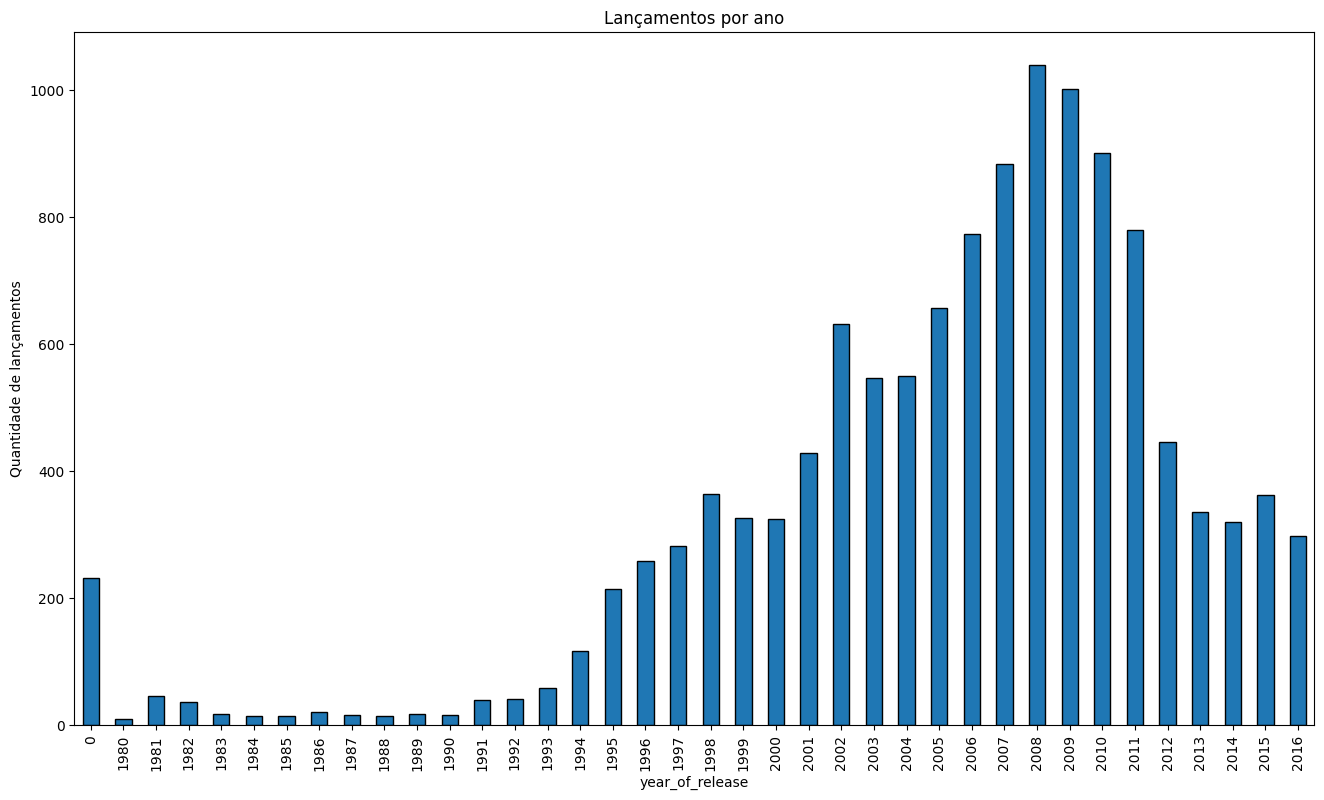

In [12]:
# analisando jogos lançados por ano

df_games.groupby("year_of_release")["name"].nunique().plot(
    kind="bar",
    edgecolor="black",
    title="Lançamentos por ano",
    figsize=[16,9],
    ylabel="Quantidade de lançamentos"
)
plt.show()

Conclusions:

- We observed a sharp increase in the number of games released starting in the 1990s, rising from fewer than 200 releases per year to more than 1,000 releases per year. The peak occurred in 2009 and 2010, with around 1,000 games released.

- After 2008, there was a decline in the total number of games released annually.

- Post-2010, the number of releases declined to around 350-400 per year between 2013 and 2016.

- Additionally, approximately 200 games were found to have no information on their release year.

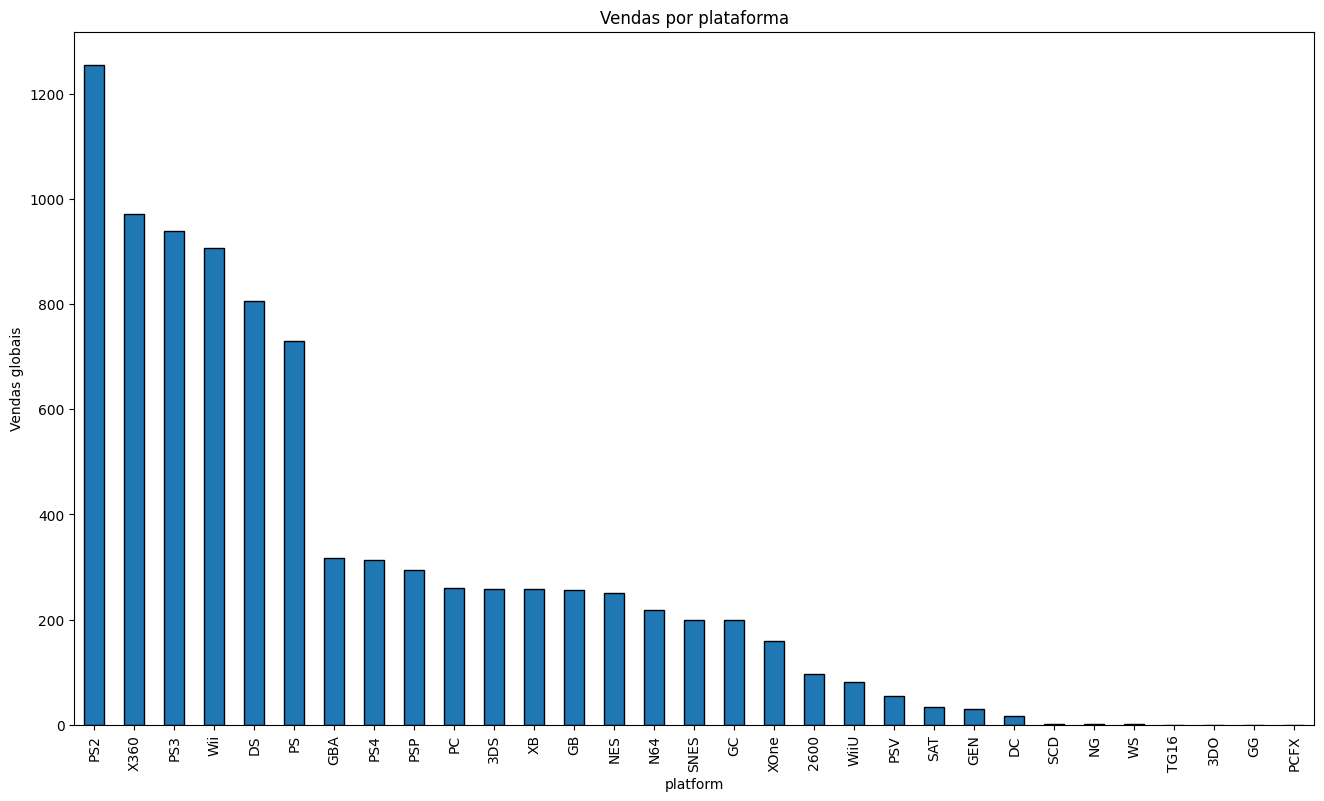

In [13]:
# analisando as vendas das diferentes plataformas
plat_top = df_games.groupby("platform")["total_sales"].sum().sort_values(ascending=False).plot(
    kind="bar",
    edgecolor="black",
    title="Vendas por plataforma",
    figsize=[16,9],
    ylabel="Vendas globais"
)
plt.show()


Conclusions:
- We observed that 6 platforms have significantly higher sales than the others: PS2, X360, PS3, Wii, DS, and PS.
- PS2 is the largest of all, with sales exceeding 1,200 (in millions of USD).

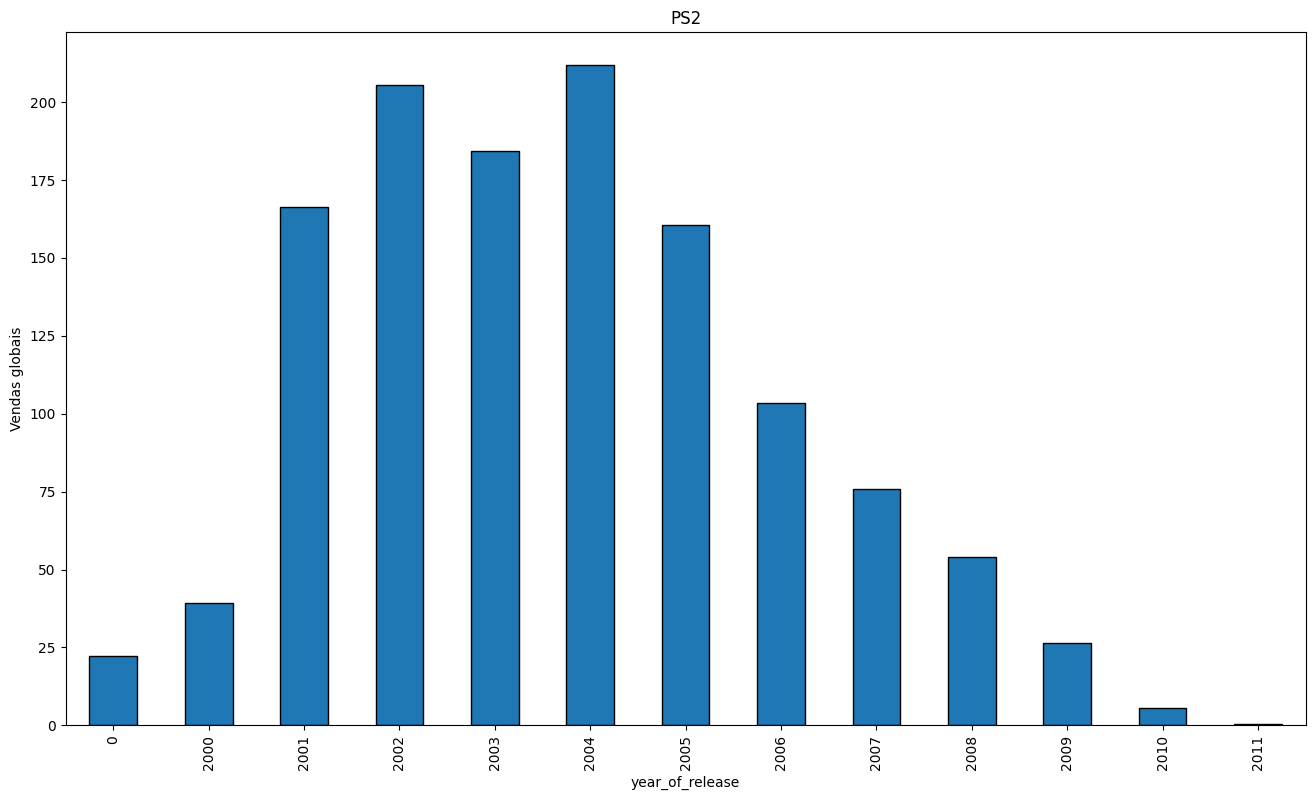

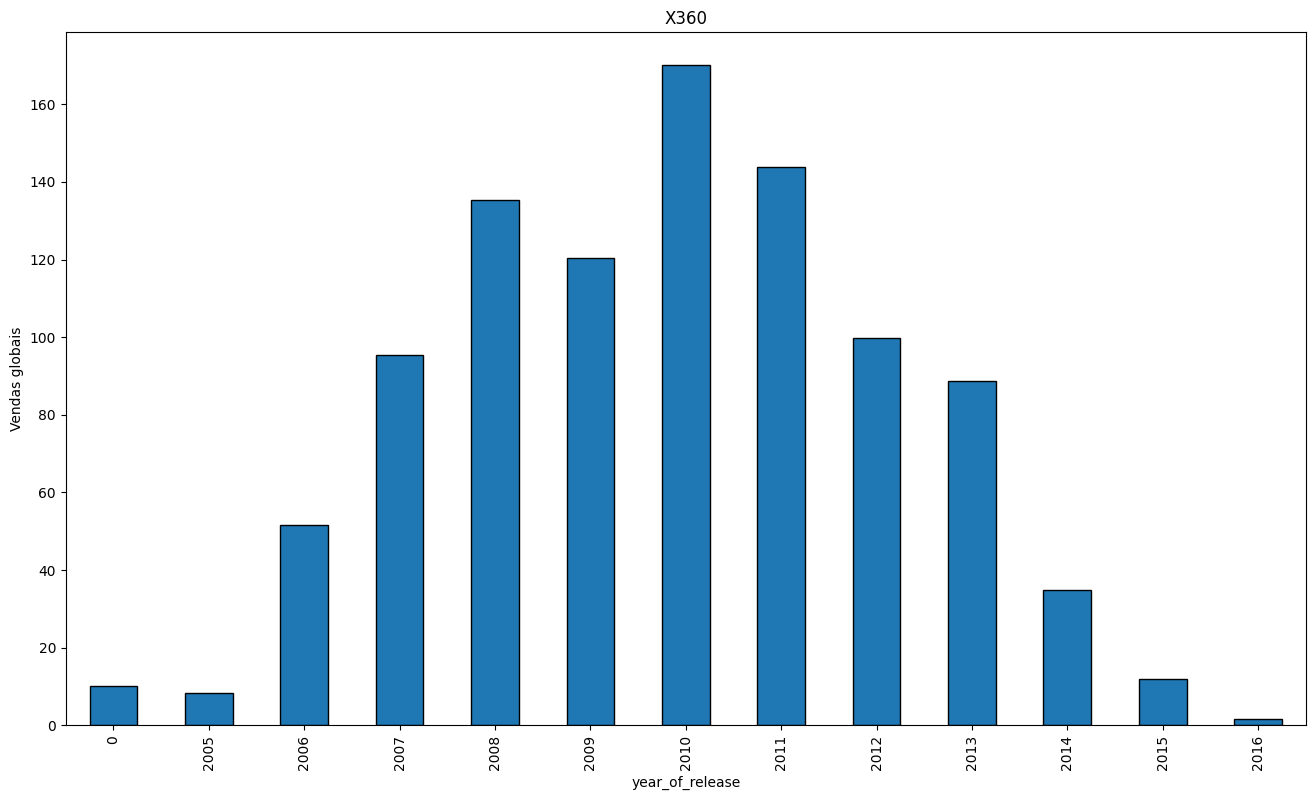

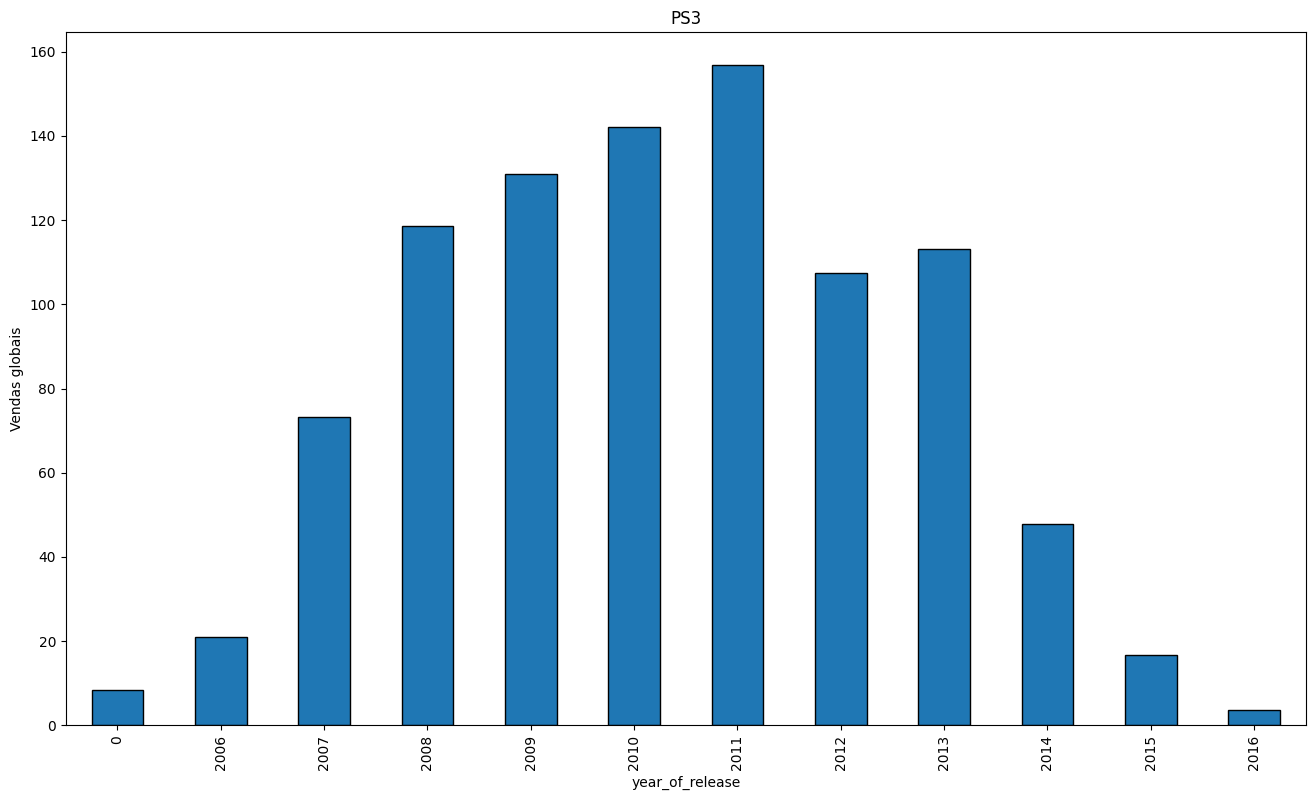

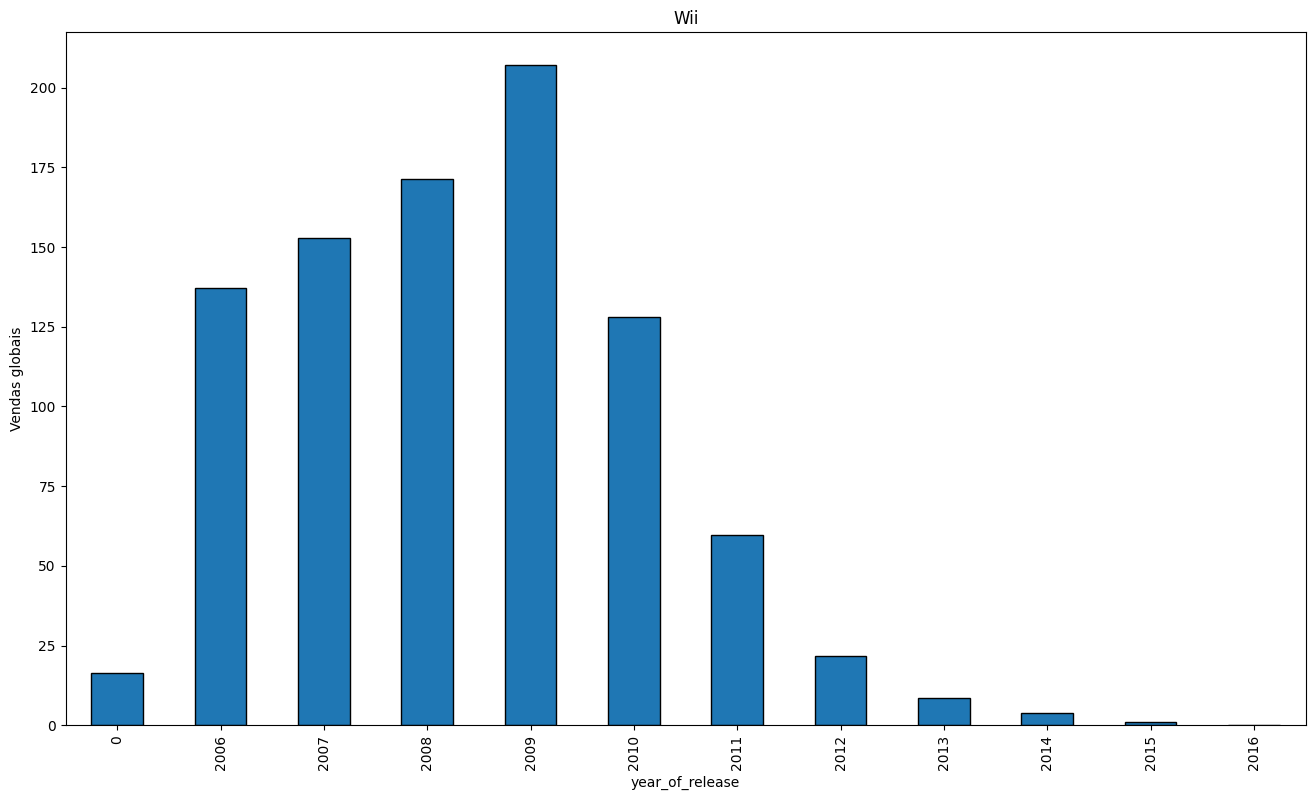

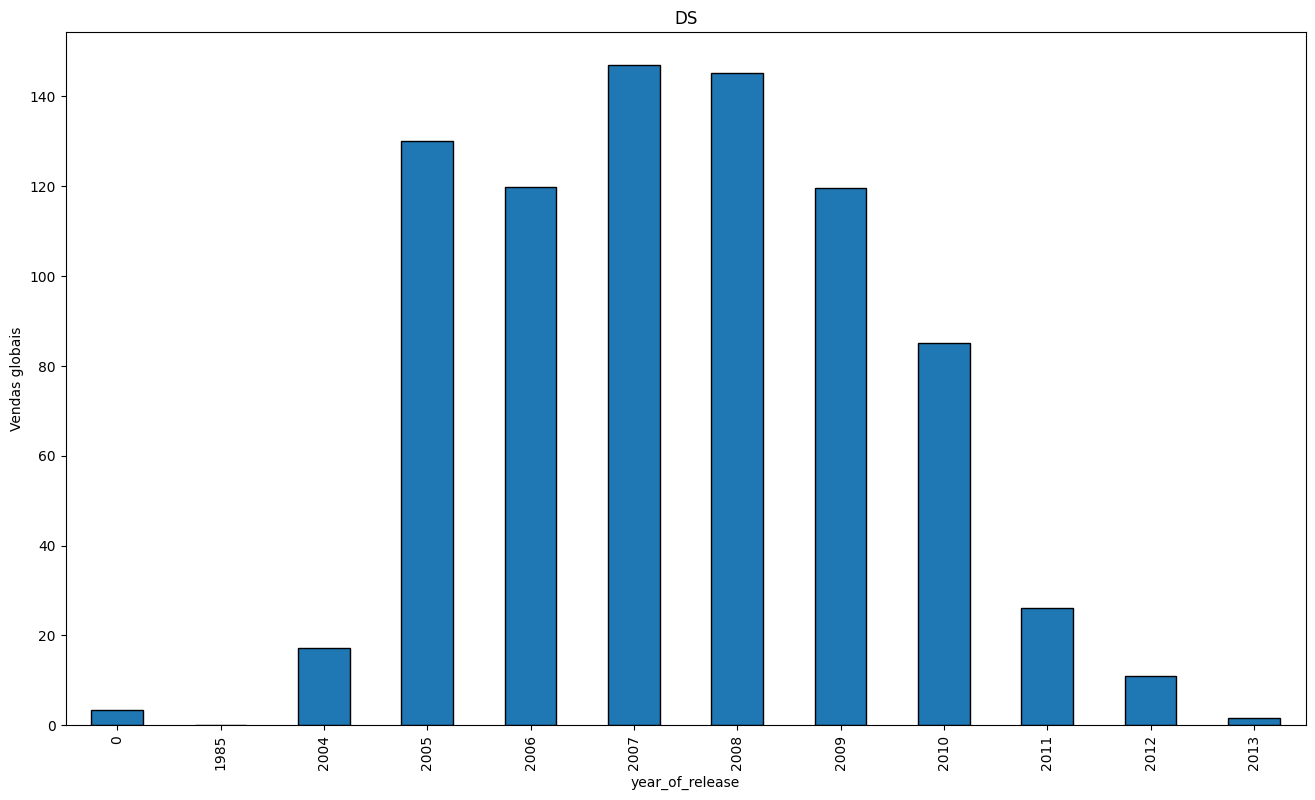

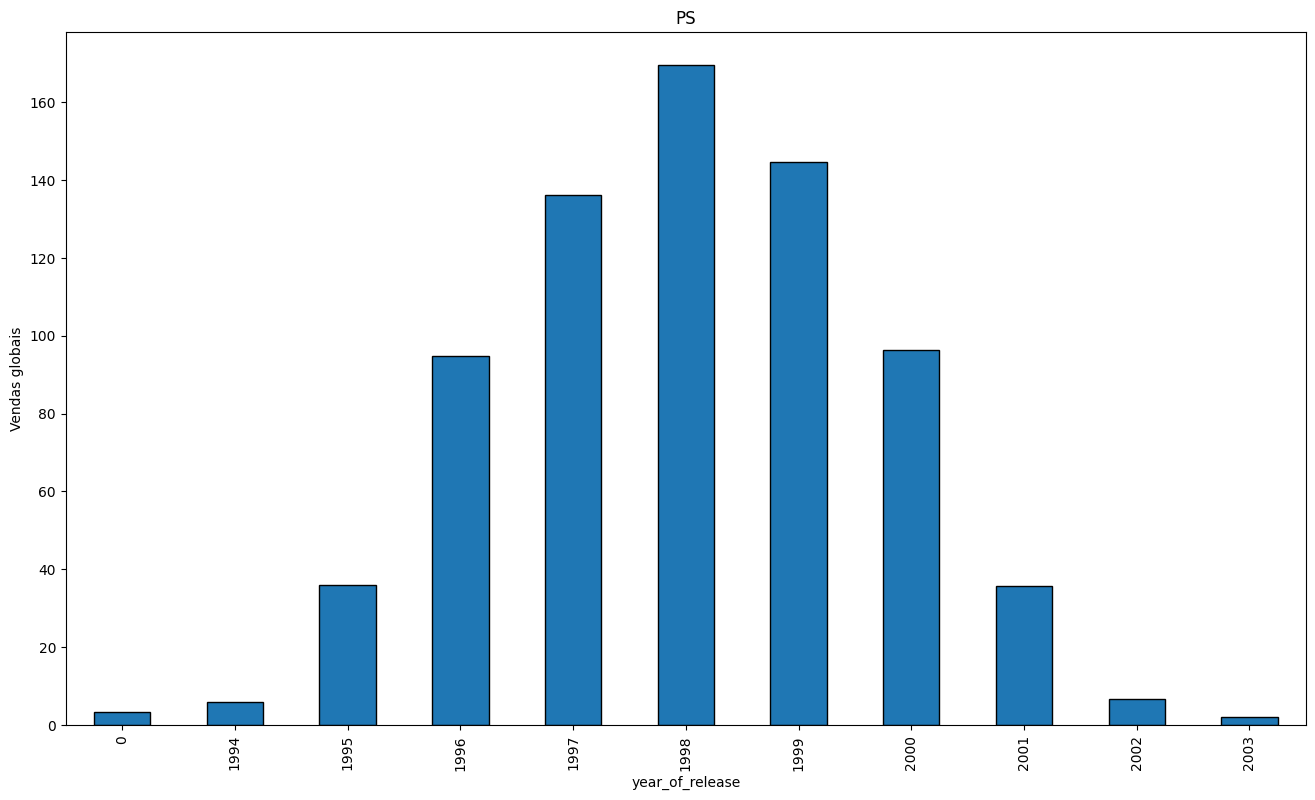

In [14]:
# Analisando vendas ano a ano para as maiores plataformas
top_plats = ["PS2","X360","PS3","Wii","DS","PS"]
plat_top_year = df_games.query("platform in @top_plats")

plat_top_year_grouped = plat_top_year.groupby(["platform","year_of_release"])["total_sales"].sum()
plat_top_year_grouped.head(10)

for plat in top_plats:
    
    plat_top_year_grouped[plat].plot(
        kind="bar",
        edgecolor="black",
        title=plat,
        figsize=[16,9],
        ylabel="Vendas globais"    
    )
    plt.show()


Conclusions:
- Among the 6 platforms with the highest sales, we observed the following trends:
  - PS2: Began to gain popularity in 2001, peaked in 2004, and then declined until it practically disappeared in 2011. It remained relevant with sales above 100 (million USD) for 6 years.
  - X360: Became popular in 2006, peaked in 2010, and then declined until it practically disappeared in 2016. It remained relevant with sales above 80 for 7 years.
  - PS3: Gained popularity in 2007, peaked in 2011, and then declined until it practically disappeared in 2016. It stayed relevant with sales above 100 for 6 years.
  - Wii: Became popular in 2006, peaked in 2009, and then declined until it nearly vanished in 2016. It remained relevant with sales above 100 for 5 years.
  - DS: Gained popularity in 2005, peaked in 2007, and then declined until it disappeared in 2013. It stayed relevant with sales above 100 for 5 years.
  - PS: Became popular in 1996, peaked in 1998, and then declined until it practically disappeared in 2003. It remained relevant with sales above 100 for 5 years.
- We can conclude that for the most significant platforms, they generally have high sales for a period of 5 to 7 years before declining and disappearing from the market.

In [15]:
# Encontre as plataformas que costumavam ser populares, mas agora não têm vendas.
# criando uma função para verificar lançamentos por plataforma após uma data de corte
plat_nosales = []

def check_releases(platform,year):
    
    if (df_games[(df_games["year_of_release"] >= year) & (df_games["platform"] == platform)].count()["name"]) == 0:
        plat_nosales.append(platform)
        return 0
    else:
        return df_games[(df_games["year_of_release"] >= year) & (df_games["platform"] == platform)].count()["name"]

# criando uma lista de plataformas
platforms = df_games["platform"].unique()

# imprimindo a quantidade de lançamentos por plataforma após a data da corte
for platform in platforms:
    print(platform, check_releases(platform,2010))

print(plat_nosales)

Wii 450
NES 0
GB 0
DS 507
X360 680
PS3 889
PS2 45
SNES 0
GBA 0
PS4 392
3DS 512
N64 0
PS 0
XB 0
PC 479
2600 0
PSP 500
XOne 247
WiiU 147
GC 0
GEN 0
DC 0
PSV 429
SAT 0
SCD 0
WS 0
NG 0
TG16 0
3DO 0
GG 0
PCFX 0
['NES', 'GB', 'SNES', 'GBA', 'N64', 'PS', 'XB', '2600', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']


Conclusion: Most popular platforms with no sales after 2010 are: 'NES', 'GB', 'SNES', 'GBA', 'N64', 'PS', 'XB', '2600', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX

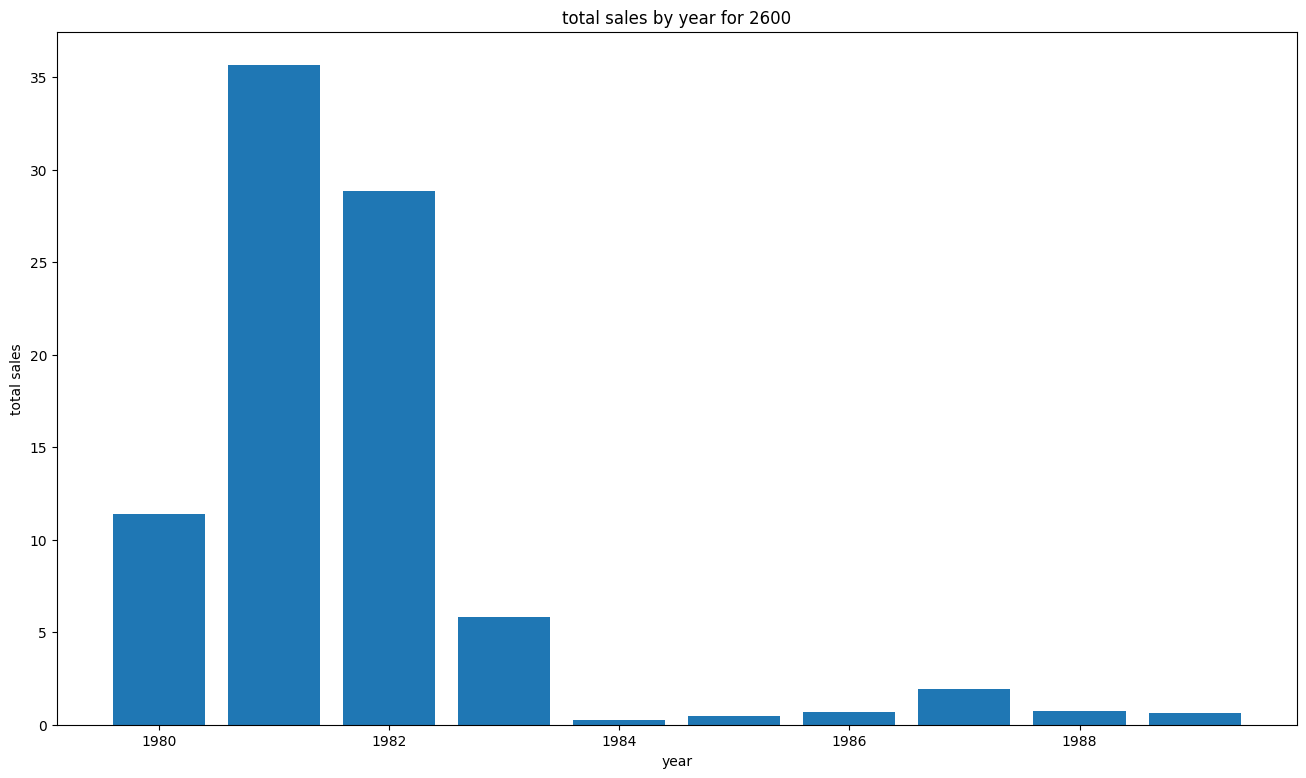

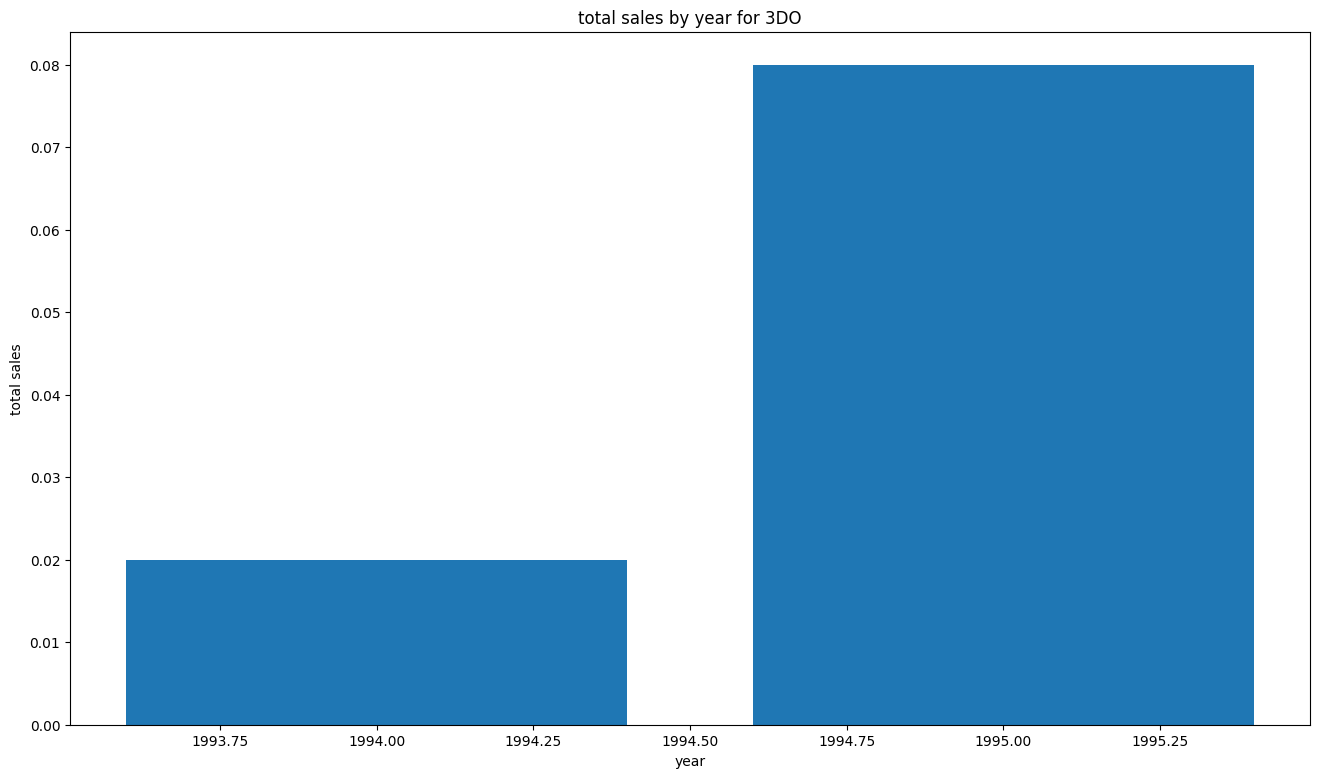

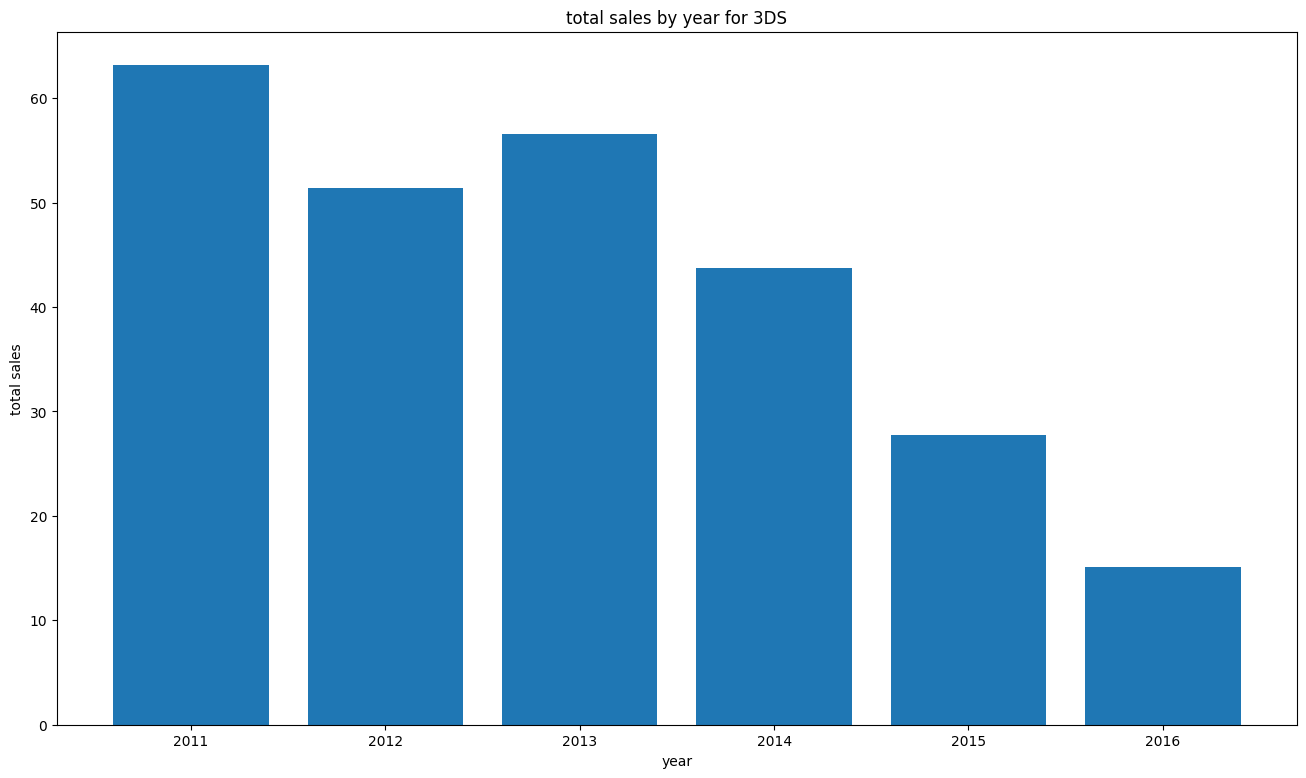

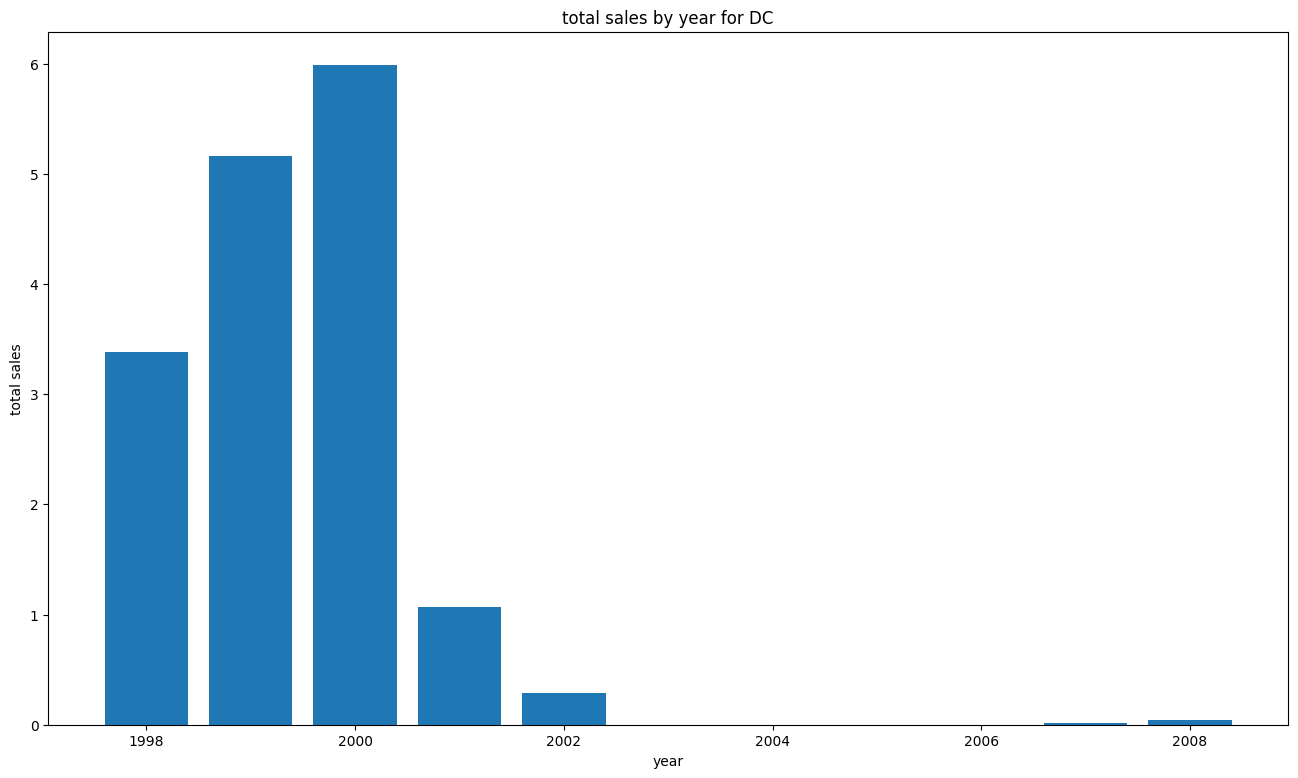

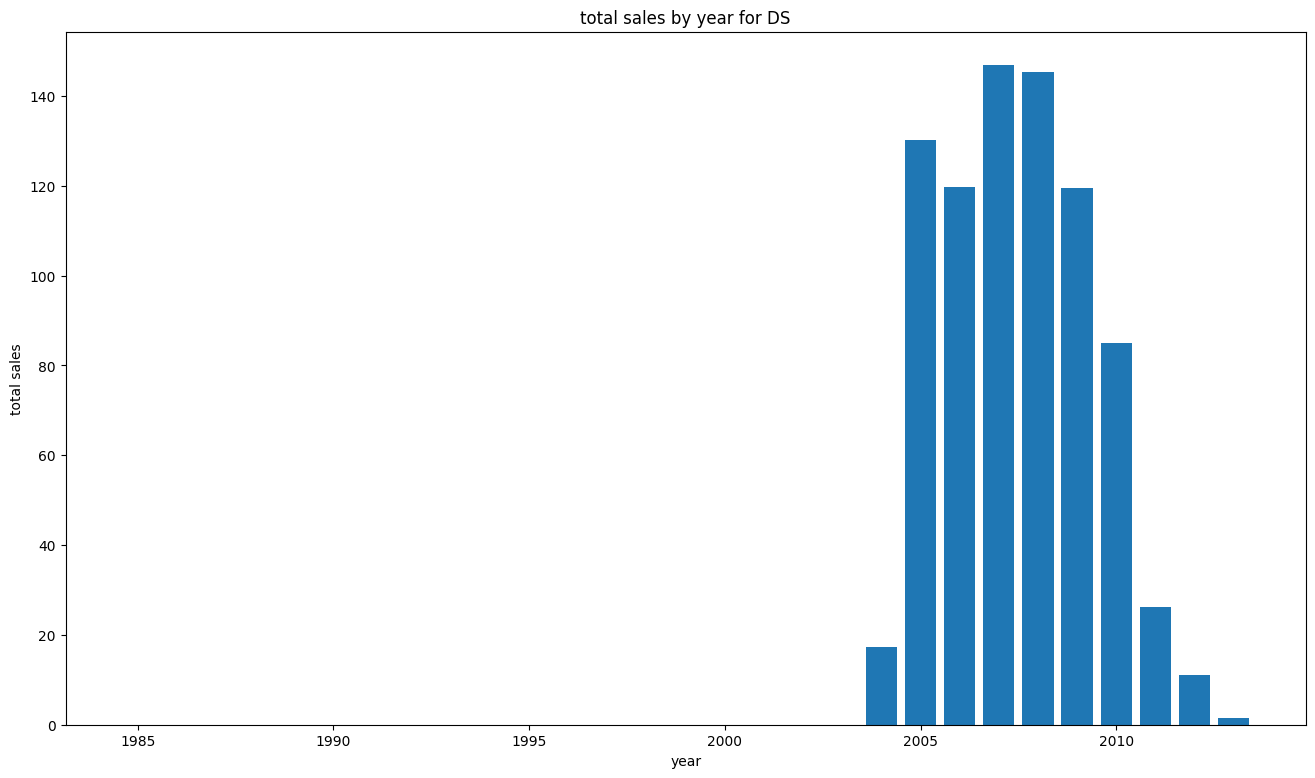

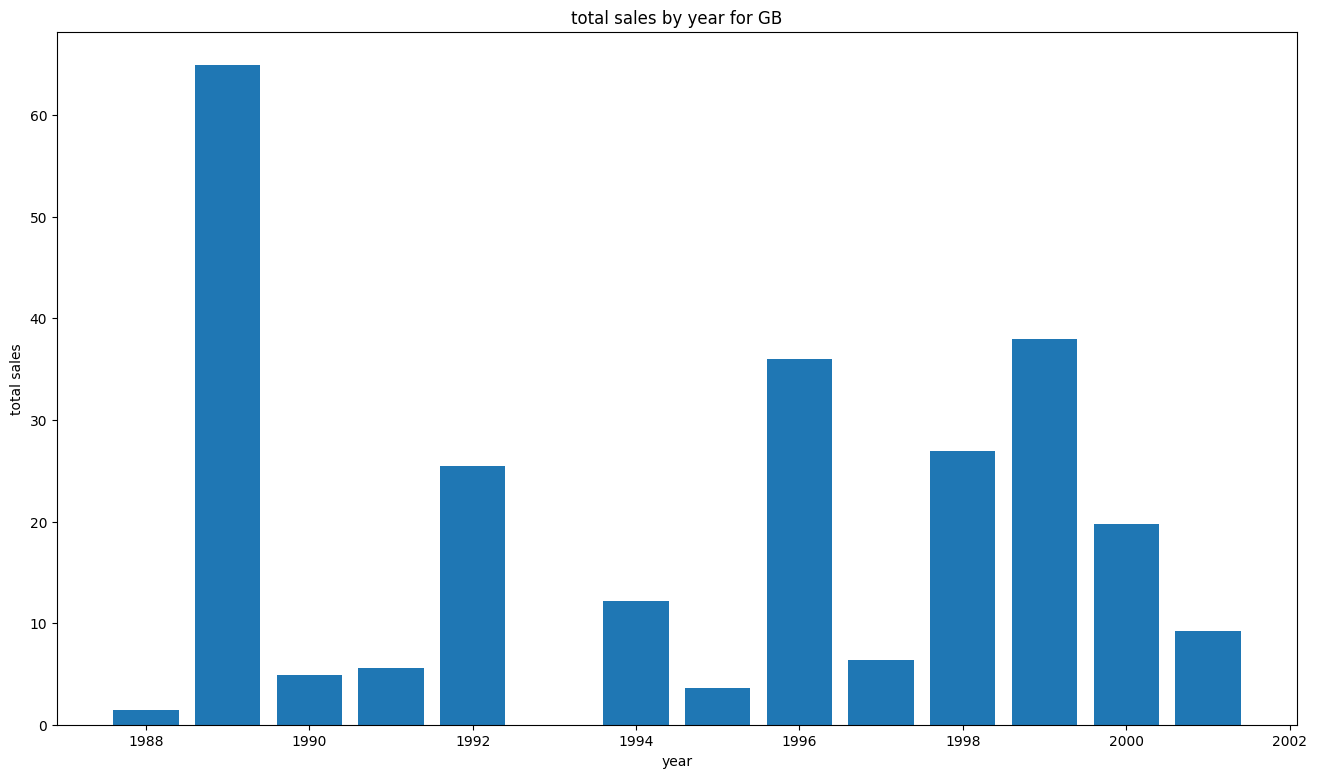

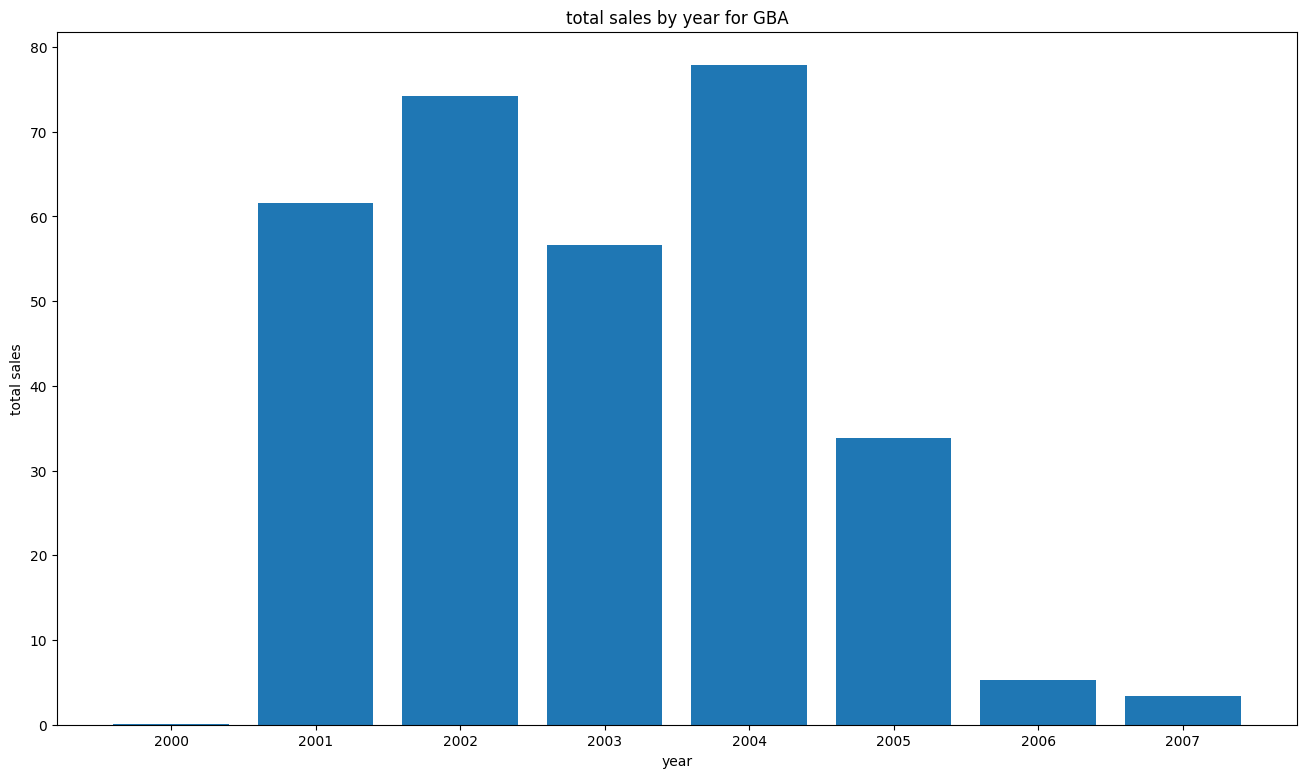

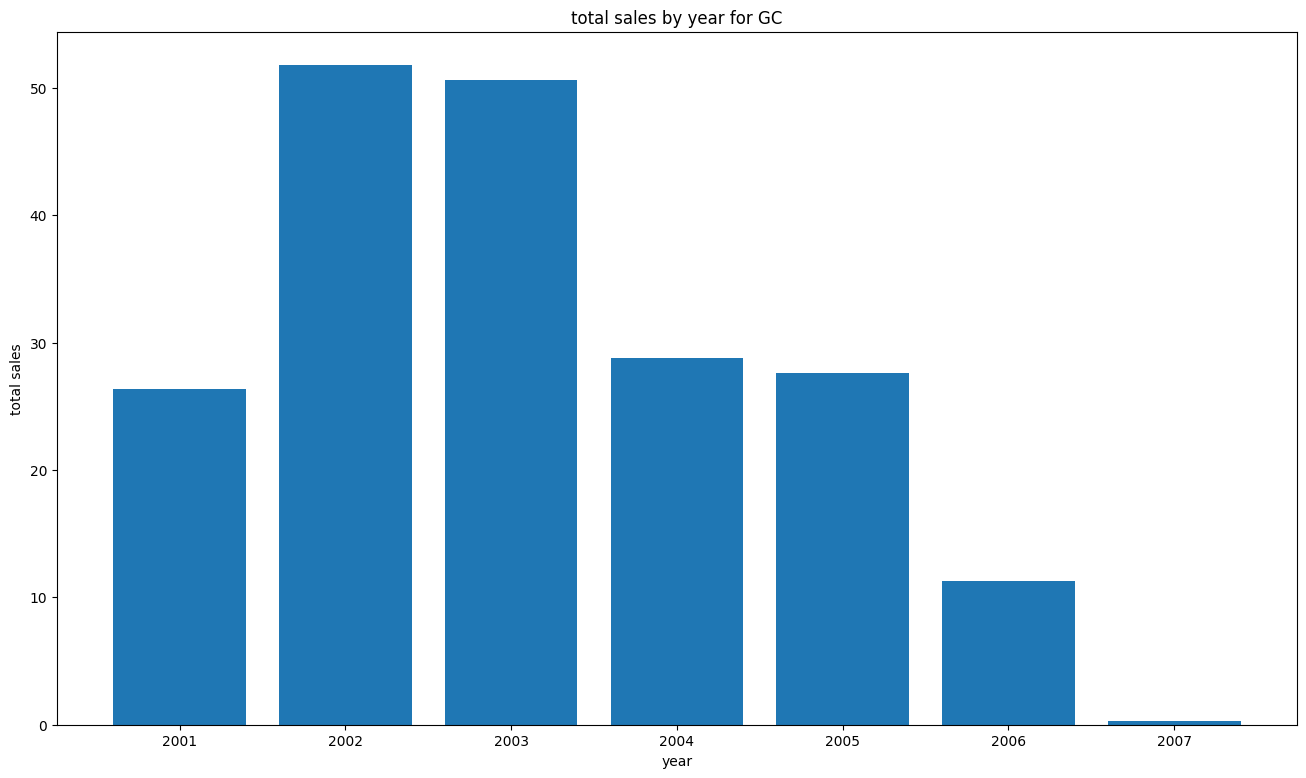

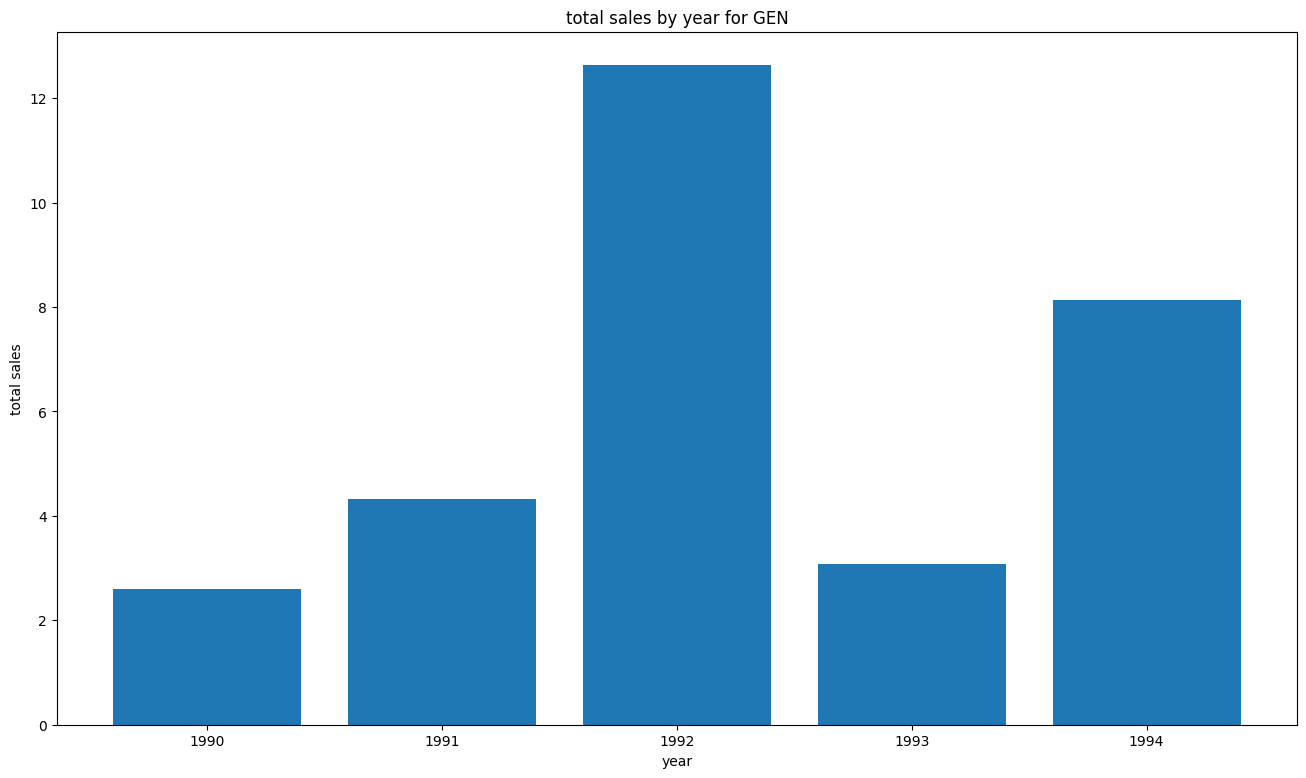

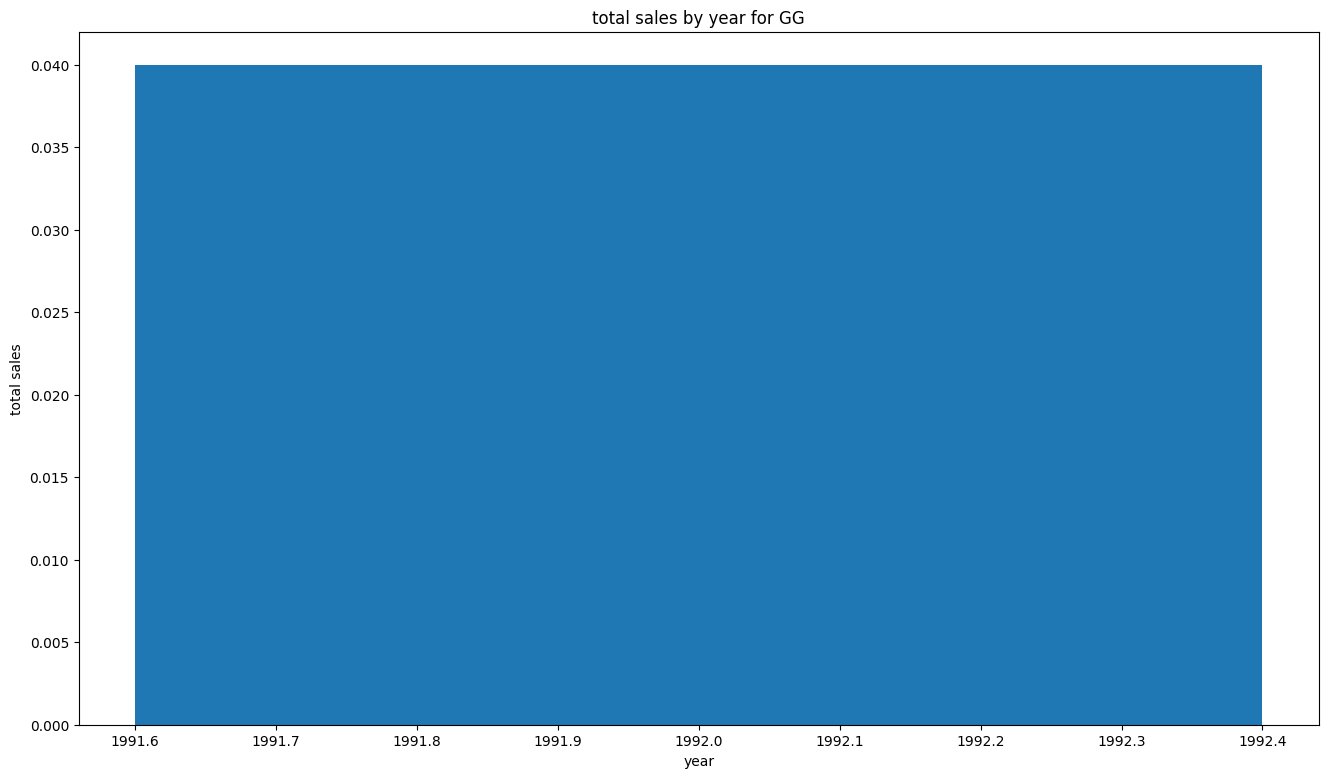

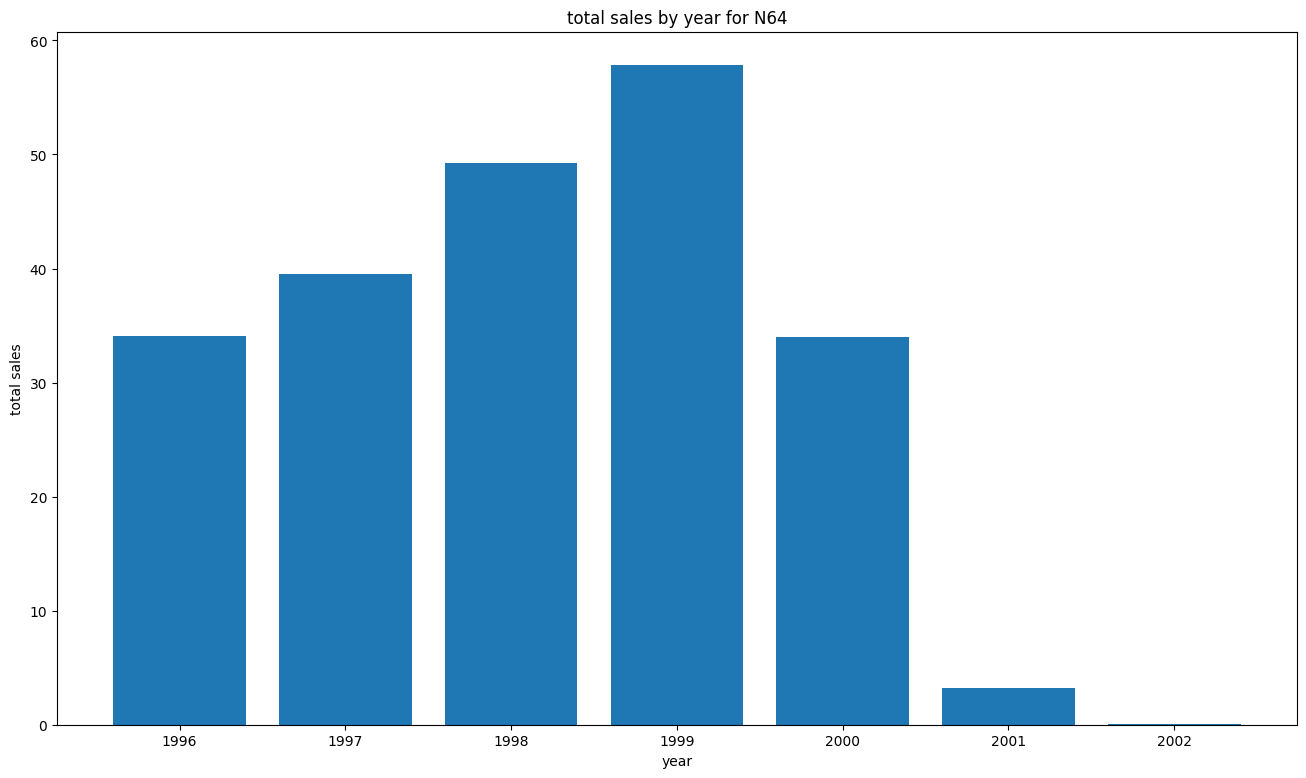

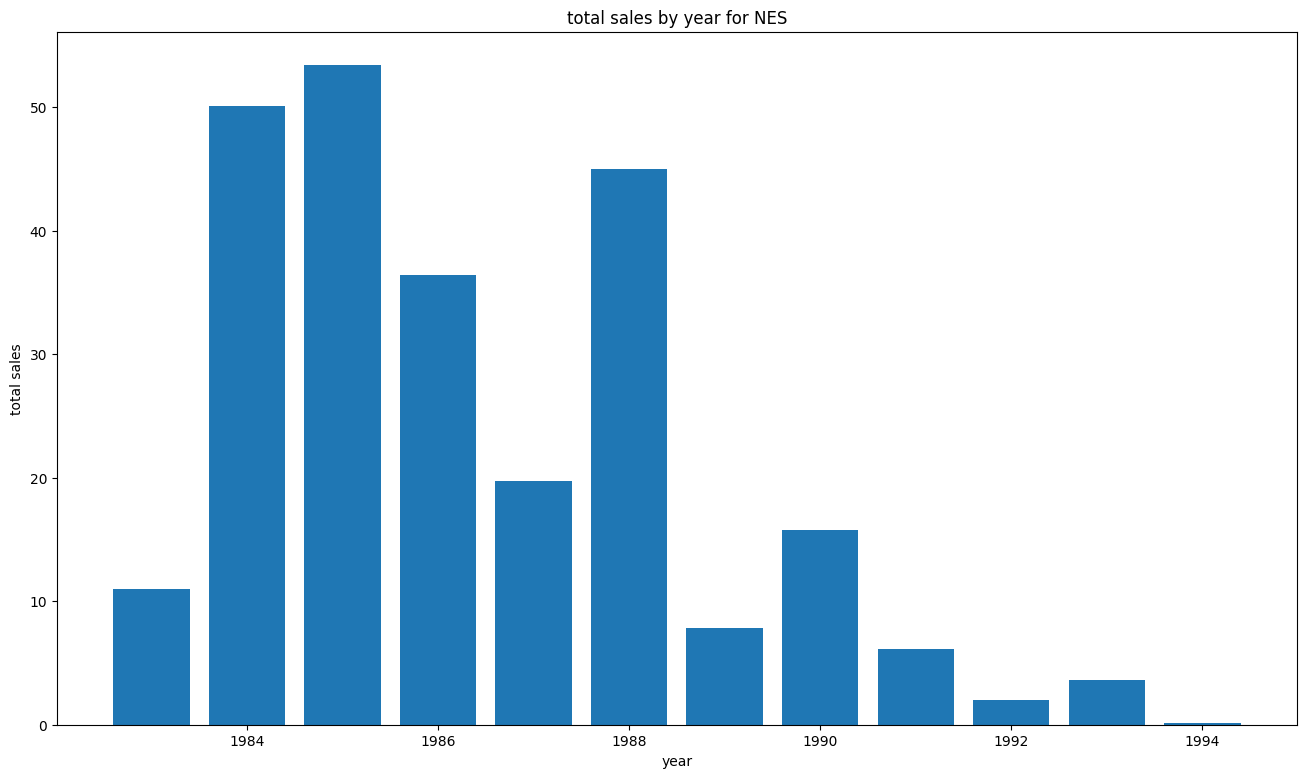

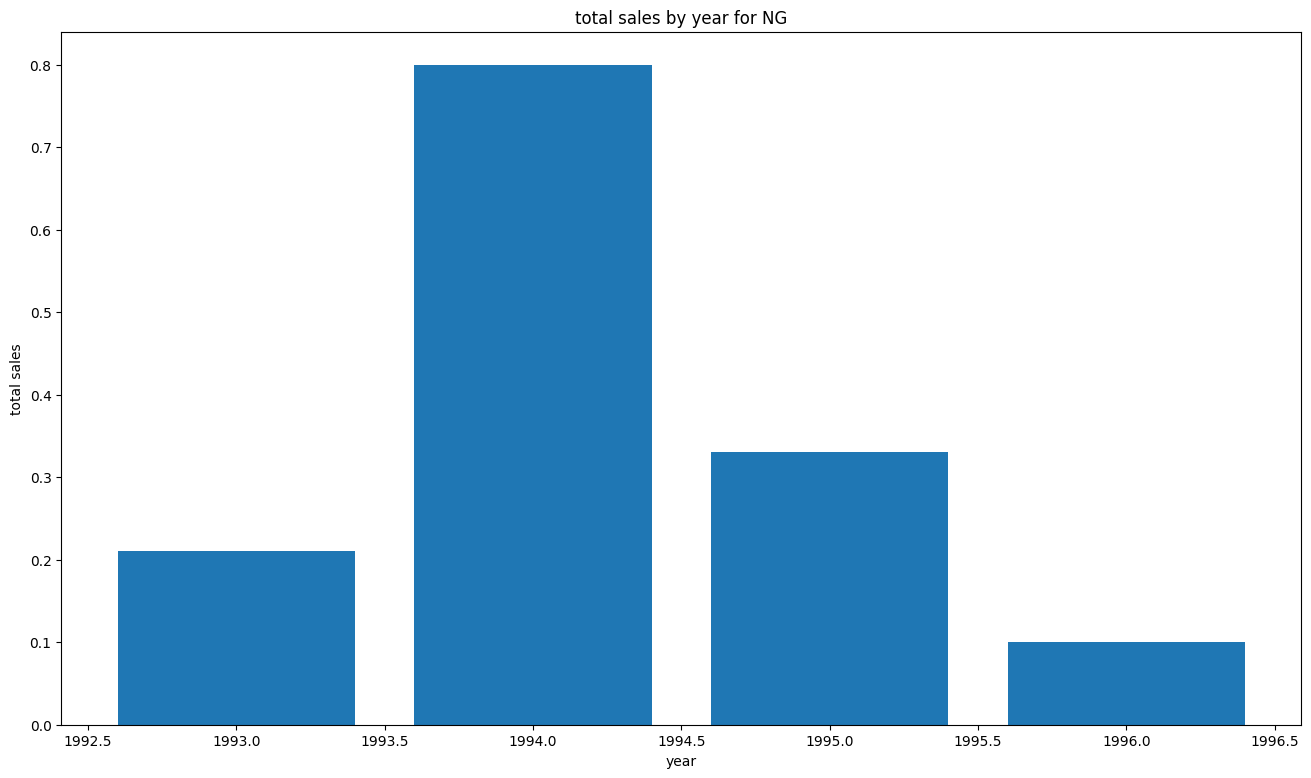

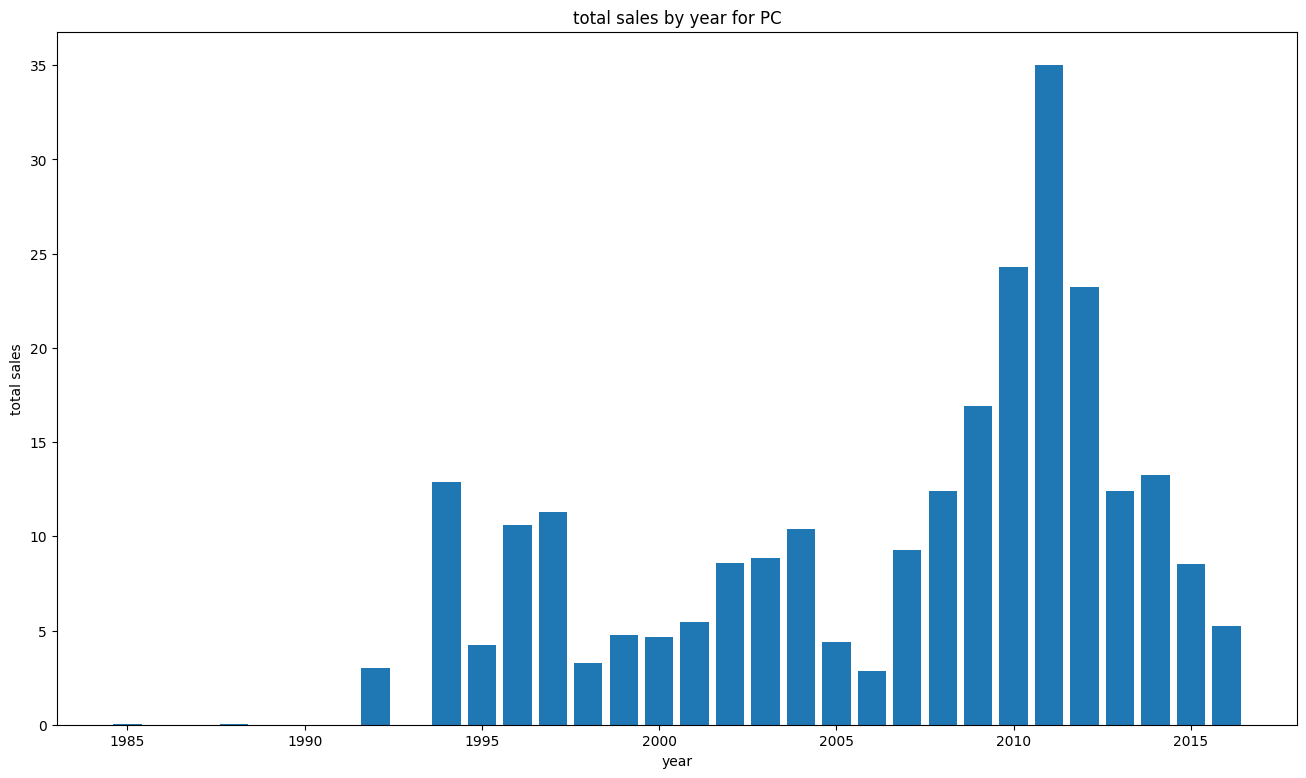

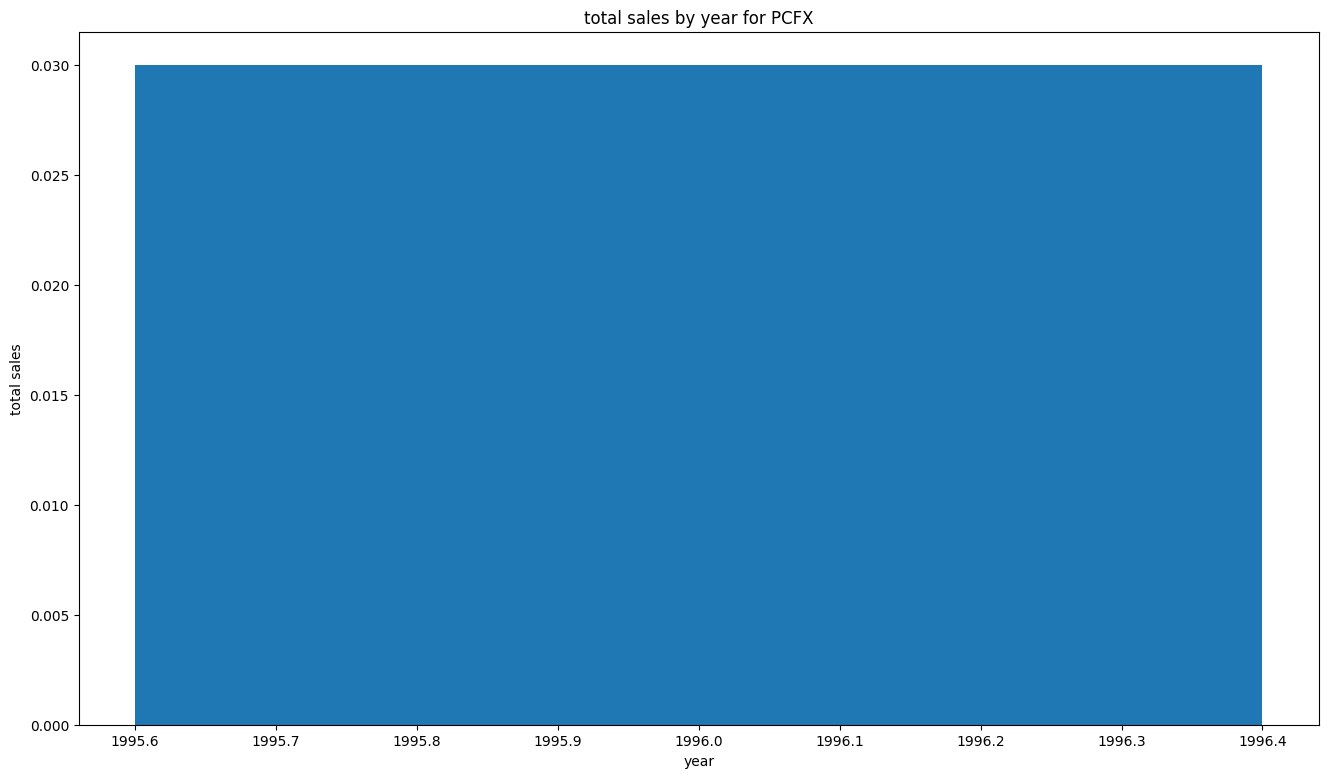

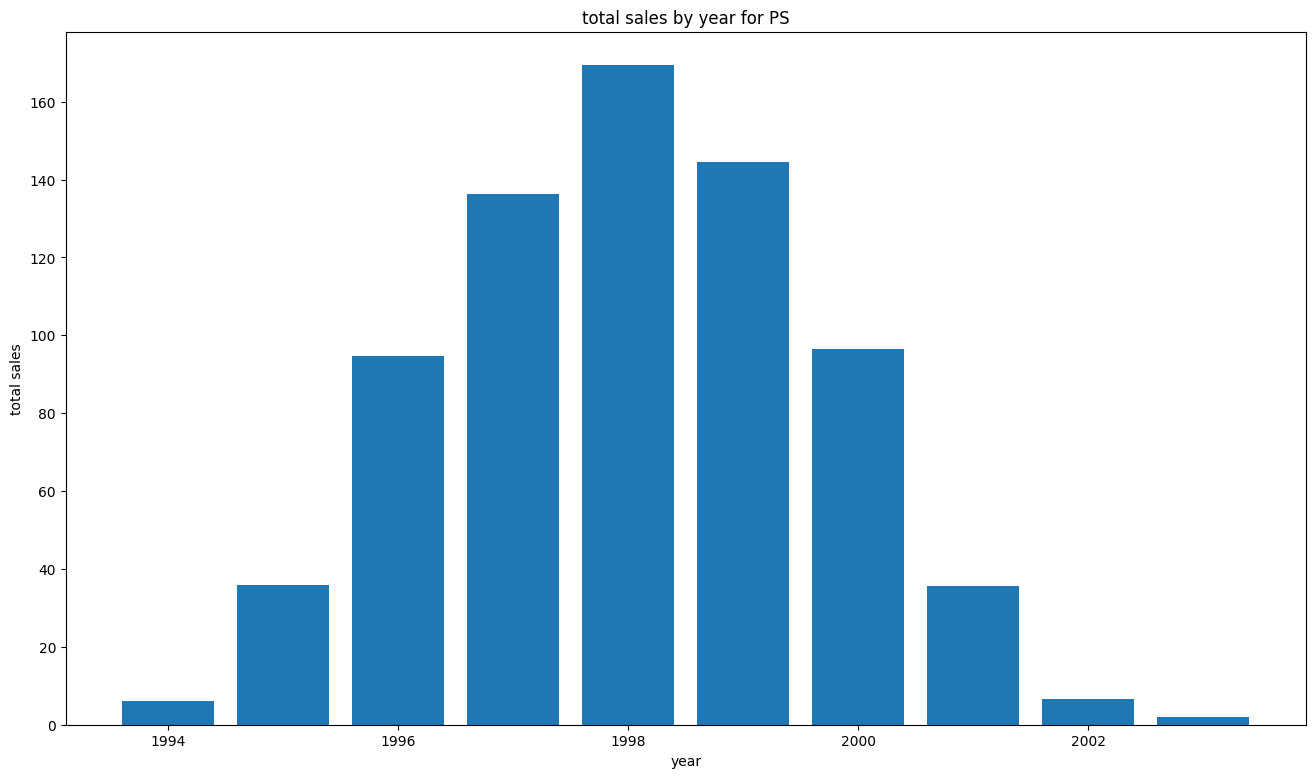

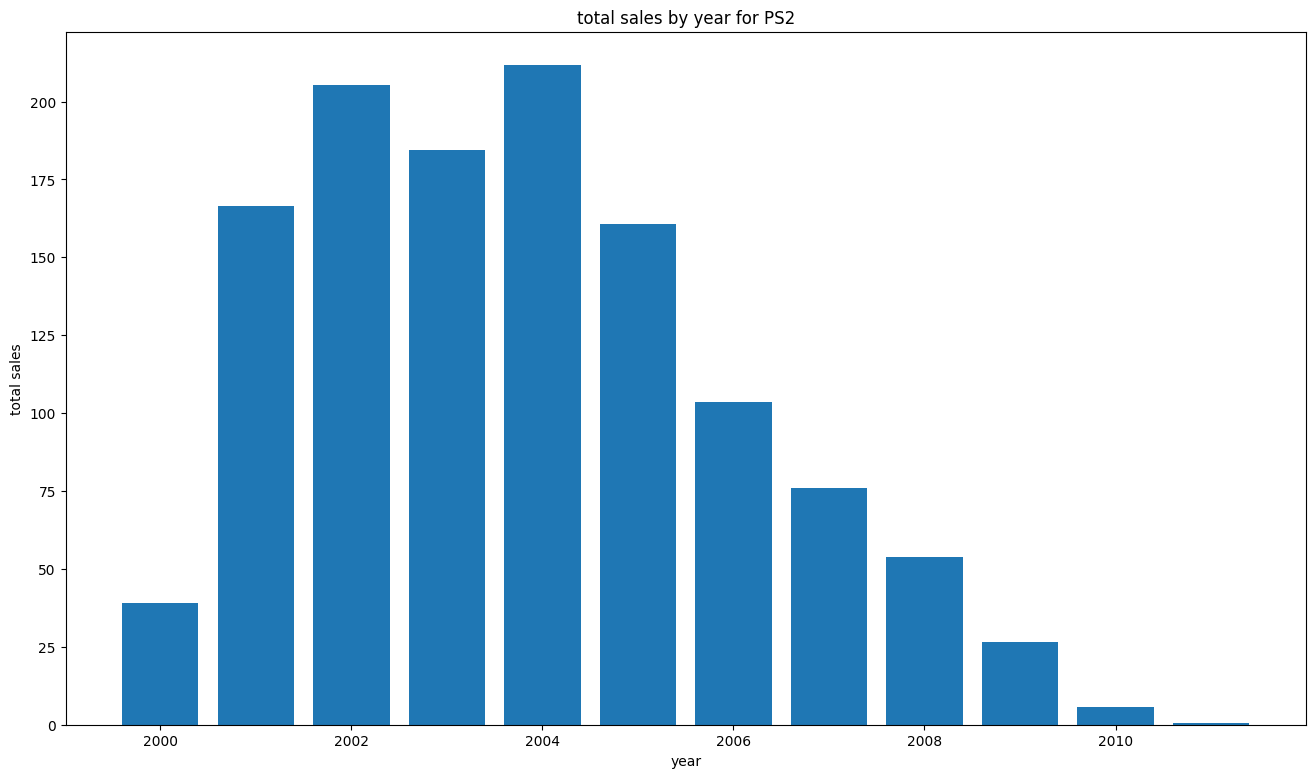

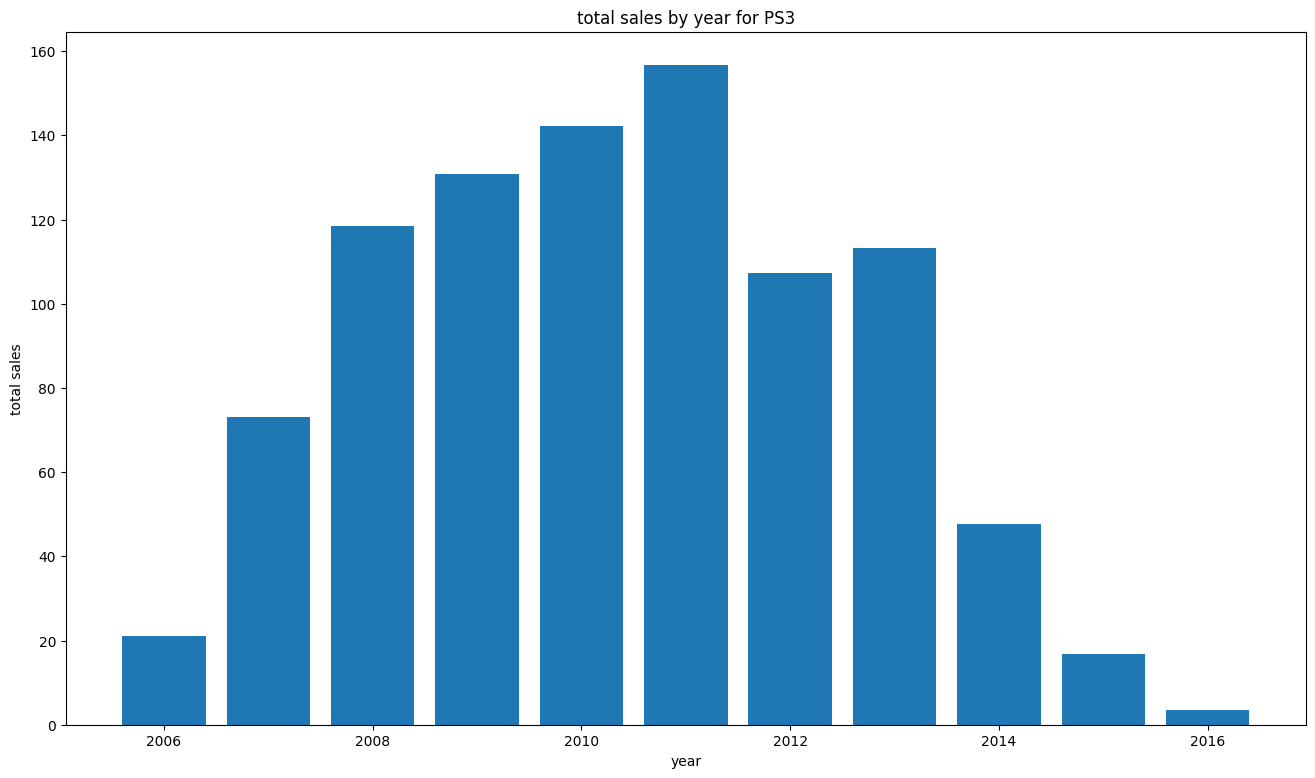

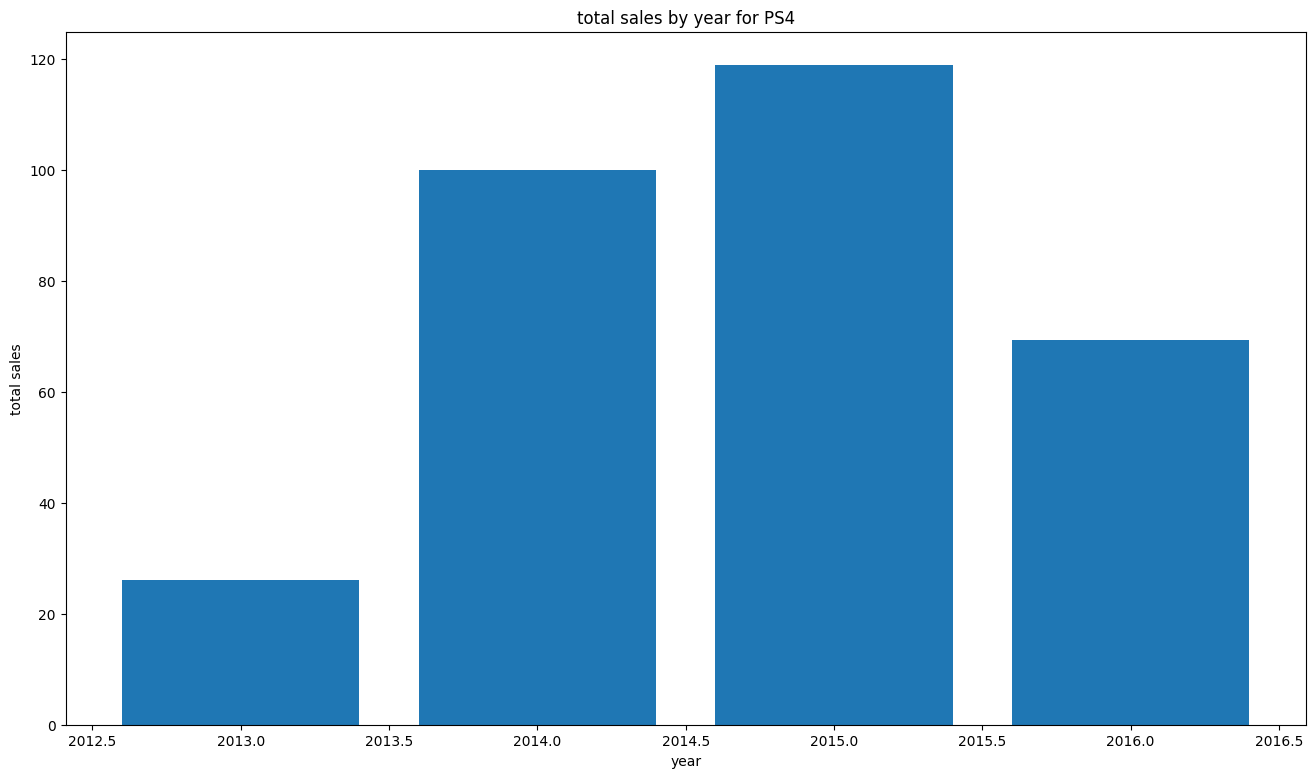

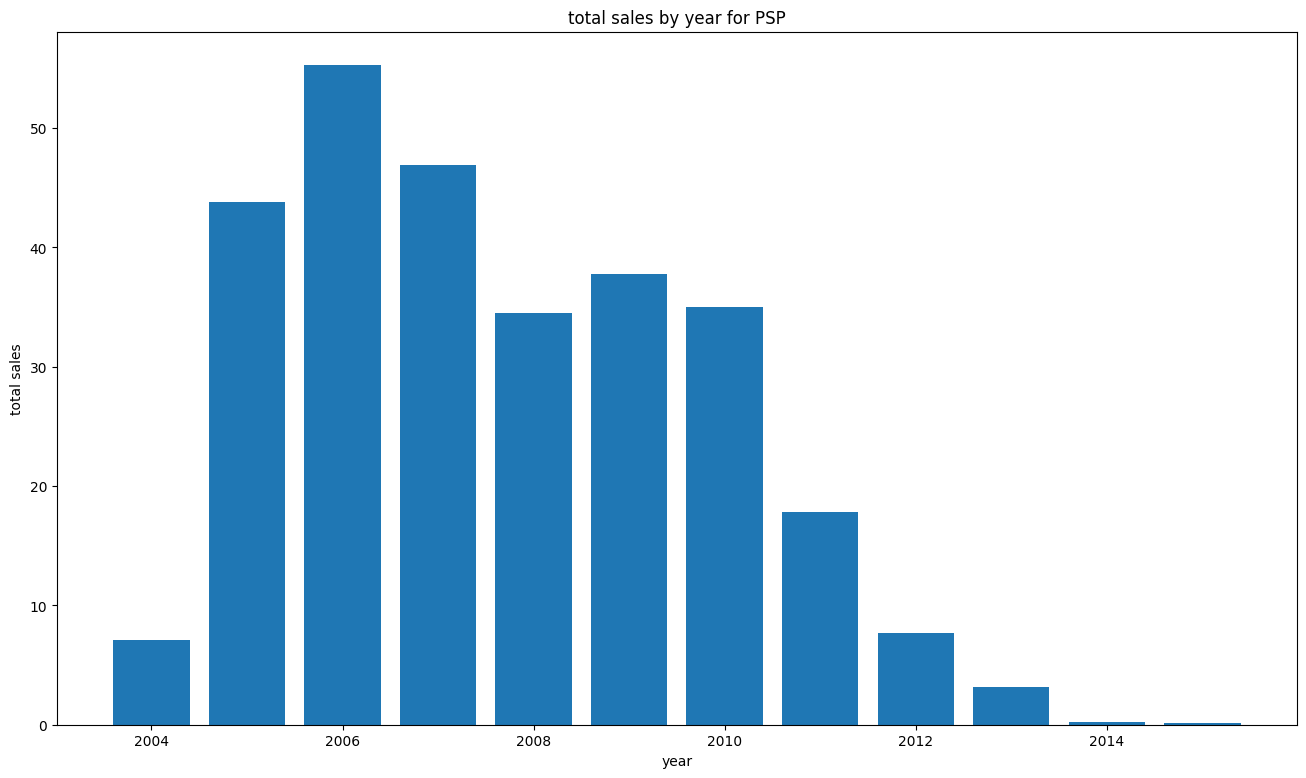

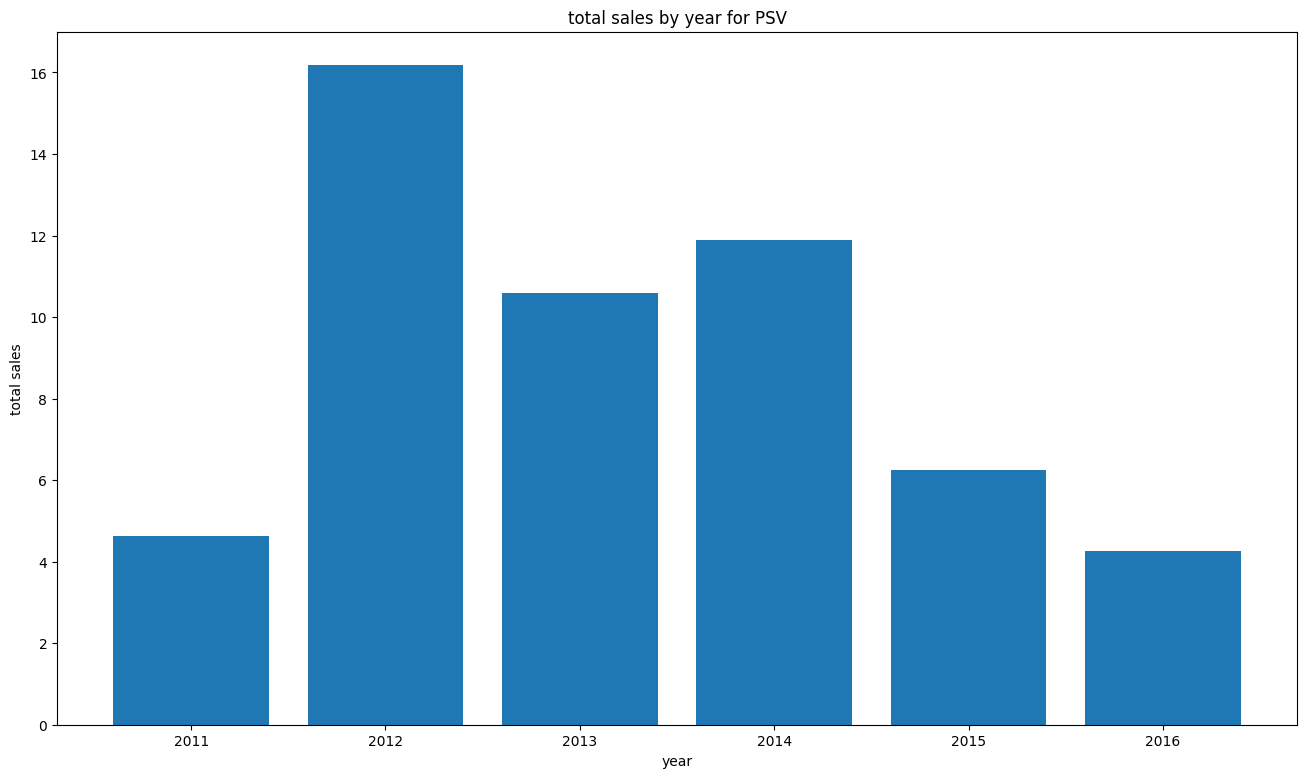

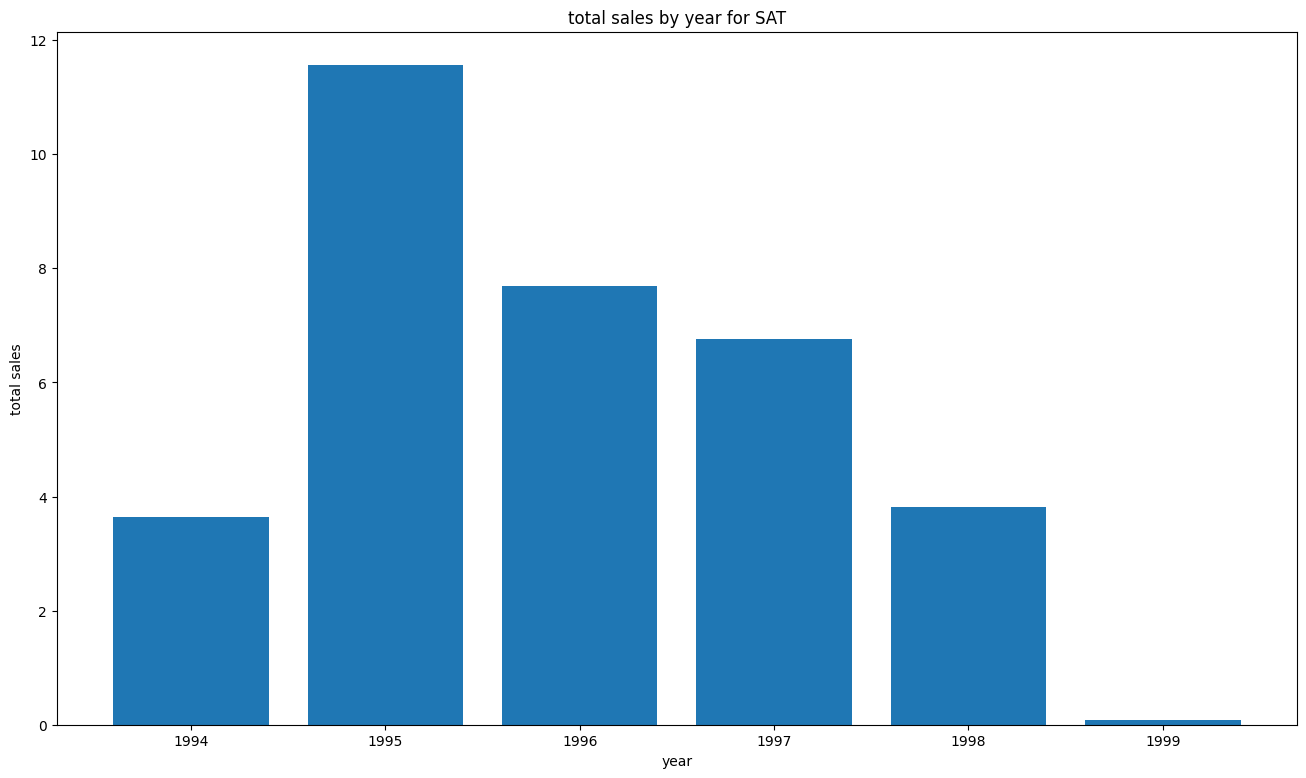

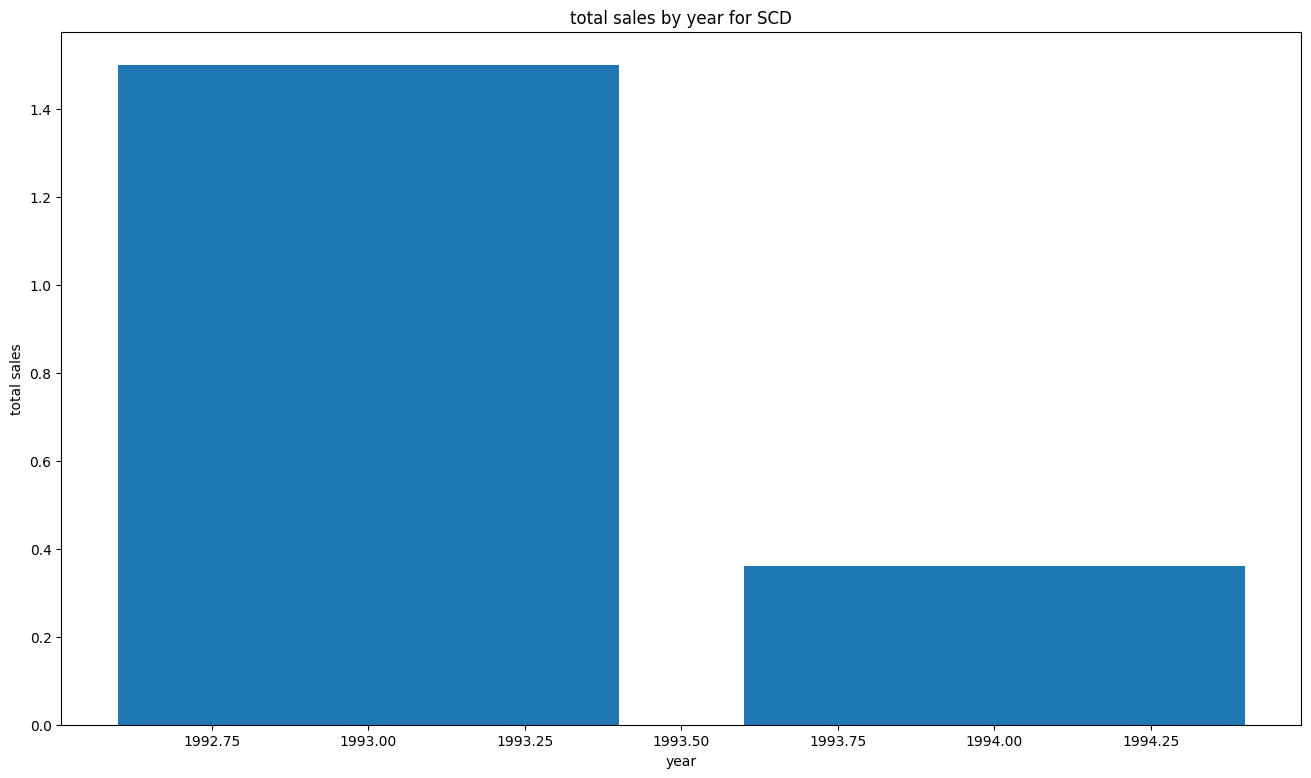

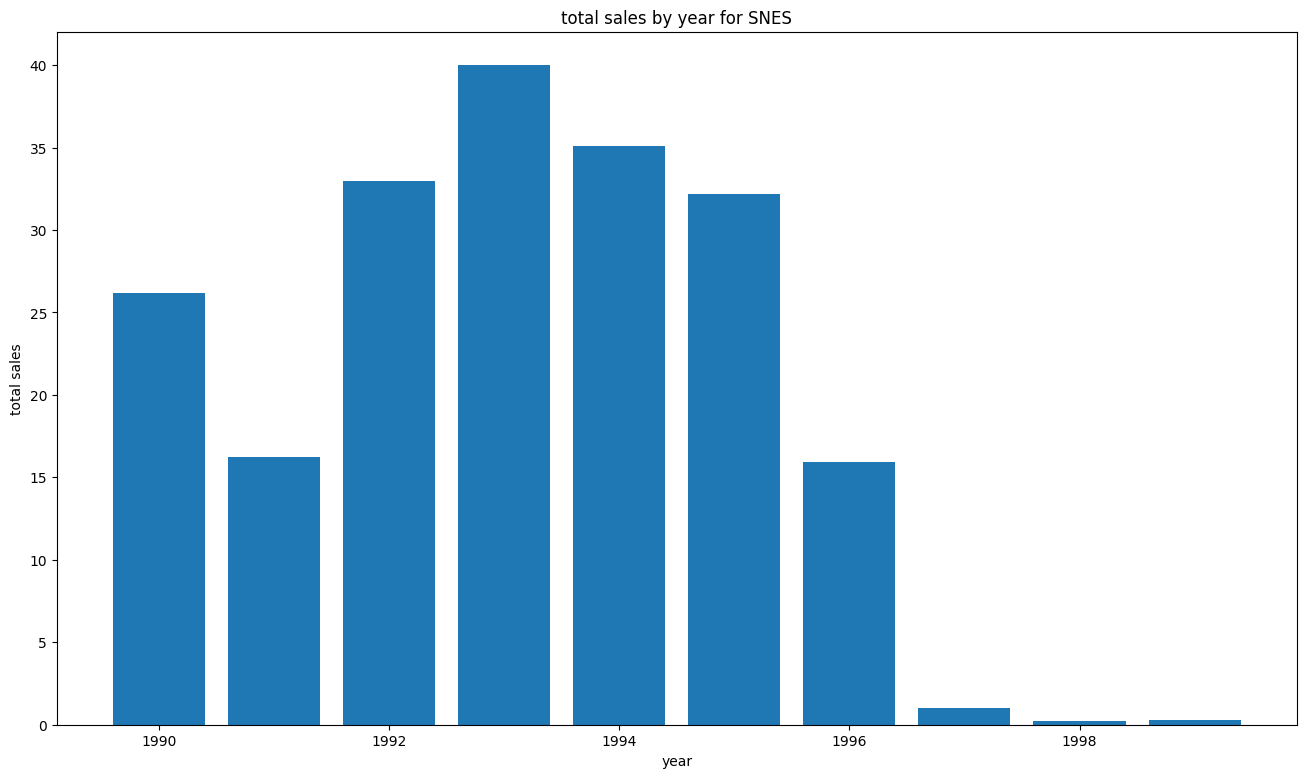

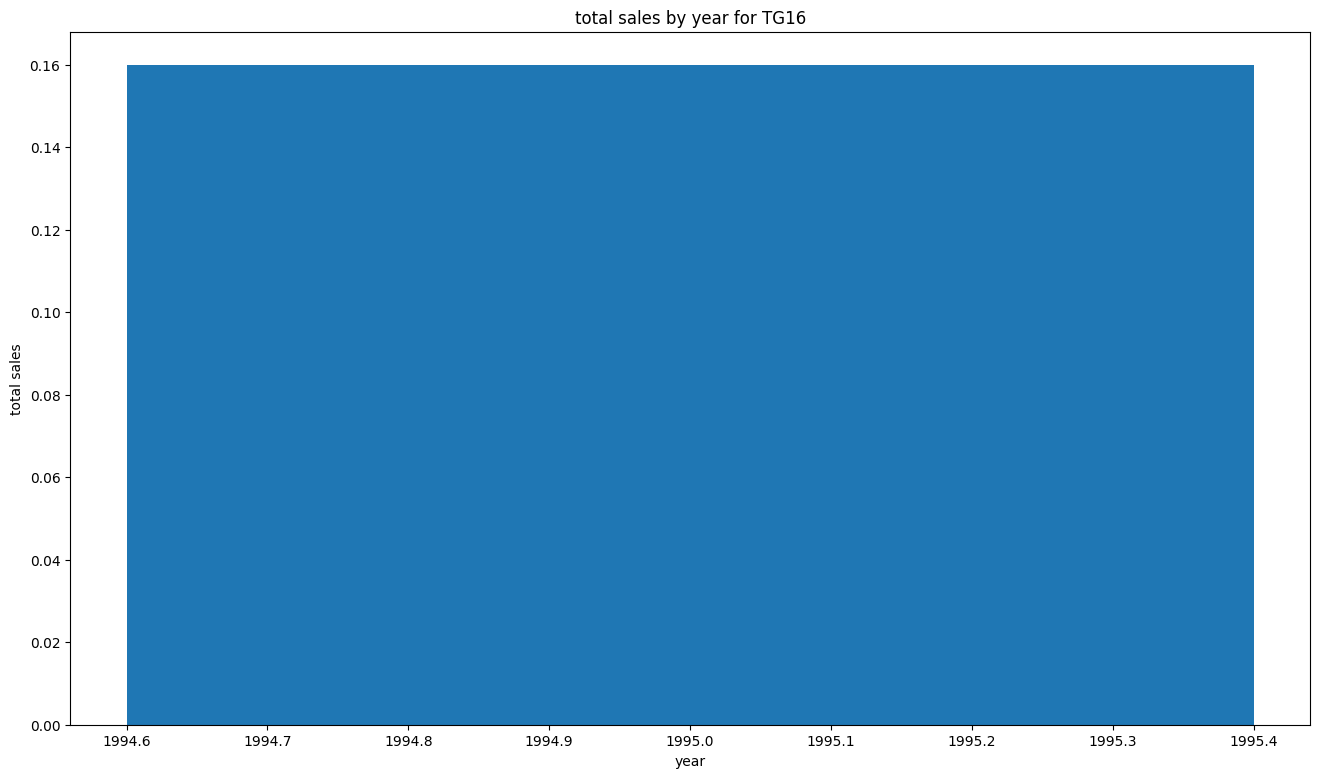

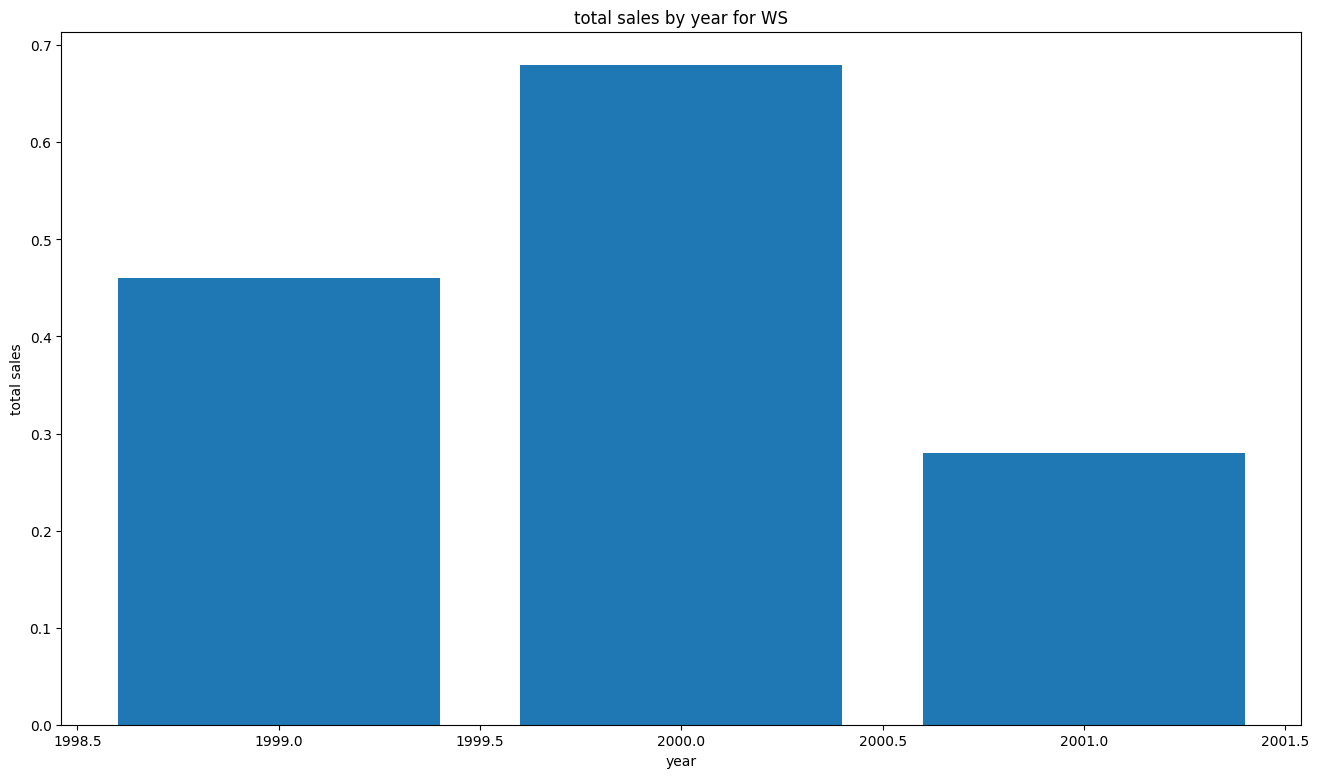

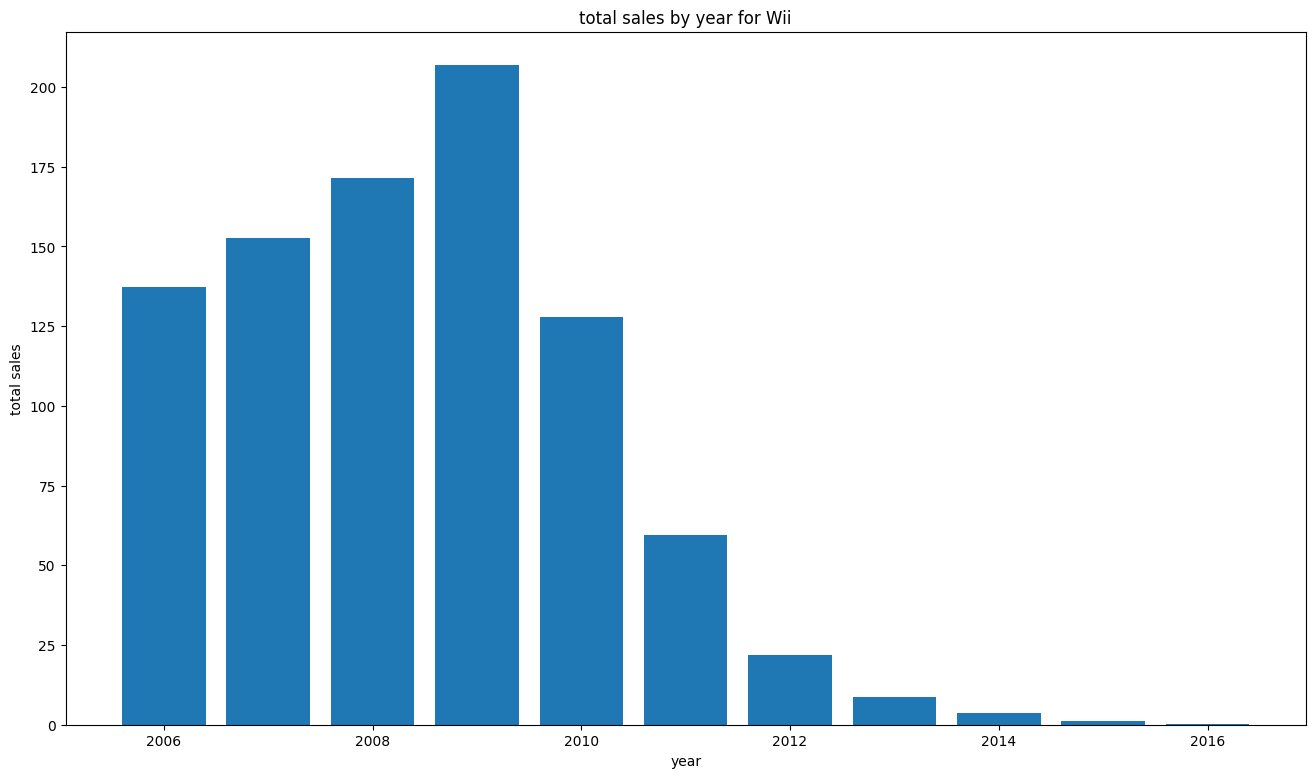

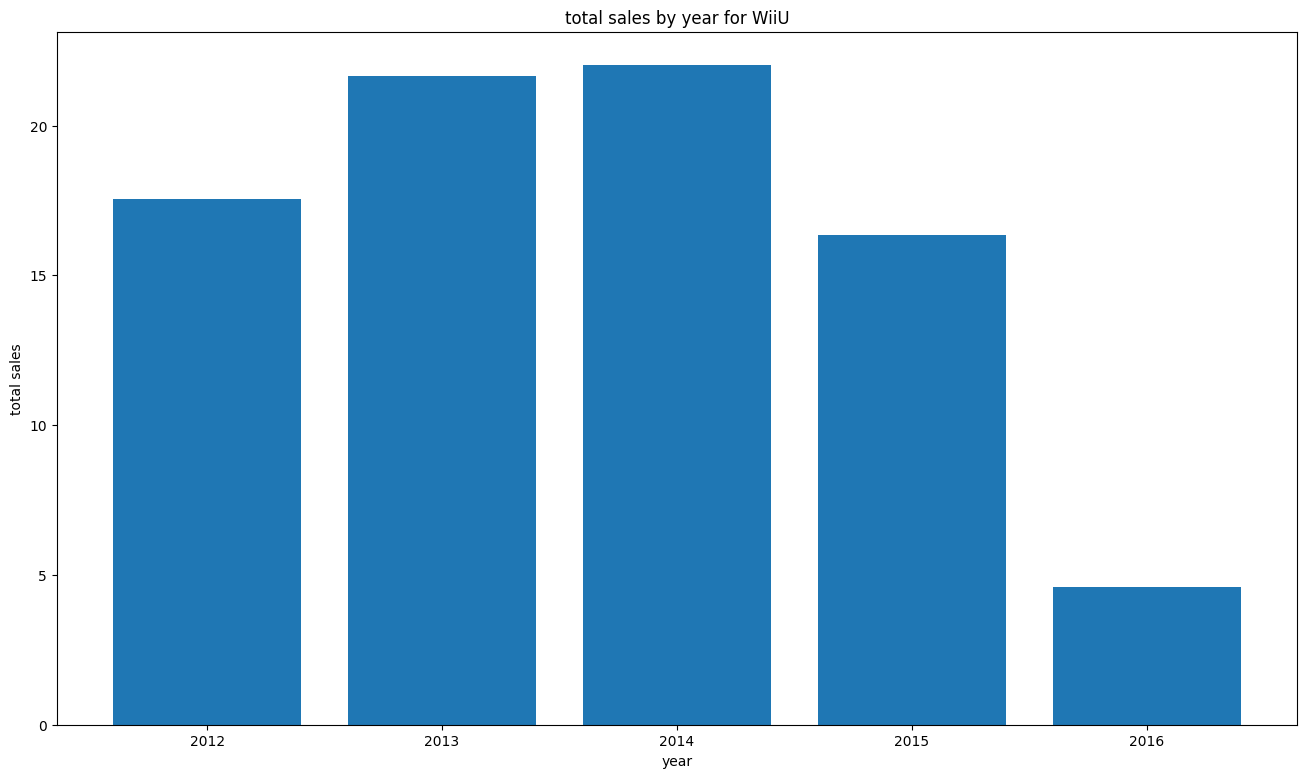

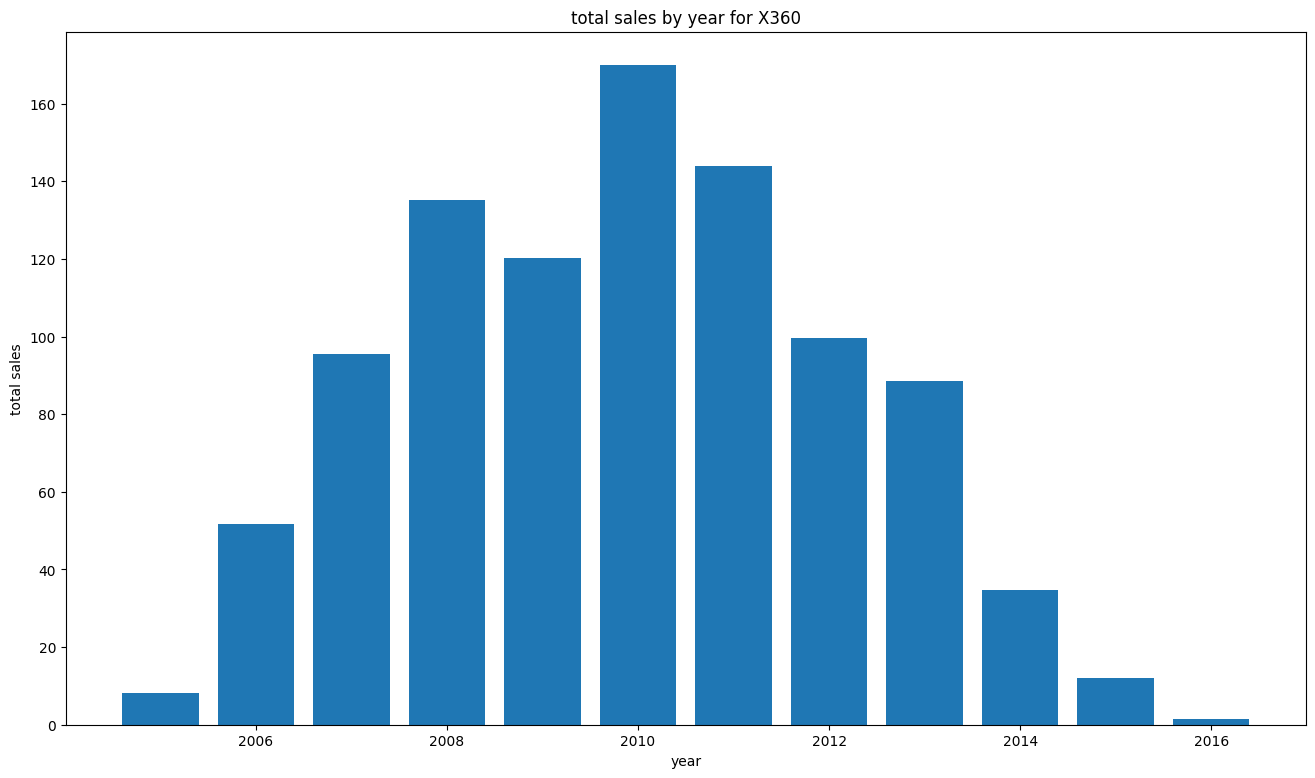

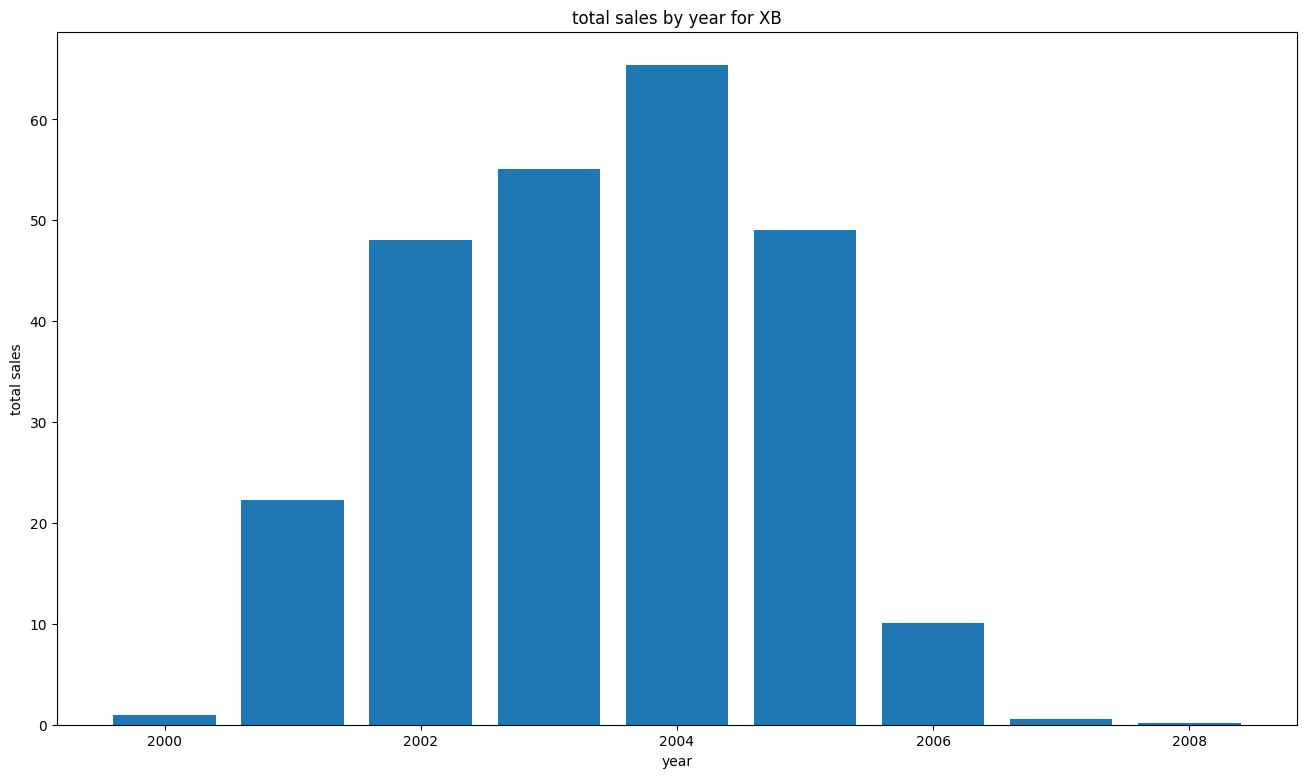

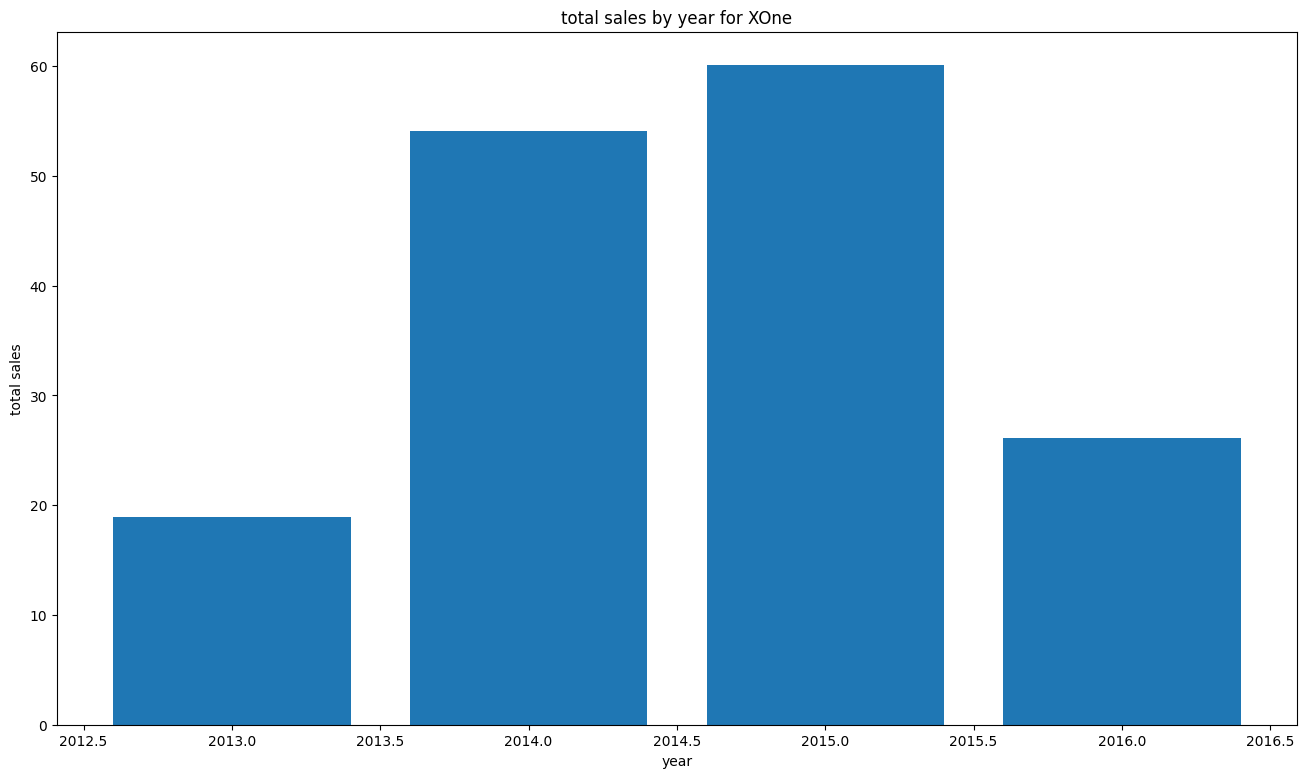

In [16]:
# Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?
# removendo jogos com ano de lançamento 0
df_games_with_year = df_games[df_games["year_of_release"] != 0]

# criando uma pivot para facilitar a criação dos gráficos
df_games_pivot = df_games_with_year.pivot_table(
    index="platform",
    columns="year_of_release",
    values="total_sales",
    aggfunc="sum"
)

# criando os gráficos para analisar
for platform in df_games_pivot.index:
    plt.figure(figsize=(16,9))
    plt.bar(df_games_pivot.columns, df_games_pivot.loc[platform])
    plt.xlabel("year")
    plt.ylabel("total sales")
    plt.title(f"total sales by year for {platform}")
    plt.rot=40
    plt.show()


Let's consider the following groups to analyze the succession of old and new platforms:

- PS -> PS2 -> PS3 -> PS4

  - PS started in 1994, peaked in 1998, and took 5 years after 1998 to disappear, with its last year of releases in 2003.
  - PS2 started in 2000, peaked in 2004, and took 7 years after 2004 to disappear, with its last year of releases in 2011.
  - PS3 began in 2006, peaked in 2011, and took 5 years after 2011 to disappear, with its last releases in 2016.
  - PS4 started in 2013, peaked in 2015, and still had releases in 2016.
  - For this group, each platform takes between 6 and 7 years to launch, considering the years with sales, and each platform takes 5 to 7 years to disappear.
  
- NES -> SNES -> N64
  - NES started in 1983, peaked in 1985, and took 9 years after 1985 to disappear, with its last year of releases in 1994.
  - SNES started in 1990, peaked in 1993, and took 6 years after 1993 to disappear, with its last releases in 1999.
  - N64 started in 1996, peaked in 1999, and took 3 years after 1999 to disappear, with its last year of releases in 2002.
  - For this group, each platform takes 6 to 7 years to launch, and each platform takes 3 to 9 years to disappear.
  
- GB -> GBA
  - GB started in 1988, peaked in 1989, and after several oscillations, disappeared in 2001.
  - GBA started in 2001, peaked in 2004, and took 3 years after 2004 to disappear, with its last releases in 2007.
  - In this group, the second platform (GBA) took 13 years to be launched compared to the GB.

- Wii -> WiiU
  - Wii started in 2006, peaked in 2009, and took 7 years after 2009 to disappear, with its last releases in 2016.
  - WiiU started in 2012, peaked in 2014, and still had releases in 2016.
  - In this group, the second platform (WiiU) took 6 years to be launched.

- XB -> X360 -> XOne
  - XB started in 2000, peaked in 2004, and took 4 years after 2004 to disappear, with its last releases in 2008.
  - X360 began in 2005, peaked in 2010, and still had releases in 2016.
  - XOne started in 2013, peaked in 2015, and still had releases in 2016.
  - In this group, each platform took between 5 and 8 years to be launched.

- Conclusion 1: Generally, a new platform takes between 5 and 8 years to launch. However, some exceptions were identified, and some platforms cannot be considered a logical succession of the previous platform.

- Conclusion 2: Although we have less data for this second conclusion, we can estimate that a platform takes an average of 3 to 9 years to disappear after its peak release year.Let's consider the following groups to analyze the succession of old and new platforms:

In [17]:
# Determine para qual período você deve pegar dados. 
# Para fazê-lo, olhe para suas respostas para as perguntas anteriores. 
# Os dados te deveriam permitir construir um modelo para 2017.
# Trabalhar apenas com os dados que você decidiu que são relevantes. 
# Desconsidere os dados de anos anteriores.

# vamos considerar os últimos 3 anos de dados para projetar 2017 (2013-2016)
# desta forma temos uma boa amostragem e podemos analisar os lançamentos ano a ano de diversas plataformas ainda ativas
# ao mesmo tempo que desconsideramos plataformas já obsoletas
base_2017 = df_games[df_games["year_of_release"] >= 2013]

In [18]:
# analisando as vendas das plataformas entre 2013 e 2016

plats_2017 = base_2017.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
plats_2017.head(10)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: total_sales, dtype: float64

In [49]:
# analisando as vendas por genero entre 2013 e 2016

genre_2017 = base_2017.groupby("genre")["total_sales"].sum().sort_values(ascending=False)
genre_2017.head(10)

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Name: total_sales, dtype: float64

In [68]:
# analisando os jogos que melhores avaliações das plataformas e generos que vendem mais de 2013 a 2016

plat2017list = ["PS4", "PS3", "XOne"]
genre2017list = ["Action","Shooter","Sports"]

games_2017 = base_2017[(base_2017["platform"].isin(plat2017list)) & (base_2017["genre"].isin(genre2017list)) & (base_2017["user_score"] > 80)].sort_values(by="user_score",ascending=False)[["name","platform","genre"]]
games_2017.head(20)


,name,platform,genre
149,The Last of Us,PS3,Action
16140,Dead Rising,XOne,Action
5120,Rocket League,PS4,Sports
623,Bloodborne,PS4,Action
5114,BioShock The Collection,PS4,Shooter
3337,Dynasty Warriors 8,PS3,Action
6427,Batman: Return to Arkham,PS4,Action
1060,BioShock Infinite,PS3,Shooter
15487,Darksiders: Warmastered Edition,PS4,Action
12676,Toy Soldiers: War Chest,XOne,Action


In [69]:
print(games_2017.groupby("genre").count())
print(games_2017.groupby("platform").count())


         name  platform
genre                  
Action     22        22
Shooter    11        11
Sports      3         3
          name  genre
platform             
PS3         11     11
PS4         17     17
XOne         8      8


Conclusion for the 2017 Campaign:

- We should focus on releasing games primarily for the PS4 and PS3 platforms, and potentially for the XOne if development costs for this platform are minimal. These platforms are generating the most sales.

- We should concentrate on the Action and Shooter genres, as they are the most popular and have the highest sales.

- For Action games, we should draw inspiration from titles like "The Last of Us," "Dead Rising," "Bloodborne," and "Dynasty Warriors 8," as they have the best user ratings in this genre.

- For Shooter games, we should be inspired by titles like "Bioshock Collection," "Bioshock Infinite," and "Titanfall 2," which have the best user ratings in this genre.

- Alternatively, we could try developing a Sports game similar to "Rocket League," which has received very positive user reviews.

In [19]:
# Quais plataformas estão liderando em vendas?
top_sellers = df_games[df_games["year_of_release"] >= 2010].groupby("platform")["total_sales"].sum().sort_values(ascending=False)
top_sellers.head(10)

platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
Name: total_sales, dtype: float64

Conclusion: Platforms above are top10 in sales since 2010

['X360' 'PS3' 'DS' 'PS4' '3DS' 'Wii' 'XOne' 'WiiU' 'PC' 'PSP' 'PSV' 'PS2']


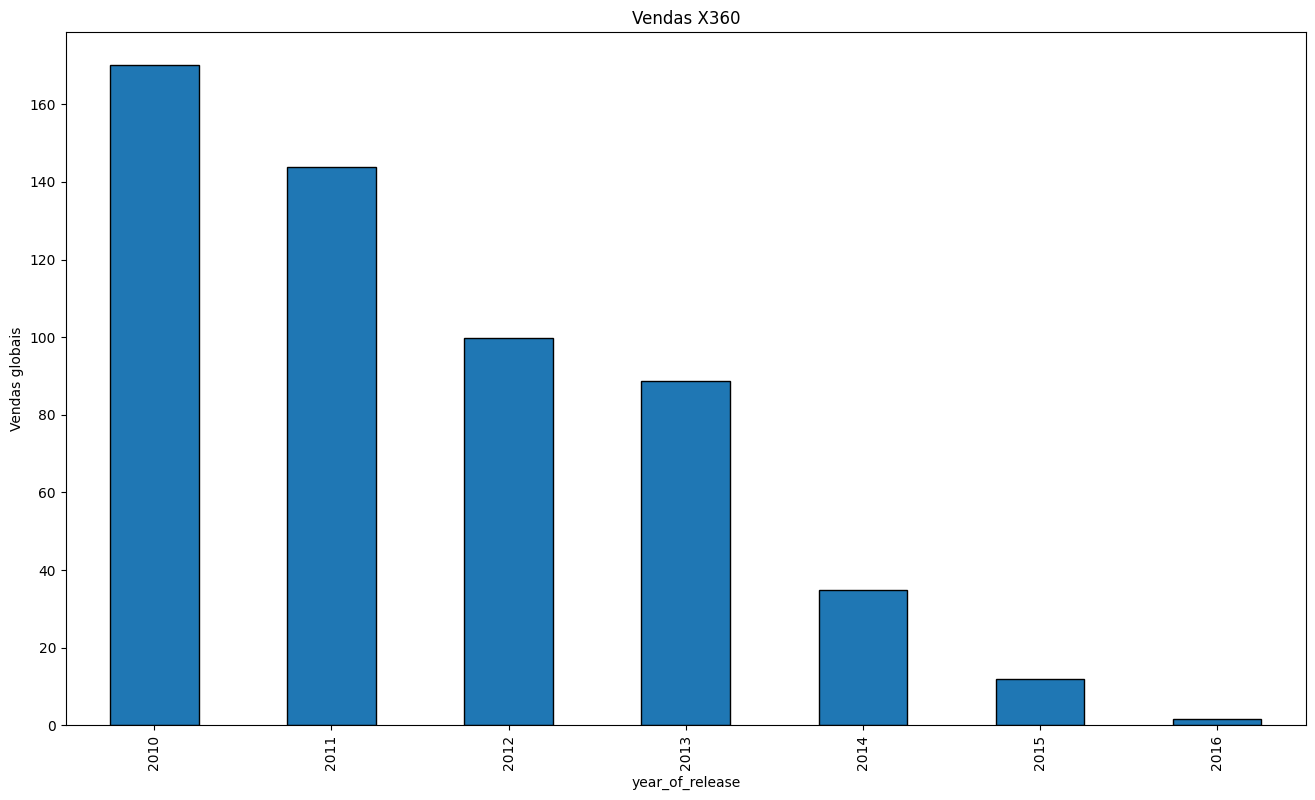

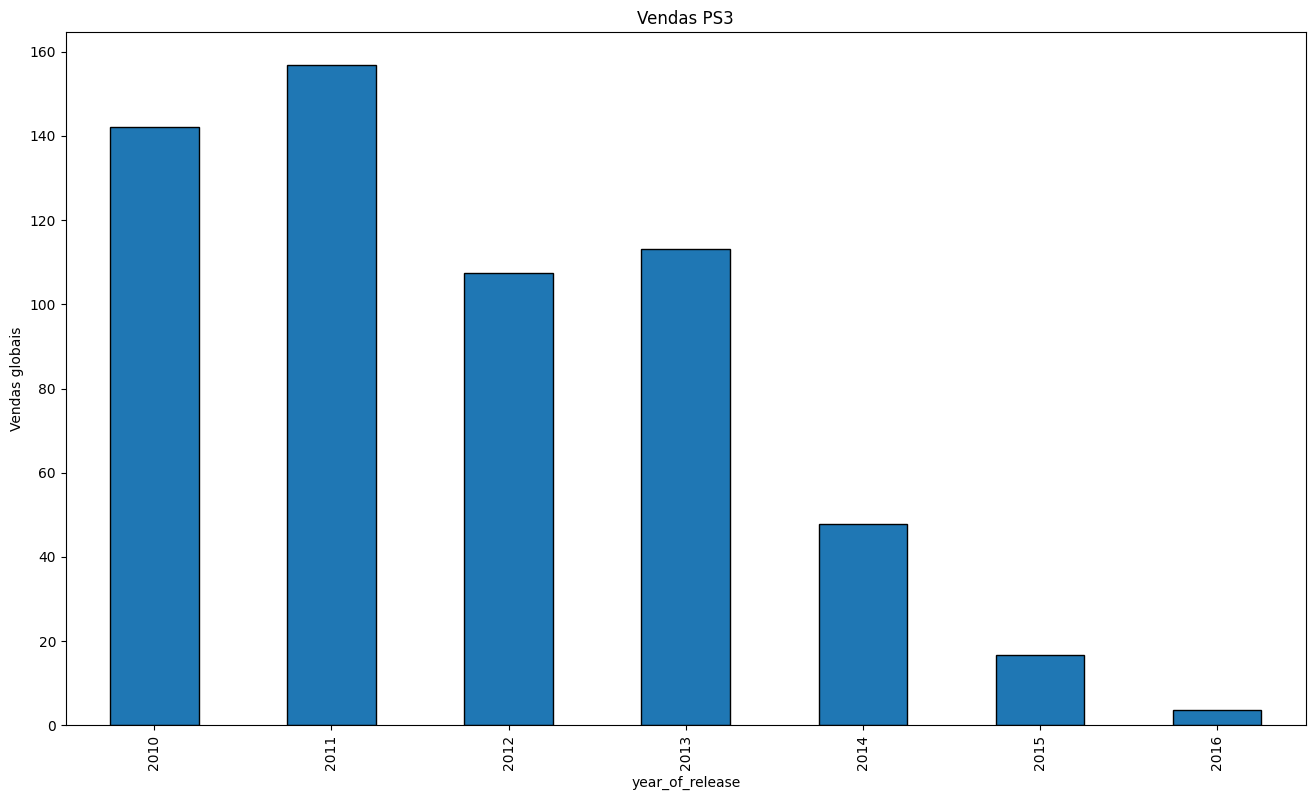

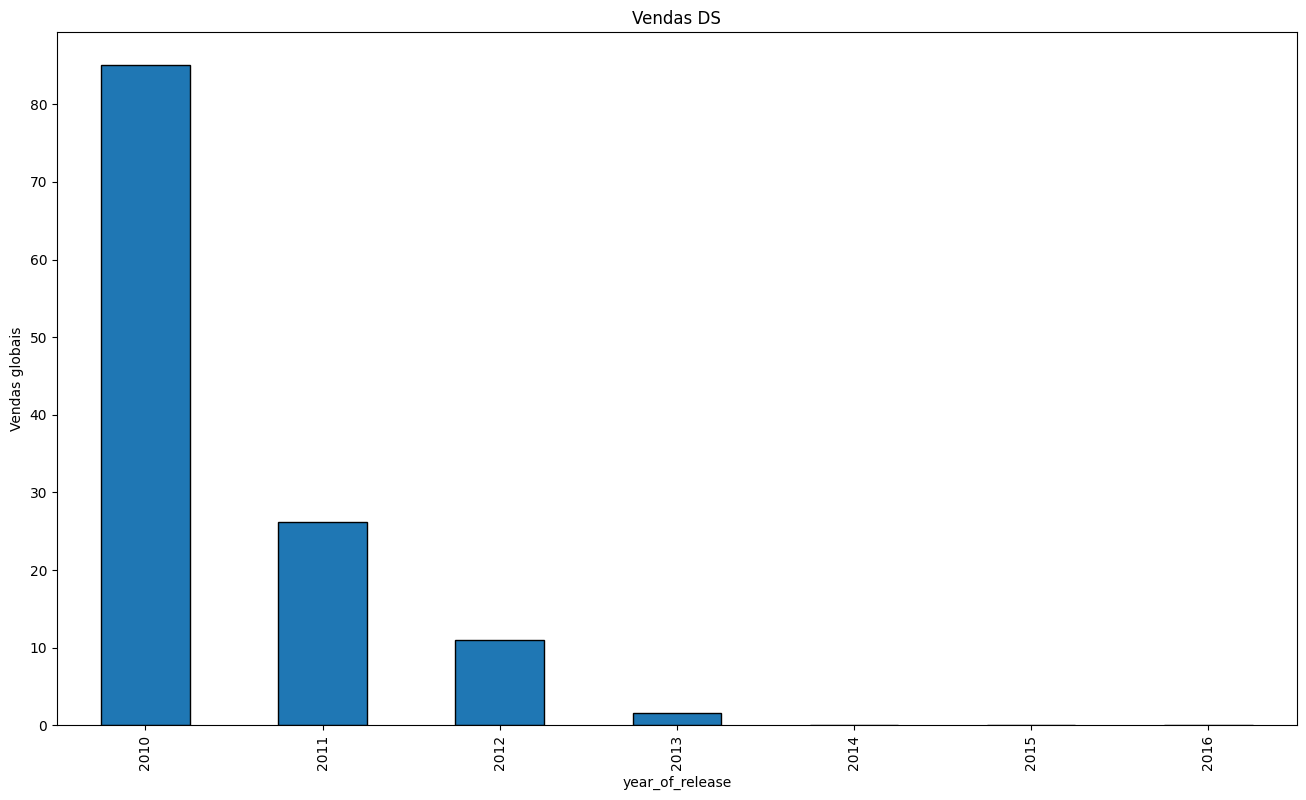

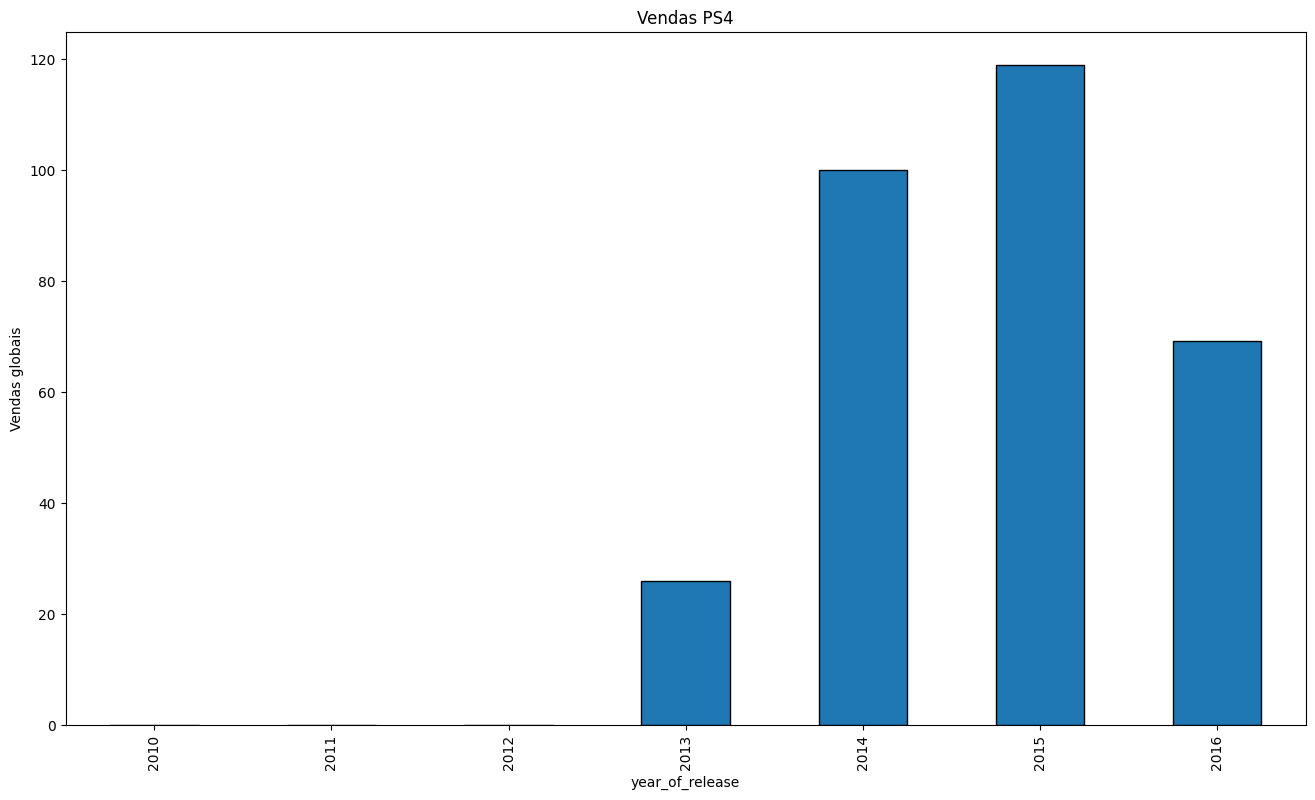

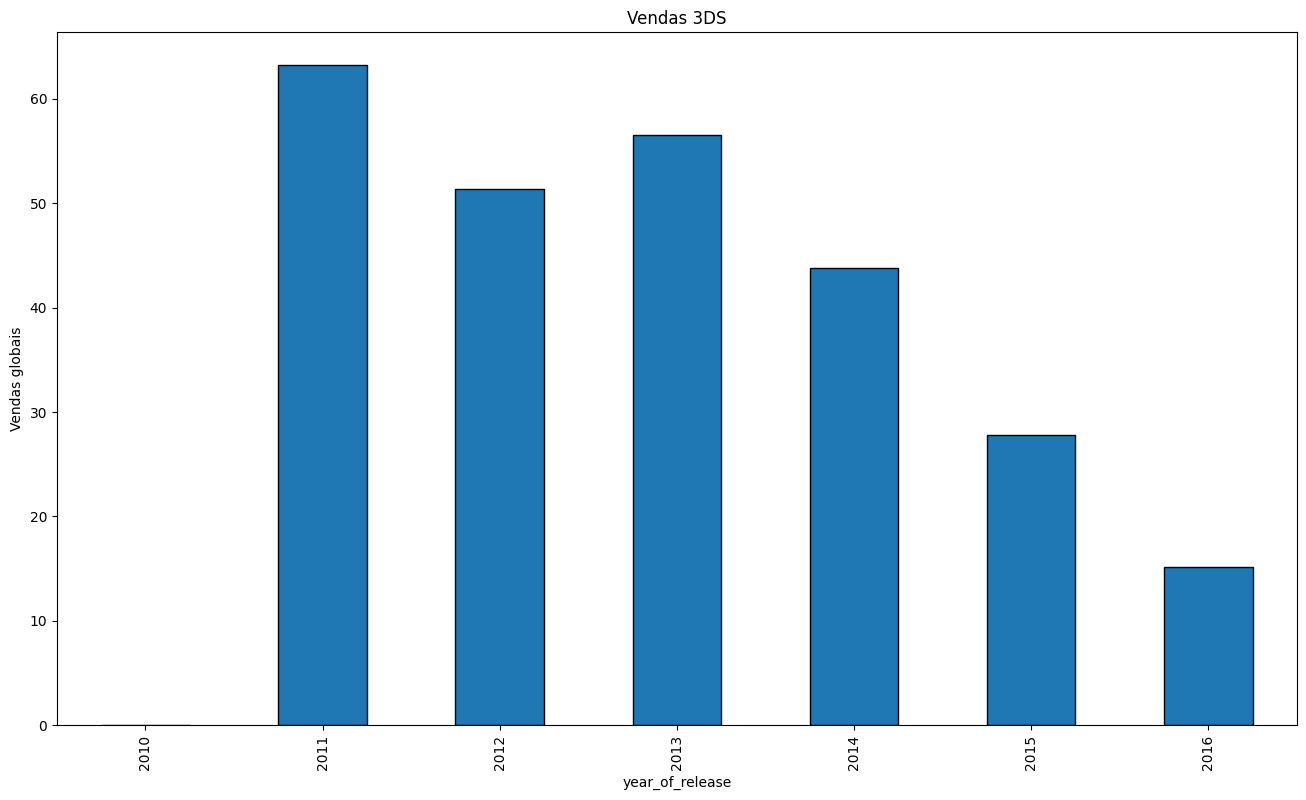

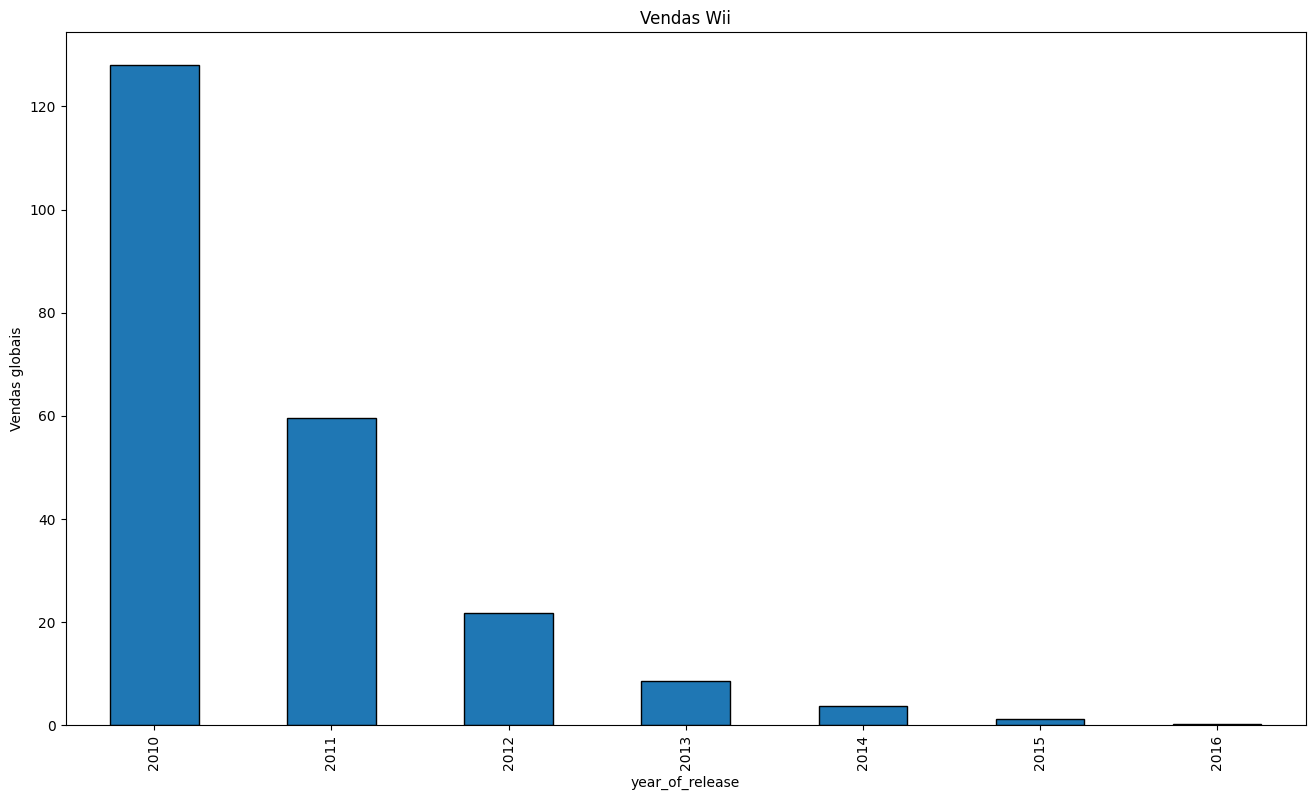

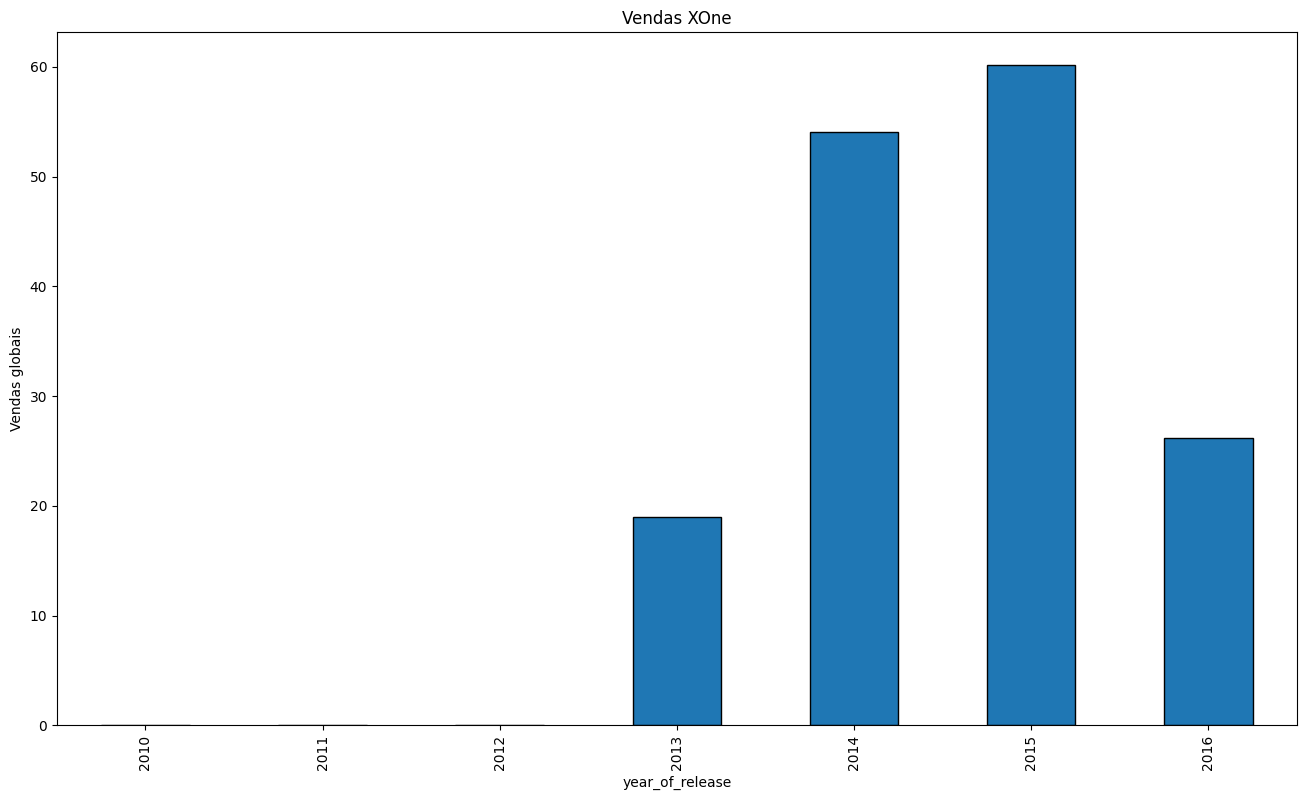

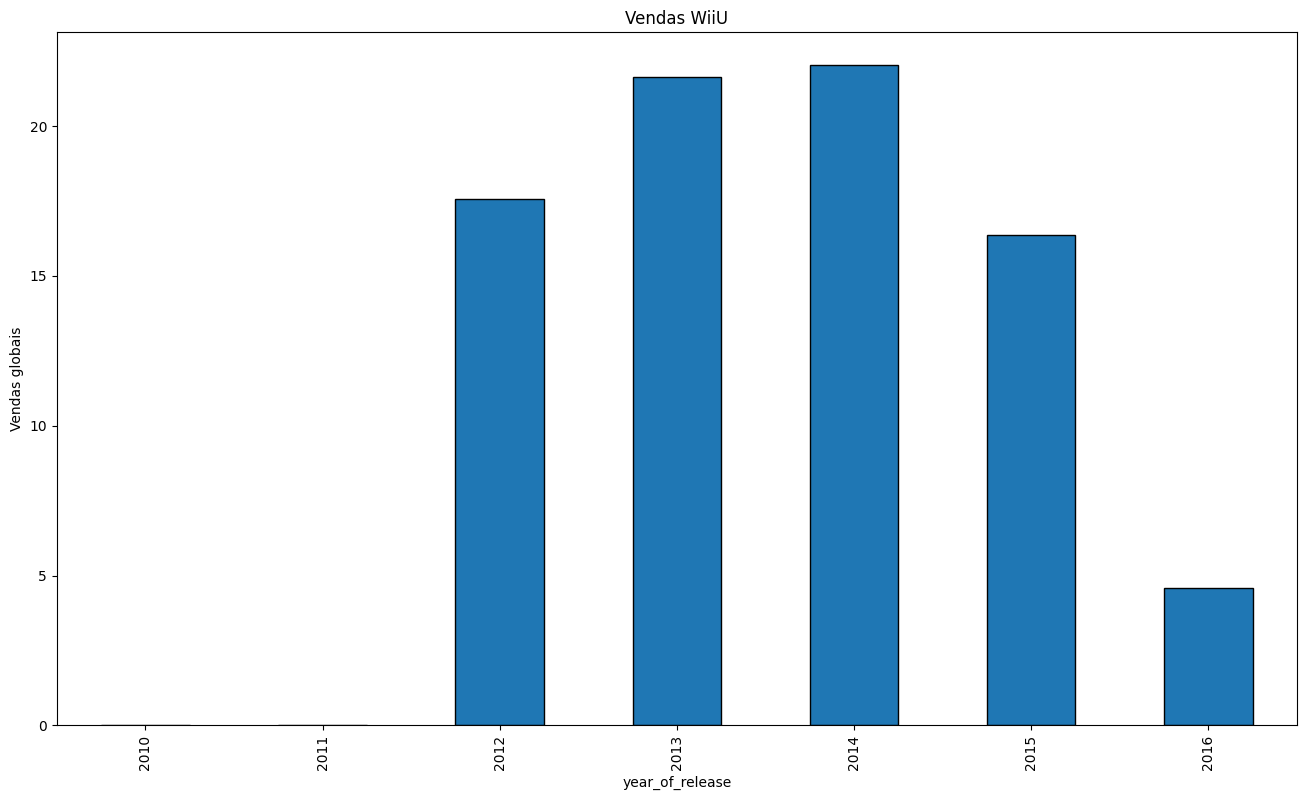

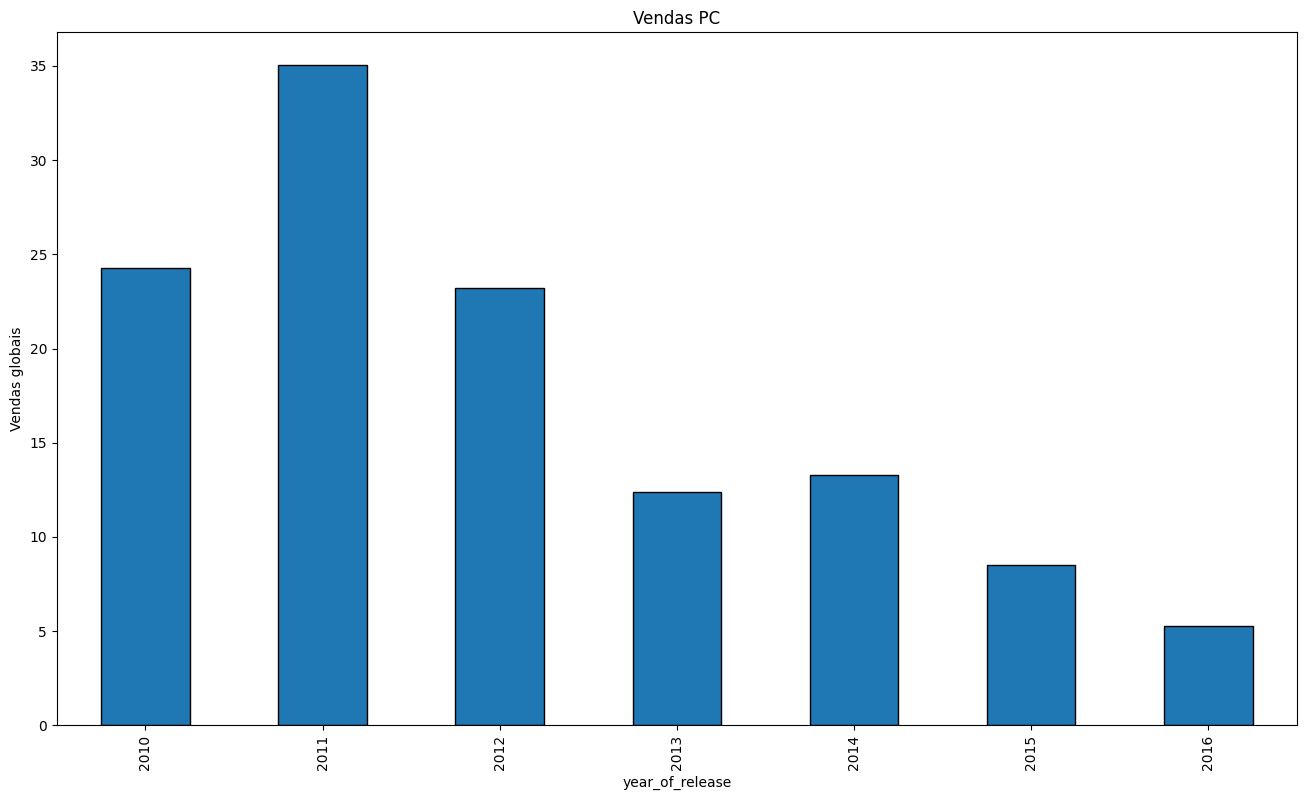

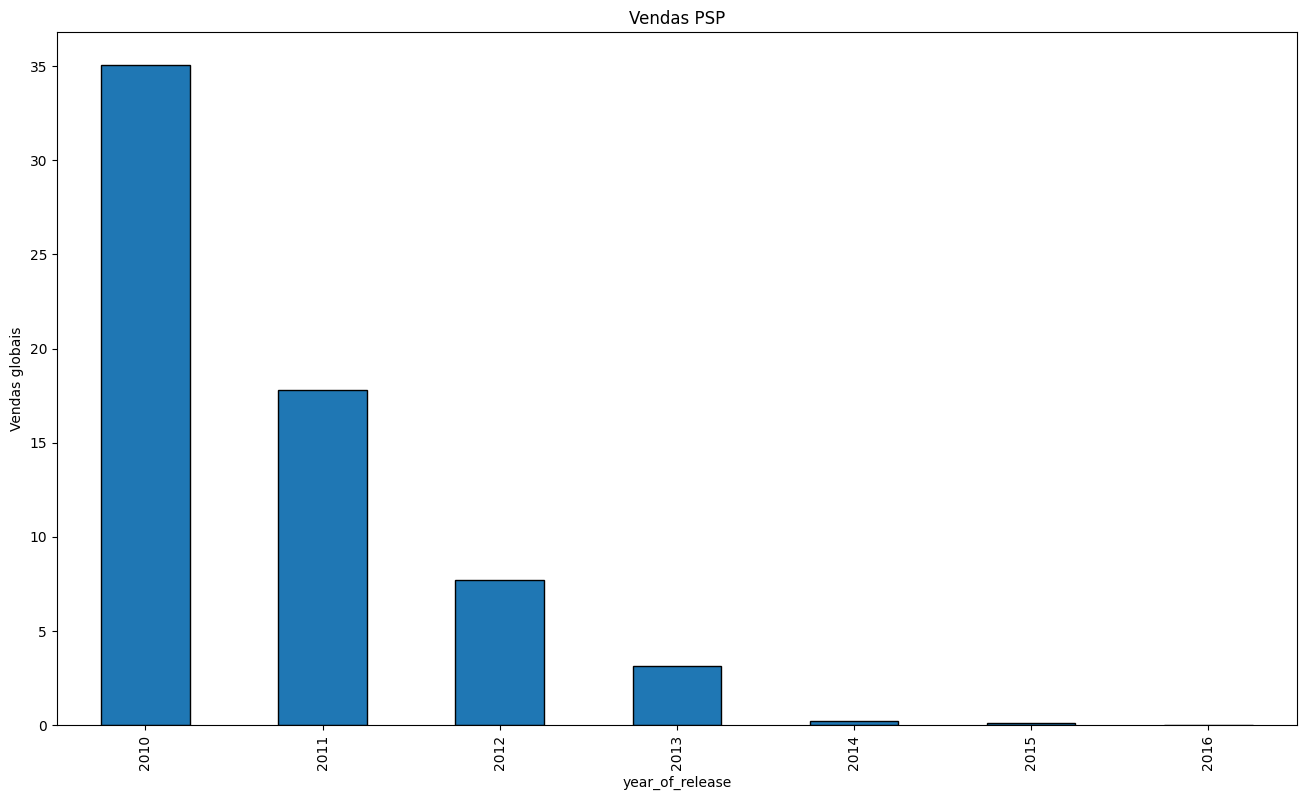

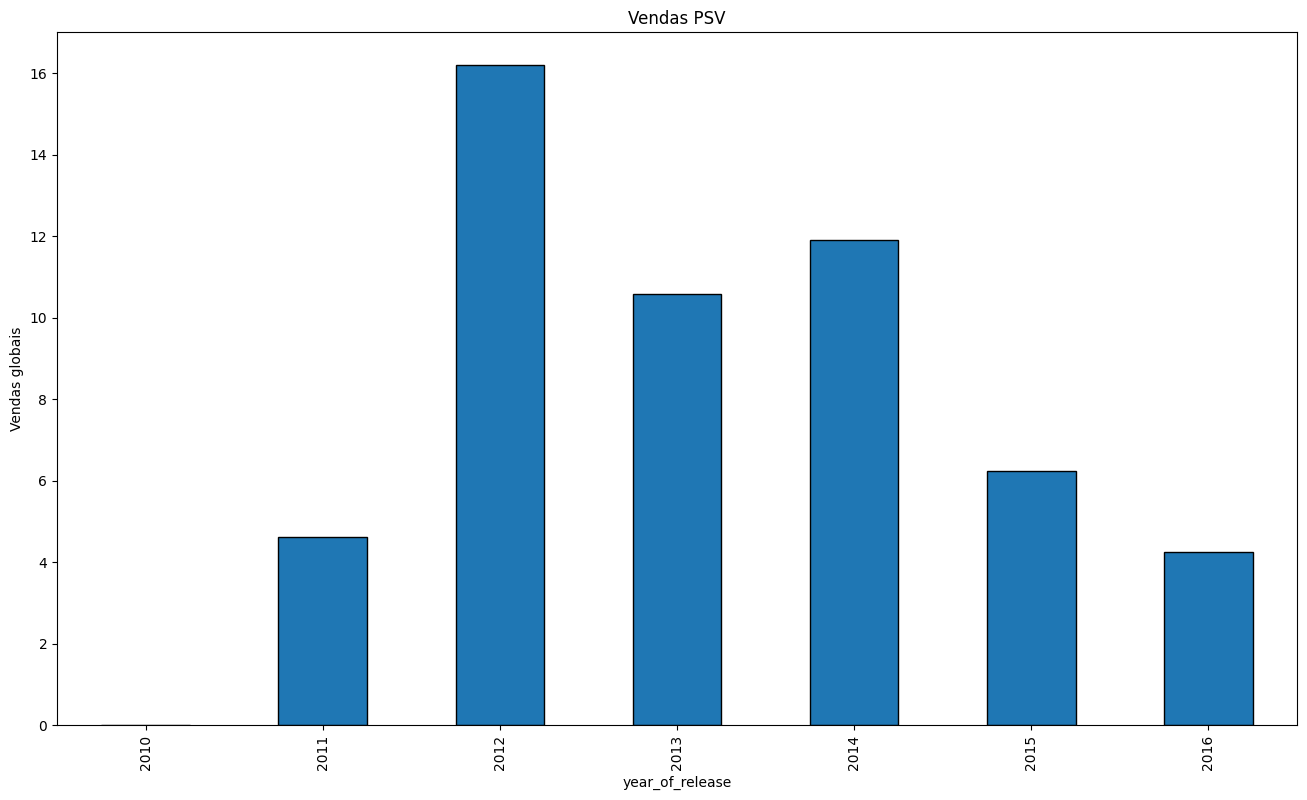

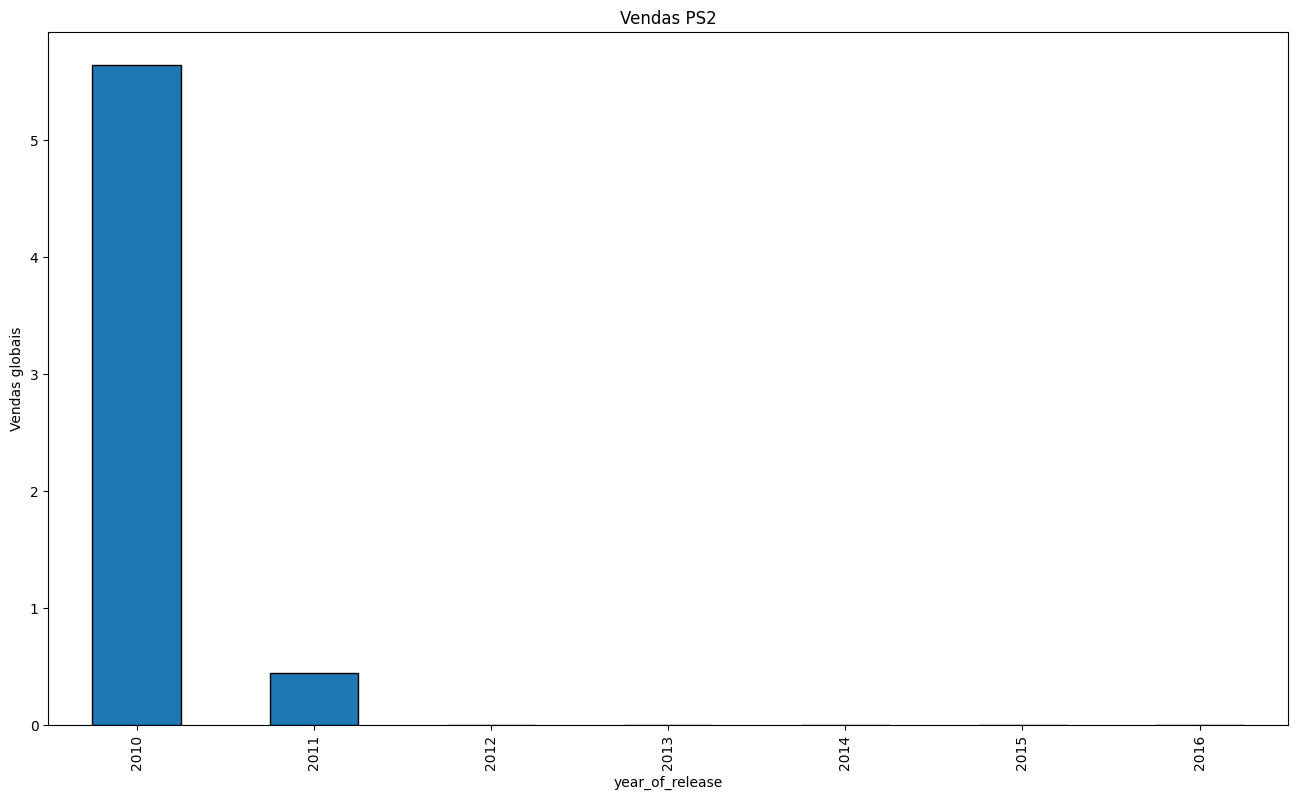

In [20]:
# Quais estão crescendo ou diminuindo?

# filtrando jogos lançados após 2010
top_growth = df_games[df_games["year_of_release"] >= 2010]

# criando uma pivot para facilitar os gráficos
pivot_growth = top_growth.pivot_table(
    index="year_of_release",
    columns="platform",
    values="total_sales",
    aggfunc="sum"
)
pivot_growth.head(12)

# criando gráficos para analisar cada plataforma
top_platforms = top_growth["platform"].unique()

print(top_platforms)

for platform in top_platforms:
    pivot_growth[platform].plot(
        kind="bar",
        edgecolor="black",
        title=f"Vendas {platform}",
        figsize=[16,9],
        ylabel="Vendas globais"  
    )
    plt.show()

Conclusions:
- The 12 platforms with the highest sales since 2010 are listed above: ['X360', 'PS3', 'DS', 'PS4', '3DS', 'Wii', 'XOne', 'WiiU', 'PC', 'PSP', 'PSV', 'PS2'].
- Only the XOne and PS4 showed growth from 2010 to 2016, but both had fewer sales in 2016 than in 2015.
- All other platforms are in a clear sales decline, with DS, Wii, PSP, and PS2 having sales of zero or close to zero in 2016.
- We consider potentially profitable platforms to be those with global sales above 10 (million USD) in 2016. These are:
  - PS4
  - 3DS
  - XOne
- The PC could also be considered a potentially profitable platform, as despite declining sales from 2010 to 2016, it is the only platform with sales above 5 (million USD) throughout the entire period from 2010 to 2016.

Selecione várias plataformas potencialmente lucrativas.

Consideramos plataformas potencialmente lucrativas aquelas com vendas globais acima de 10 em 2016. São elas:
PS4, 3DS e XOne. 

PC poderia também ser considerada uma plataforma potencialmente lucrativa, pois apesar das vendas decrescentes de 2010 a 2016, é a única plataforma com vendas acima de 5 em todo o período 2010-2016.

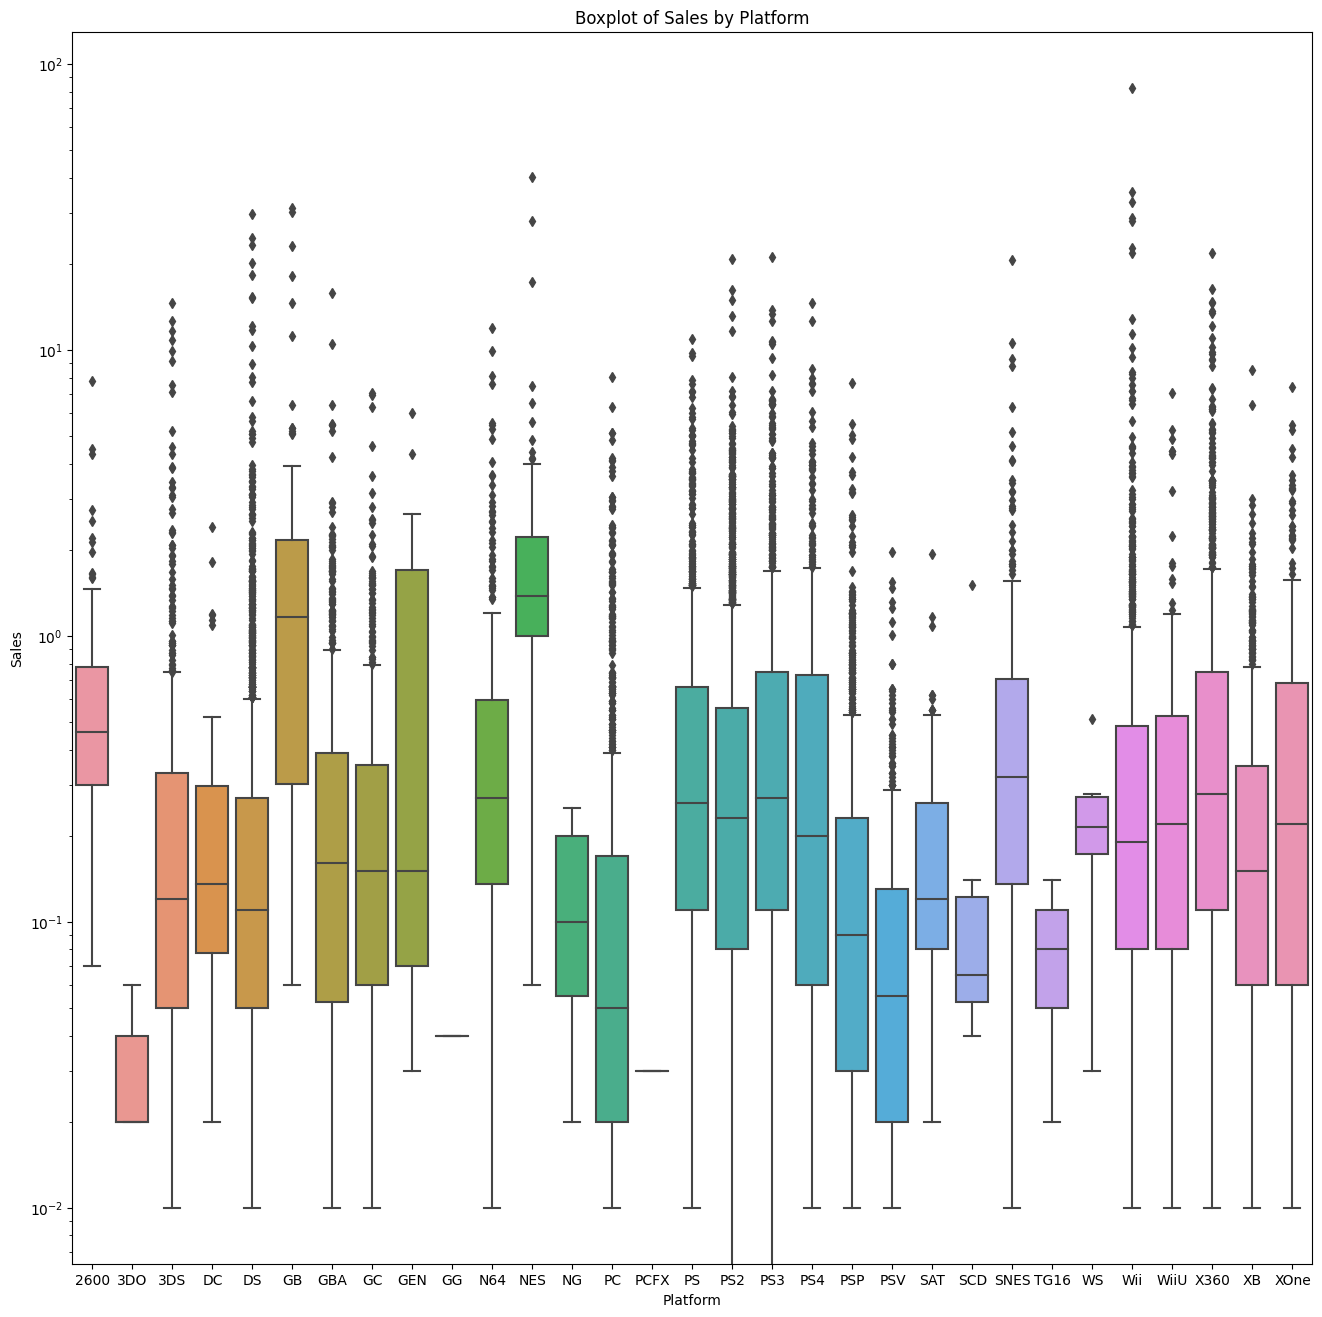

In [21]:
# Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma.

boxplot_data = df_games.groupby(["platform","name"])["total_sales"].sum()

boxplot_data_df = boxplot_data.reset_index(inplace=False)

# usei escala log scale caso contrário fica ilegível. Sugestões para uma abordagem melhor?
plt.figure(figsize=(16,16))
sns.boxplot(x="platform", y="total_sales", data=boxplot_data_df)
plt.title("Boxplot of Sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Sales")
plt.yscale("log")
plt.rot=45
plt.show()

In [22]:
# Analizando as diferenças nas vendas por plataforma 

# tive que ficar "caçando" as informações nas tabelas abaixo, alguma sugestão para uma abordagem melhor?
boxplot_data_df.groupby("platform")["total_sales"].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,133.0,0.729173,0.917799,0.07,0.3000,0.460,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,520.0,0.498077,1.430876,0.01,0.0500,0.120,0.3300,14.60
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
DS,2151.0,0.374765,1.426451,0.01,0.0500,0.110,0.2700,29.80
GB,98.0,2.606735,5.365478,0.06,0.3025,1.165,2.1650,31.38
GBA,822.0,0.386679,0.896897,0.01,0.0525,0.160,0.3900,15.84
GC,556.0,0.357788,0.686346,0.01,0.0600,0.150,0.3525,7.06
GEN,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02


In [23]:
boxplot_data_df.groupby("platform")["total_sales"].describe().sort_values(by="max",ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
Wii,1320.0,0.687508,3.126609,0.01,0.0800,0.190,0.4825,82.54
NES,98.0,2.561735,5.108012,0.06,1.0000,1.375,2.2225,40.24
GB,98.0,2.606735,5.365478,0.06,0.3025,1.165,2.1650,31.38
DS,2151.0,0.374765,1.426451,0.01,0.0500,0.110,0.2700,29.80
X360,1261.0,0.770357,1.617127,0.01,0.1100,0.280,0.7500,21.82
PS3,1329.0,0.707035,1.392845,0.00,0.1100,0.270,0.7500,21.05
PS2,2161.0,0.581106,1.137927,0.00,0.0800,0.230,0.5600,20.81
SNES,239.0,0.836987,1.869469,0.01,0.1350,0.320,0.7050,20.62
GBA,822.0,0.386679,0.896897,0.01,0.0525,0.160,0.3900,15.84


In [24]:
boxplot_data_df.groupby("platform")["total_sales"].describe().sort_values(by="mean",ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
GB,98.0,2.606735,5.365478,0.06,0.3025,1.165,2.1650,31.38
NES,98.0,2.561735,5.108012,0.06,1.0000,1.375,2.2225,40.24
GEN,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02
SNES,239.0,0.836987,1.869469,0.01,0.1350,0.320,0.7050,20.62
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
X360,1261.0,0.770357,1.617127,0.01,0.1100,0.280,0.7500,21.82
2600,133.0,0.729173,0.917799,0.07,0.3000,0.460,0.7800,7.81
PS3,1329.0,0.707035,1.392845,0.00,0.1100,0.270,0.7500,21.05
Wii,1320.0,0.687508,3.126609,0.01,0.0800,0.190,0.4825,82.54


In [25]:
boxplot_data_df.groupby("platform")["total_sales"].describe().sort_values(by="max")

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PCFX,1.0,0.030000,NaN,0.03,0.0300,0.030,0.0300,0.03
GG,1.0,0.040000,NaN,0.04,0.0400,0.040,0.0400,0.04
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
TG16,2.0,0.080000,0.084853,0.02,0.0500,0.080,0.1100,0.14
NG,12.0,0.120000,0.082241,0.02,0.0550,0.100,0.2000,0.25
WS,6.0,0.236667,0.159457,0.03,0.1725,0.215,0.2725,0.51
SCD,6.0,0.310000,0.584055,0.04,0.0525,0.065,0.1225,1.50
SAT,173.0,0.194162,0.218092,0.02,0.0800,0.120,0.2600,1.93
PSV,430.0,0.125744,0.212193,0.01,0.0200,0.055,0.1300,1.96


Conclusions:
- The differences in sales are significant in terms of total sales, median sales, and average sales.

- The platforms Wii, NES, GB, DS, X360, PS3, and PS2 have the highest sales numbers (83, 40, 31, 30, 22, 21, and 21 million USD, respectively).

- Some platforms have very low total sales, including PCFX (0.03 million USD), GG (0.04 million USD), 3DO (0.06 million USD), TG16 (0.14 million USD), and NG (0.25 million USD).

In [26]:
boxplot_data_df.groupby("platform")["total_sales"].describe().sort_values(by="std")

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
NG,12.0,0.120000,0.082241,0.02,0.0550,0.100,0.2000,0.25
TG16,2.0,0.080000,0.084853,0.02,0.0500,0.080,0.1100,0.14
WS,6.0,0.236667,0.159457,0.03,0.1725,0.215,0.2725,0.51
PSV,430.0,0.125744,0.212193,0.01,0.0200,0.055,0.1300,1.96
SAT,173.0,0.194162,0.218092,0.02,0.0800,0.120,0.2600,1.93
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
PSP,1209.0,0.243218,0.520210,0.01,0.0300,0.090,0.2300,7.68
XB,824.0,0.312791,0.534791,0.01,0.0600,0.150,0.3500,8.48


Regarding average sales across various platforms, the findings are as follows:

- Highest Averages: The platforms GB and NES have the highest average sales (2.6 and 2.56 million USD, respectively), followed by GEN (1.09) and SNES (0.83).
- Lowest Averages: The platforms with the lowest average sales are PCFX (0.03), 3DO (0.033), GG (0.04), and TG16 (0.08).
- Highest Standard Deviations: The platforms with the highest standard deviations in sales are GB (5.36), NES (5.11), and Wii (3.12), indicating greater variability in their sales figures.
- Lowest Standard Deviations: The platforms with the lowest standard deviations are 3DO (0.02), NG (0.08), TG16 (0.08), and WS (0.16), suggesting that their sales are more consistent but generally lower.

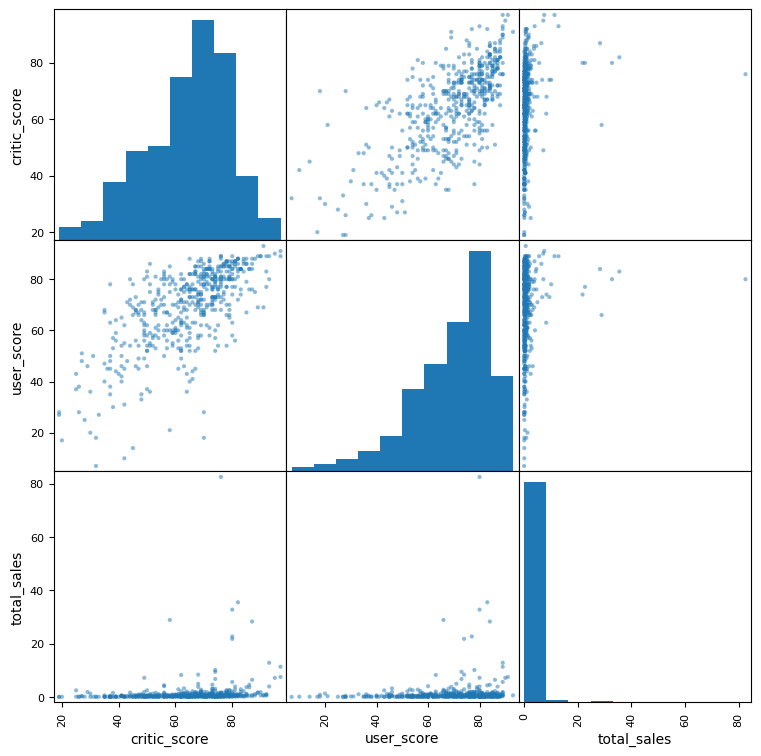

              critic_score  user_score  total_sales
critic_score      1.000000    0.681846     0.169668
user_score        0.681846    1.000000     0.110151
total_sales       0.169668    0.110151     1.000000


In [27]:
# Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). 
# Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.

# Analisando a plataforma Wii
correl = df_games[(df_games["platform"] == "Wii") & (df_games["critic_score"] > 0) & (df_games["user_score"] >0)].groupby("name")["critic_score","user_score","total_sales"].sum()
pd.plotting.scatter_matrix(correl, figsize=(9, 9))
plt.show()
print(correl.corr())


Conclusions:
- For the Wii platform, there is a moderate correlation between critic_score and user_score (0.68).

- For the Wii, there is a very weak correlation between sales and user_score (0.11) or critic_score (0.17).

In [28]:
# Analisando a plataforma NES
correl2 = df_games[(df_games["platform"] == "NES") & (df_games["critic_score"] > 0) & (df_games["user_score"] >0)].groupby("name")["critic_score","user_score","total_sales"].sum()
print(correl2)


Empty DataFrame
Columns: [critic_score, user_score, total_sales]
Index: []


Conclusion: We found no record of games for the NES platform with user_score e critic_score > 0

In [29]:
# Analisando a plataforma GB
correl3 = df_games[(df_games["platform"] == "GB") & (df_games["critic_score"] > 0) & (df_games["user_score"] >0)].groupby("name")["critic_score","user_score","total_sales"].sum()
print(correl3)

Empty DataFrame
Columns: [critic_score, user_score, total_sales]
Index: []


Conclusion: We found no record of games for the GB platform with user_score e critic_score > 0

                                              critic_score  user_score  \
name                                                                     
1 vs. 100                                             38.0        32.0   
100 Classic Books                                     70.0        60.0   
7 Wonders of the Ancient World                        60.0        83.0   
A Witch's Tale                                        50.0        62.0   
Ace Attorney Investigations: Miles Edgeworth          78.0        84.0   
...                                                    ...         ...   
Zoo Keeper                                            74.0        75.0   
Zoo Tycoon 2 DS                                       60.0        54.0   
Zoo Tycoon DS                                         44.0        66.0   
Zubo                                                  75.0        76.0   
de Blob 2                                             75.0        82.0   

                                     

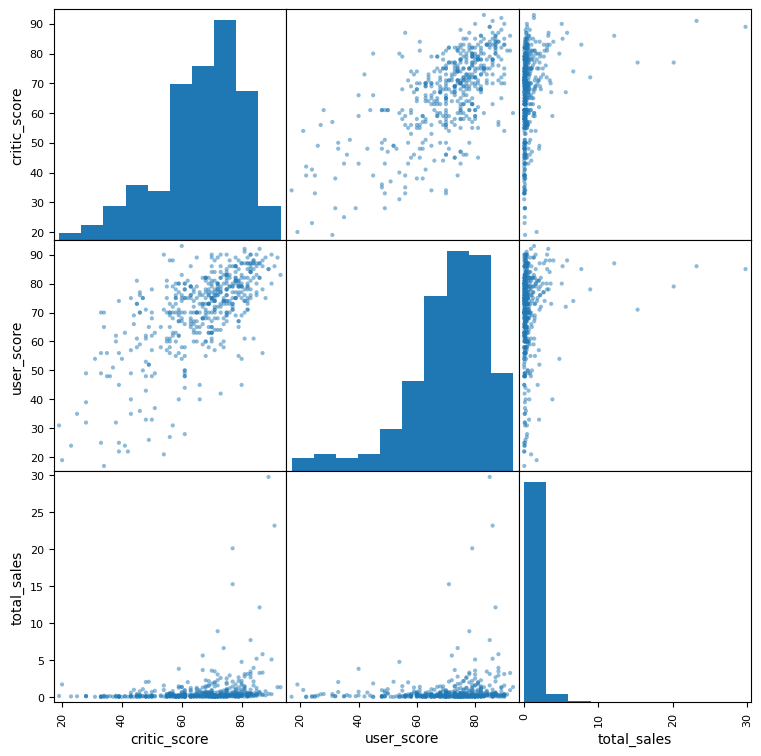

              critic_score  user_score  total_sales
critic_score      1.000000    0.655516     0.230941
user_score        0.655516    1.000000     0.139453
total_sales       0.230941    0.139453     1.000000


In [30]:
# Analisando a plataforma DS
correl4 = df_games[(df_games["platform"] == "DS") & (df_games["critic_score"] > 0) & (df_games["user_score"] >0)].groupby("name")["critic_score","user_score","total_sales"].sum()
print(correl4)
pd.plotting.scatter_matrix(correl4, figsize=(9, 9))
plt.show()
print(correl4.corr())

Conclusions:
- For the DS platform, there is a moderate correlation between critic_score and user_score (0.65).
- For the DS, there is a very weak correlation between sales and user_score (0.14) or critic_score (0.23).

                                  critic_score  user_score  total_sales
name                                                                   
007: Quantum of Solace                    65.0        71.0         1.48
2010 FIFA World Cup South Africa          83.0        81.0         0.85
2014 FIFA World Cup Brazil                74.0        44.0         0.43
50 Cent: Blood on the Sand                71.0        64.0         0.21
AC/DC LIVE: Rock Band Track Pack          63.0        49.0         0.23
...                                        ...         ...          ...
[Prototype]                               78.0        78.0         1.31
de Blob 2                                 77.0        75.0         0.15
nail'd                                    64.0        71.0         0.11
pro evolution soccer 2011                 79.0        59.0         0.60
uDraw Studio: Instant Artist              54.0        57.0         0.02

[880 rows x 3 columns]


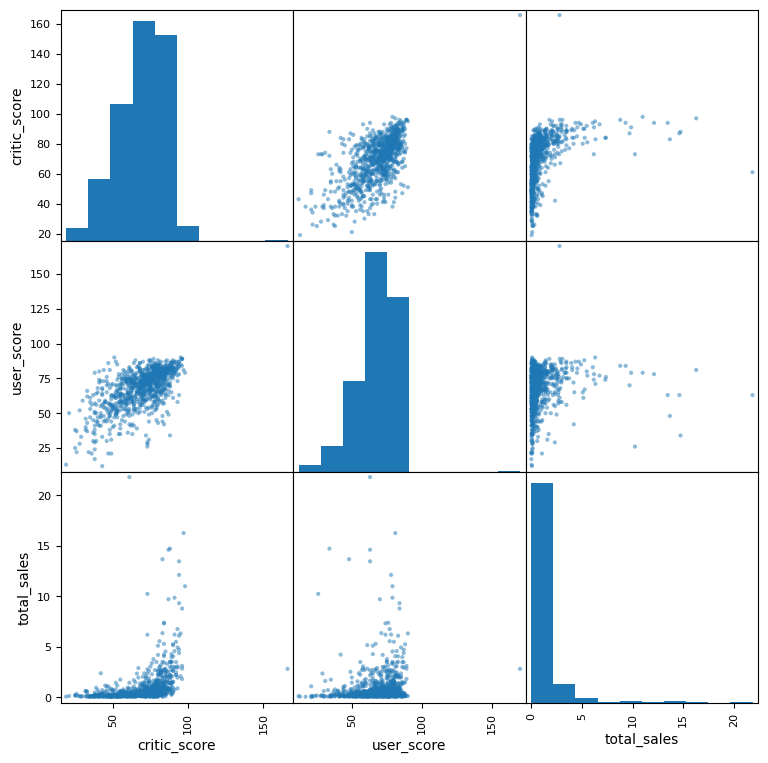

              critic_score  user_score  total_sales
critic_score      1.000000    0.636691     0.387433
user_score        0.636691    1.000000     0.114730
total_sales       0.387433    0.114730     1.000000


In [31]:
# Analisando a plataforma X360
correl5 = df_games[(df_games["platform"] == "X360") & (df_games["critic_score"] > 0) & (df_games["user_score"] >0)].groupby("name")["critic_score","user_score","total_sales"].sum()
print(correl5)
pd.plotting.scatter_matrix(correl5, figsize=(9, 9))
plt.show()
print(correl5.corr())

Conclusions:
- For the X360 platform, there is a moderate correlation between critic_score and user_score (0.64).
- For the X360, there is a very weak correlation between sales and user_score (0.11) and a weak correlation between sales and critic_score (0.39).

                                  critic_score  user_score  total_sales
name                                                                   
 Tales of Xillia 2                        71.0        79.0         0.84
007: Quantum of Solace                    65.0        66.0         1.15
2010 FIFA World Cup South Africa          82.0        78.0         1.23
2014 FIFA World Cup Brazil                73.0        43.0         0.61
3D Dot Game Heroes                        77.0        80.0         0.57
...                                        ...         ...          ...
de Blob 2                                 74.0        71.0         0.21
inFAMOUS                                  85.0        83.0         2.93
inFAMOUS 2                                83.0        84.0         1.82
nail'd                                    66.0        62.0         0.12
pro evolution soccer 2011                 77.0        68.0         2.41

[788 rows x 3 columns]


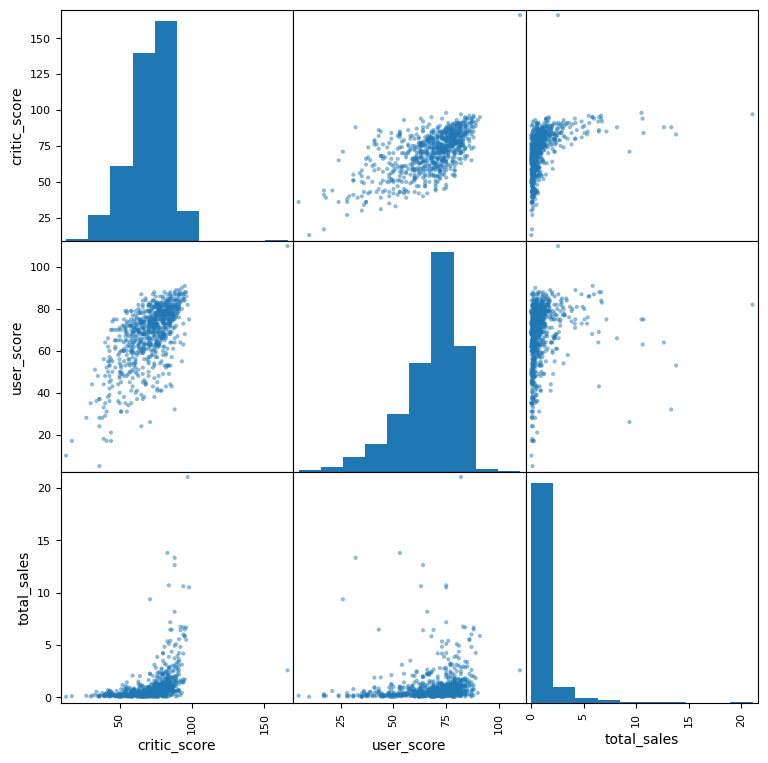

              critic_score  user_score  total_sales
critic_score      1.000000    0.633233     0.425479
user_score        0.633233    1.000000     0.147122
total_sales       0.425479    0.147122     1.000000


In [32]:
# Analisando a plataforma PS3
correl6 = df_games[(df_games["platform"] == "PS3") & (df_games["critic_score"] > 0) & (df_games["user_score"] >0)].groupby("name")["critic_score","user_score","total_sales"].sum()
print(correl6)
pd.plotting.scatter_matrix(correl6, figsize=(9, 9))
plt.show()
print(correl6.corr())

Conclusions:
- For the PS3 platform, there is a moderate correlation between critic_score and user_score (0.63).
- For the PS3, there is a very weak correlation between sales and user_score (0.15) and a weak correlation between sales and critic_score (0.42).

                                    critic_score  user_score  total_sales
name                                                                     
.hack//Infection Part 1                     75.0        85.0         1.26
.hack//Mutation Part 2                      76.0        89.0         0.67
.hack//Outbreak Part 3                      70.0        87.0         0.46
18 Wheeler: American Pro Trucker            61.0        57.0         0.40
187: Ride or Die                            52.0        68.0         0.15
...                                          ...         ...          ...
Yu Yu Hakusho: Dark Tournament              56.0        85.0         0.21
Zathura                                     43.0        20.0         0.13
Zone of the Enders                          78.0        74.0         0.75
Zone of the Enders: The 2nd Runner          82.0        89.0         0.42
eJay Clubworld                              69.0        86.0         0.15

[1161 rows x 3 columns]


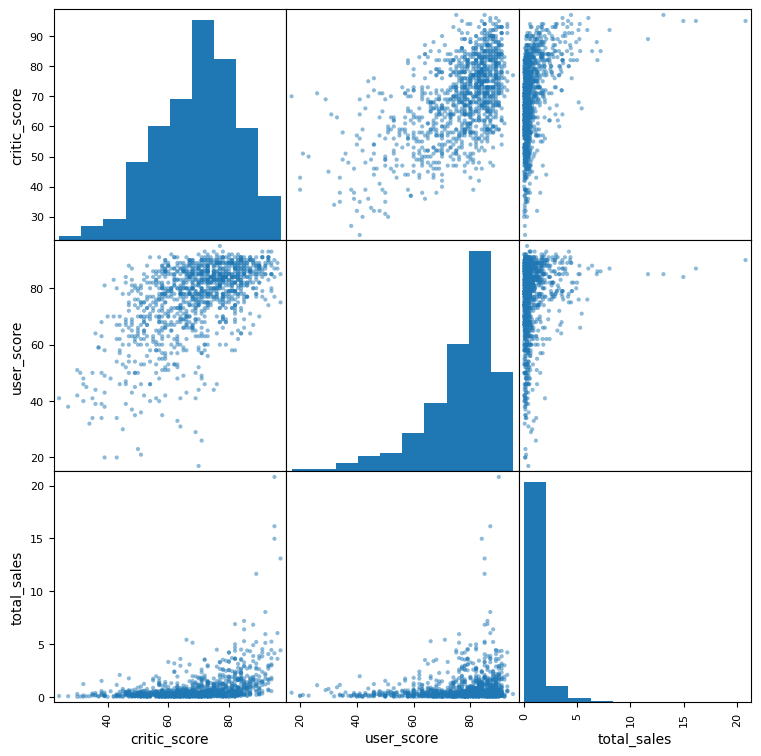

              critic_score  user_score  total_sales
critic_score      1.000000    0.563254      0.38922
user_score        0.563254    1.000000      0.16942
total_sales       0.389220    0.169420      1.00000


In [33]:
# Analisando a plataforma PS2
correl7 = df_games[(df_games["platform"] == "PS2") & (df_games["critic_score"] > 0) & (df_games["user_score"] >0)].groupby("name")["critic_score","user_score","total_sales"].sum()
print(correl7)
pd.plotting.scatter_matrix(correl7, figsize=(9, 9))
plt.show()
print(correl7.corr())

Conclusions:
- For the PS2 platform, there is a moderate correlation between critic_score and user_score (0.56).
- For the PS2, there is a very weak correlation between sales and user_score (0.17) and a weak correlation between sales and critic_score (0.39).

Conclusion:

In general, we observe a weak correlation between total sales and either user_score or critic_score. The platform where this correlation is strongest between sales and critic_score is the PS3 (0.42), followed by the X360 (0.39).

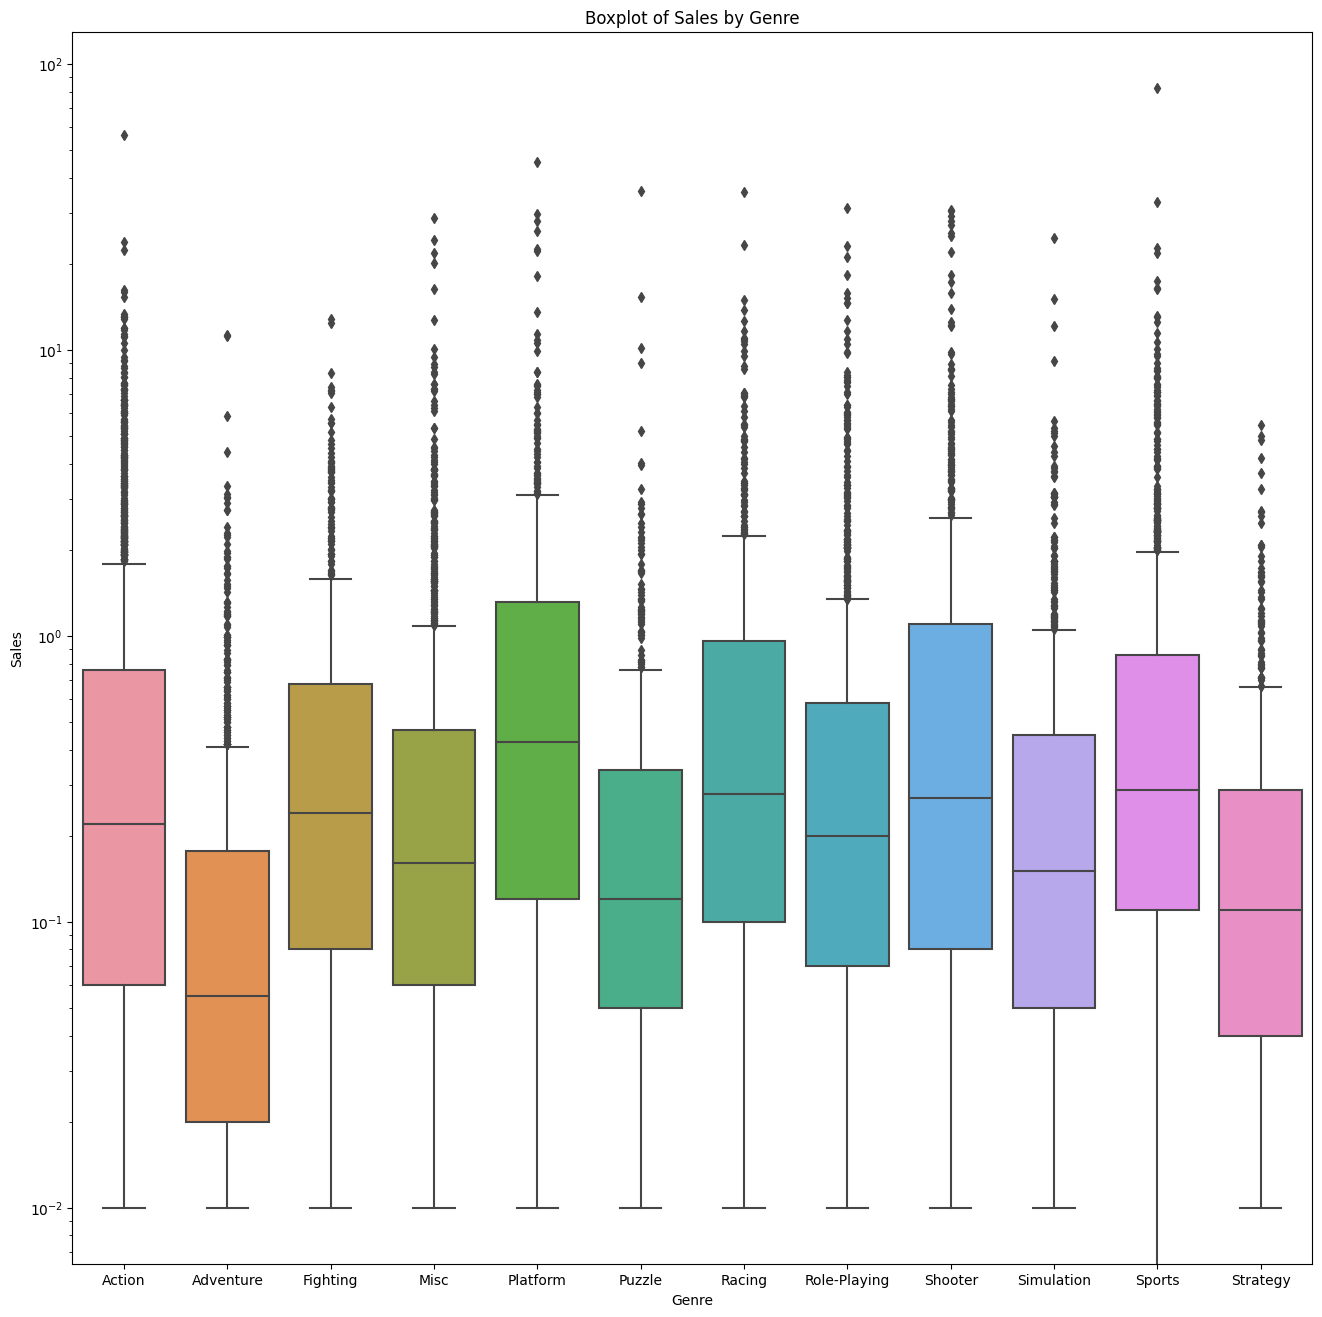

In [34]:
# Dê uma olhada na distribuição geral de jogos por gênero. 

boxplot_data2 = df_games.groupby(["genre","name"])["total_sales"].sum()
boxplot_data_df2 = boxplot_data2.reset_index(inplace=False)

# usei escala log scale caso contrário fica ilegível. Sugestões para uma abordagem melhor?
plt.figure(figsize=(16,16))
sns.boxplot(x="genre", y="total_sales", data=boxplot_data_df2)
plt.title("Boxplot of Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Sales")
plt.yscale("log")
plt.rot=45
plt.show()

#Você pode generalizar sobre gêneros com vendas altas e baixas?

In [35]:
# O que podemos dizer sobre os gêneros mais lucrativos? 

# analisando vendas totais médias por jogo por gênero
genre_data = boxplot_data_df2.groupby("genre")["total_sales"].describe().sort_values(by="max",ascending=False) # por algum motivo esse código não gera saída, mas se retirar o "genre_data =", aí ele gera
genre_data["sales_per_game"] = genre_data["max"] / genre_data["count"]
display(genre_data.sort_values(by="sales_per_game", ascending=False))

,count,mean,std,min,25%,50%,75%,max,sales_per_game
genre,,,,,,,,,
Platform,588.0,1.407772,3.462523,0.01,0.12,0.425,1.3125,45.31,0.077058
Puzzle,498.0,0.487088,1.919150,0.01,0.05,0.120,0.3400,35.84,0.071968
Sports,1379.0,0.965388,3.005322,0.00,0.11,0.290,0.8600,82.54,0.059855
Racing,772.0,0.943873,2.253458,0.01,0.10,0.280,0.9625,35.52,0.046010
Shooter,825.0,1.275697,3.261247,0.01,0.08,0.270,1.1000,30.82,0.037358
Simulation,729.0,0.534938,1.417779,0.01,0.05,0.150,0.4500,24.67,0.033841
Action,1957.0,0.891247,2.256127,0.01,0.06,0.220,0.7600,56.58,0.028912
Role-Playing,1226.0,0.762284,2.063627,0.01,0.07,0.200,0.5800,31.38,0.025595
Misc,1330.0,0.603391,1.759455,0.01,0.06,0.160,0.4700,28.91,0.021737


Conclusions:
- The genres that generate the most sales are Sports (83 million USD), Action (57 million USD), Platform (45 million USD), and Puzzle (36 million USD).
- Sports and Action are the genres with the highest number of game releases.
- Platform has the highest average sales per game (1.41 million USD) but also has the highest standard deviation (3.46 million USD).
- The genres Platform, Puzzle, and Sports have the highest sales volume per game released.
- We cannot conclude that genres with more games necessarily generate more sales. Thus, generalizations should be avoided.

Step 4 - Create a User Profile for Each Region

- For each region (NA, EU, JP), determine:
  - Top Five Platforms: Identify the five platforms with the highest sales. Describe the variations in their market shares from region to region.
  - Top Five Genres: Identify the five genres with the most sales. Explain any differences in preferences across regions.
  - Impact of ESRB Ratings on Sales: Analyze whether ESRB ratings (age classifications) affect sales in each individual region.

In [36]:
# 5 top plataformas para região NA

top_plat_na = df_games[df_games["na_sales"] > 0].groupby("platform")["na_sales"].sum().sort_values(ascending=False)
top_plat_na_df = top_plat_na.reset_index(inplace=False)
top_plat_na_df["mkt_share"] = top_plat_na_df["na_sales"]/top_plat_na_df["na_sales"].sum()
top_plat_na_df.head(5)

,platform,na_sales,mkt_share
0,X360,602.47,0.136852
1,PS2,583.84,0.132620
2,Wii,496.90,0.112872
3,PS3,393.49,0.089382
4,DS,382.40,0.086863


In [37]:
# 5 top plataformas para região EU

top_plat_eu = df_games[df_games["eu_sales"] > 0].groupby("platform")["eu_sales"].sum().sort_values(ascending=False)
top_plat_eu_df = top_plat_eu.reset_index(inplace=False)
top_plat_eu_df["mkt_share"] = top_plat_eu_df["eu_sales"]/top_plat_eu_df["eu_sales"].sum()
top_plat_eu_df.head(5)

,platform,eu_sales,mkt_share
0,PS2,339.29,0.139932
1,PS3,330.29,0.136221
2,X360,270.76,0.111669
3,Wii,262.21,0.108143
4,PS,213.61,0.088099


In [38]:
# 5 top plataformas para região JP

top_plat_jp = df_games[df_games["jp_sales"] > 0].groupby("platform")["jp_sales"].sum().sort_values(ascending=False)
top_plat_jp_df = top_plat_jp.reset_index(inplace=False)
top_plat_jp_df["mkt_share"] = top_plat_jp_df["jp_sales"]/top_plat_jp_df["jp_sales"].sum()
top_plat_jp_df.head(5)

,platform,jp_sales,mkt_share
0,DS,175.57,0.135328
1,PS,139.82,0.107772
2,PS2,139.20,0.107294
3,SNES,116.55,0.089836
4,3DS,100.67,0.077595


Conclusions:
- The only platform that appears in the top 5 for each region is the PS2.
- The preferred platform for Americans is the X360, but it ranks third for Europeans and does not appear at all for the Japanese.
- The favorite platform for Europeans is the PS2, which ranks second for Americans and third for the Japanese.
- The top platform for the Japanese is the DS, which only appears as the 5th highest for Americans and is not in the top 5 for Europeans.
- Americans and Europeans share 4 platforms in their top 5: X360, PS2, PS3, and Wii.
- The market share of the top 5 platforms across the three regions is roughly similar, with the largest having around 13% of the share and the smallest around 8%.
- Sales of the top 5 platforms in the U.S. are nearly double those in Europe and almost four times higher than in Japan.

In [39]:
# 5 top generos para região NA

top_plat_na = df_games[df_games["na_sales"] > 0].groupby("genre")["na_sales"].sum().sort_values(ascending=False)
top_plat_na.head(5)

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

In [40]:
# 5 top generos para região EU

top_plat_eu = df_games[df_games["eu_sales"] > 0].groupby("genre")["eu_sales"].sum().sort_values(ascending=False)
top_plat_eu.head(5)

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

In [41]:
# 5 top generos para região JP

top_plat_jp = df_games[df_games["jp_sales"] > 0].groupby("genre")["jp_sales"].sum().sort_values(ascending=False)
top_plat_jp.head(5)

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

Conclusions:
- The Action genre ranks first in both the U.S. and Europe and second in Japan, indicating that it currently generates the most sales globally.
- The same trend applies to the Sports genre, which is in second place in the U.S. and Europe and third in Japan.
- Americans and Europeans seem to prefer the Shooter genre, as it ranks third in both markets.
- In Japan, the top-selling genre is Role-Playing.
- In Europe, Racing ranks fourth in sales.
- The Platform genre is popular in both the U.S. and Japan, holding the fourth spot in these markets.
- The Misc genre consistently appears in fifth place across all three regions.

In [42]:
# Analisando classificação ESRB NA

esrb_na = df_games[df_games["na_sales"] > 0].groupby("rating")["na_sales"].sum().sort_values(ascending=False)
esrb_na_df = esrb_na.reset_index(inplace=False)
esrb_na_df.head(10)

,rating,na_sales
0,E,1292.99
1,T,759.75
2,M,748.48
3,E10+,353.32
4,K-A,2.56
5,EC,1.53
6,AO,1.26


In [43]:
# Analisando classificação ESRB EU

esrb_eu = df_games[df_games["eu_sales"] > 0].groupby("rating")["eu_sales"].sum().sort_values(ascending=False)
esrb_eu_df = esrb_eu.reset_index(inplace=False)
esrb_eu_df.head(10)

,rating,eu_sales
0,E,710.25
1,M,483.97
2,T,427.03
3,E10+,188.52
4,AO,0.61
5,K-A,0.27
6,EC,0.11
7,RP,0.08


In [44]:
# Analisando classificação ESRB JP

esrb_jp = df_games[df_games["jp_sales"] > 0].groupby("rating")["jp_sales"].sum().sort_values(ascending=False)
esrb_jp_df = esrb_jp.reset_index(inplace=False)
esrb_jp_df.head(10)

,rating,jp_sales
0,E,198.11
1,T,151.40
2,M,64.24
3,E10+,40.20
4,K-A,1.46


Conclusions:
- The E (Everyone), T (Teen), and M (Mature) ratings are associated with the highest sales volumes, suggesting that games with these ratings tend to sell better regardless of the market.
- The ratings EC (Early Childhood), RP (Rating Pending), and K-A (Kids to Adults) are linked to the lowest sales, indicating that having no rating or having EC and K-A ratings tends to result in lower sales.
- The undefined rating ranks second in the U.S. and Europe and first in Japan, which could distort the analysis. To achieve more accurate results, it would be ideal to seek out this missing information and reprocess the final analysis.

Step 5. Test the Following Hypotheses

- User Ratings Hypothesis for Platforms:
  - Hypothesis to Test: The average user ratings for the platforms Xbox One and PC are the same.
  - Null Hypothesis (H0): The average user ratings for Xbox One and PC are equal.
  - Alternative Hypothesis (H1): The average user ratings for Xbox One and PC are different.

- User Ratings Hypothesis for Genres:
  - Hypothesis to Test: The average user ratings for the genres Action and Sports are different.
  - Null Hypothesis (H0): The average user ratings for Action and Sports genres are equal.
  - Alternative Hypothesis (H1): The average user ratings for Action and Sports genres are different.

- Set the Alpha Threshold:
  - Define the significance level (alpha) for testing the hypotheses (commonly 0.05).

- Explain the Process:
  - Formulation of Hypotheses: The null hypothesis (H0) assumes that there is no significant difference between the two groups being compared (either platforms or genres). The alternative hypothesis (H1) assumes that a significant difference does exist.
  
- Criteria for Testing:
  - Use a t-test for independent samples or a Mann-Whitney U test depending on the distribution and normality of the data. The choice depends on whether the data meets the assumptions of normality and homogeneity of variance.
  - If the p-value obtained from the test is less than the alpha level, reject the null hypothesis (H0) in favor of the alternative hypothesis (H1).
  - If the p-value is greater than alpha, fail to reject the null hypothesis, suggesting that there is not enough evidence to support a significant difference.

In [45]:
# testando a hipótese de que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

# H0 - as classificações médias de usuários para XBox One e PC são as mesmas
# H1 - as classificações médias de usuários para XBox One e PC são diferentes

sample1 = df_games[(df_games["platform"] == "XOne") & (df_games["user_score"] > 0)]["user_score"]
sample2 = df_games[(df_games["platform"] == "PC") & (df_games["user_score"] > 0)]["user_score"]

# avaliando a variancia das duas amostras para decidir equal_var True ou False

print("var sample 1:", np.var(sample1))
print("var sample 2:", np.var(sample2))


var sample 1: 189.65188383045526
var sample 2: 233.77471580367683


Conclusion: Variances of samples 1 and 2 are different, hence we use equal_var=False on the hypothesys test

In [46]:
# usando ttest_ind pois estamos comparando médias de duas populações
# usando equal_var=False pois as amostras tem variancias diferentes

sample1 = df_games[(df_games["platform"] == "XOne") & (df_games["user_score"] > 0)]["user_score"]
sample2 = df_games[(df_games["platform"] == "PC") & (df_games["user_score"] > 0)]["user_score"]

alpha = .05

results = st.ttest_ind(
    sample1,
    sample2,
    equal_var=False
)

print('valor-p:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject null hypothesys - therefore average user ratings for XBox One and PC are different")
else:
    print("Can't reject null hypothesys - therefore average user ratings for XBox One and PC are the same")


valor-p: 4.935072360183449e-06
Rejeitamos a hipótese nula - portanto as classificações médias de usuários para XBox One e PC são diferentes


In [47]:
# testando a hipótese de que as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

# H0 - As classificações médias de usuários para os gêneros Action e Sports são as mesmas
# H1 - As classificações médias de usuários para os gêneros Action e Sports são diferentes.

sample3 = df_games[(df_games["genre"] == "Action") & (df_games["user_score"] > 0)]["user_score"]
sample4 = df_games[(df_games["genre"] == "Sports") & (df_games["user_score"] > 0)]["user_score"]

# avaliando a variancia das duas amostras para decidir equal_var True ou False

print("var sample 3:", np.var(sample3))
print("var sample 4:", np.var(sample4))


var sample 3: 203.06366538266298
var sample 4: 259.41606711770174


Conclusion: Variances of samples 3 and 4 are different, hence we use equal_var=False on the hypothesys test

In [48]:
# usando ttest_ind pois estamos comparando médias de duas populações
# usando equal_var=False pois as amostras tem variancias diferentes

sample3 = df_games[(df_games["genre"] == "Action") & (df_games["user_score"] > 0)]["user_score"]
sample4 = df_games[(df_games["genre"] == "Sports") & (df_games["user_score"] > 0)]["user_score"]

alpha = .05

results2 = st.ttest_ind(
    sample3,
    sample4,
    equal_var=False
)

print('valor-p:', results2.pvalue)

if (results2.pvalue < alpha):
    print("Reject null hypothesys - therefore average user ratings for genres Action and Sports are different")
else:
    print("Can't reject null hypothesys - therefore average user ratings for genres Action and Sportsare the same")

valor-p: 0.1148381879149927
Não podemos rejeitar a hipótese nula - portanto as classificações médias de usuários para os gêneros Action e Sports são as mesmas


Step 6. General Conclusions

- The dataset required data type adjustments and handling of missing values before proceeding with the analysis.
- We observed a steep increase in the number of games released starting in the 1990s, rising from fewer than 200 releases per year to over 1,000 per year. The peak occurred in 2009 and 2010, with around 1,000 games released.
- After 2008, there was a decline in the total number of games released annually, and post-2010, the number of releases stabilized around 350-400 per year between 2013 and 2016.
- Interestingly, the PS2, an obsolete platform, generated the most sales in the historical series, indicating that the power of current platforms does not necessarily translate to higher sales. However, the PS2 had a 10-year lifecycle, which more recent platforms have not yet achieved.
- Six platforms have significantly higher sales than the others: PS2, X360, PS3, Wii, DS, and PS.
- The most relevant platforms generally have high sales for a period of 5 to 7 years before disappearing from the market.
- In general, a new platform takes between 5 and 8 years to be launched. However, some exceptions were identified, and some platforms cannot be considered a logical succession of the previous one. This analysis was performed by grouping platforms by manufacturer (e.g., Sony, Nintendo) and type (console, handheld).
- Although there is less data for this second conclusion, we can estimate that a platform takes an average of 3 to 9 years to disappear after its peak of releases.
- The 12 platforms with the highest sales since 2010 are: X360, PS3, DS, PS4, 3DS, Wii, XOne, WiiU, PC, PSP, PSV, PS2.
- Only XOne and PS4 showed growth from 2010 to 2016.
- Platforms considered potentially profitable, with global sales above 10 (million USD) in 2016, are PS4, 3DS, and XOne.
- PC could also be considered potentially profitable, as despite declining sales from 2010 to 2016, it remained the only platform with sales consistently above 5 (million USD) during the period.
- In general, we observe a weak correlation between total sales and user_score or critic_score. The platform where this correlation is strongest between sales and critic_score is PS3 (0.42), followed by X360 (0.39).
- The genres that generate the most sales are Sports (83 million USD), Action (57 million USD), Platform (45 million USD), and Puzzle (36 million USD).
- Sports and Action are the genres with the highest number of game releases.
- Action ranks first in both the U.S. and Europe and second in Japan, indicating that this genre currently generates the most sales globally.
- Sports ranks second in the U.S. and Europe, and third in Japan.
- It cannot be concluded that genres with more releases generate more sales. No generalization can be made.
- The only platform appearing in the top 5 of each region is the PS2.
- The preferred platform for Americans is the X360, which ranks third for Europeans and is not in the top 5 for Japanese.
- The preferred platform for Europeans is the PS2, which is second for Americans and third for Japanese.
- The top platform for Japanese is the DS, which only appears as the fifth highest for Americans and is not in the top 5 for Europeans.
- E (Everyone), T (Teen), and M (Mature) ratings are associated with the highest sales volumes, suggesting that games with these ratings tend to sell well across all markets.
- Ratings EC (Early Childhood), RP (Rating Pending), and K-A (Kids to Adults) are linked to the lowest sales, indicating that having no rating or receiving EC and K-A ratings tends to result in lower sales.
- The average user ratings for Xbox One and PC are significantly different.
- The average user ratings for the Action and Sports genres are not significantly different, indicating no clear preference between the genres in terms of user scores.